# Financial data modelling, CW1, Part 1


This is my report of the activities from Topic 1 to Topic 5 of the course.

### Datasets

For Apple, Tesla, Amazon, I got the dataset from Yahoo Finance.

2 high-frequency datasets: Gold and GBP.

House Sale volumes from  https://www.gov.uk/government/statistical-data-sets/uk-house-price-index-data-downloads-july-2023, in CSV format.

# Topic 1

For my portfolio, I have gathered several datasets, listed below, including two of the suggested high-frequency datasets.

Each dataset has been put into the required representation of a time series, with one numeric data column indexed by time (the code is shown below). Graphs showing how each of these datasets vary over time are shown below.


## 1 Apple stock

In [229]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats
import numpy as np

# Fetch data
stock = 'AAPL'
data = yf.Ticker(stock).history(period="3y")
aapl_prices = data['Close'].to_frame()
aapl_prices.head()


Close
Date                                 
2021-07-06 00:00:00-04:00  139.633438
2021-07-07 00:00:00-04:00  142.140625
2021-07-08 00:00:00-04:00  140.832947
2021-07-09 00:00:00-04:00  142.671524
2021-07-12 00:00:00-04:00  142.071777

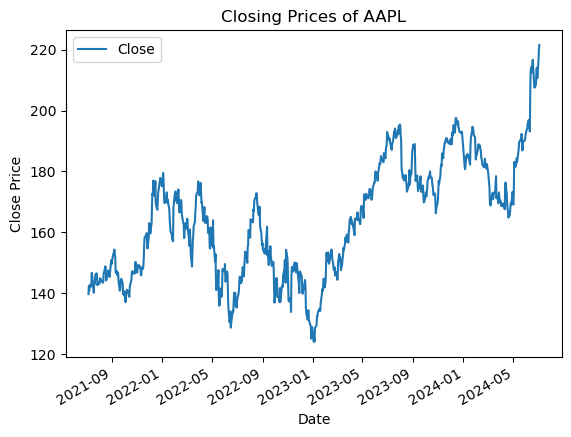

In [3]:
# Plotting the closing prices
aapl_prices.plot(title=f'Closing Prices of {stock}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


The Apple stock price has shown an overall upward trend over the last three years, starting at around 140 in 2021 and reaching approximately 220 by 2024. If we look closely at the period from 2021 to begining of 2023 the data has no strong trend, while the stock has shown impressive performance since January 2023, climbing from 120 to 220, almost doubling in price.

## 2 Tesla stock

In [205]:
# Fetch data
stock = 'TSLA'
data = yf.Ticker(stock).history(period="3y")
tsla_prices = data['Close'].to_frame()


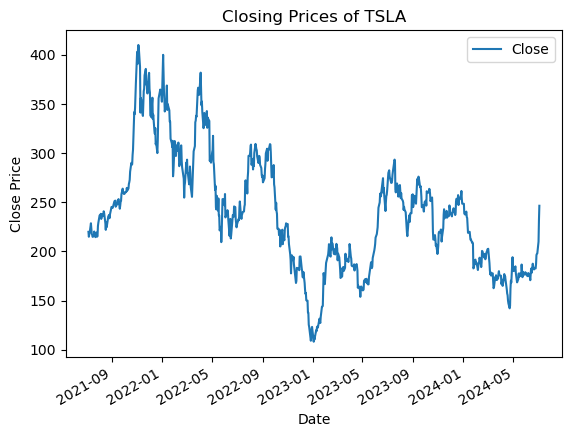

In [206]:
# Plotting the closing prices
tsla_prices.plot(title=f'Closing Prices of {stock}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


Tesla's stock price showed a lot of volatility, going between about 100 and 400 over the past 3 years. There is a gradual downward trend over this period, but if we had the data going back further, the overall picture could be different.

## 3 Amazon stock

In [214]:
# Fetch data
stock = 'AMZN'
data = yf.Ticker(stock).history(period="3y")
amzn_prices = data['Close'].to_frame()
amzn_prices.head()

Close
Date                                 
2021-07-06 00:00:00-04:00  183.787003
2021-07-07 00:00:00-04:00  184.828995
2021-07-08 00:00:00-04:00  186.570496
2021-07-09 00:00:00-04:00  185.966995
2021-07-12 00:00:00-04:00  185.927505

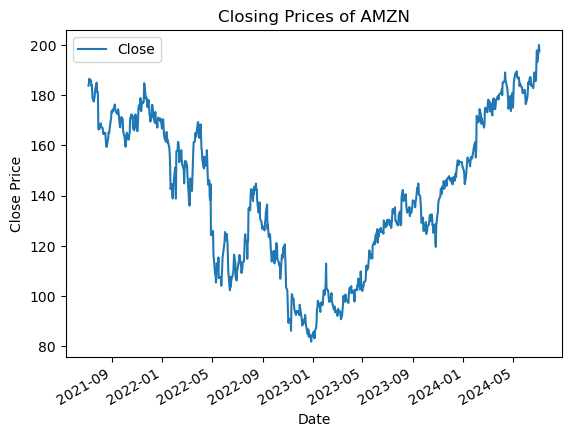

In [210]:
# Plotting the closing prices
amzn_prices.plot(title=f'Closing Prices of {stock}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


From 2021 to 2023, Amazon's stock price experienced significant fluctuations. At the beginning of 2021, the stock peaked at more than 180. However, by the end of 2022, the stock had plummeted to around 80. Starting in early 2023, Amazon's stock began a strong and consistent recovery, rising to around 200. If we consider only the period from the beginning of 2023, we can see that Amazon stock is trending up. 

## 4 UK house sales

In [237]:
uk_hpi = pd.read_csv("/Users/ellienccook/Documents/Python/Sales-2023-09.csv")
uk_hpi.head()

Date   Region_Name  Area_Code  Sales_Volume
0  1995-01-01       England  E92000001       47639.0
1  1995-01-01         Wales  W92000004        1991.0
2  1995-01-01  Inner London  E13000001        2890.0
3  1995-01-01  Outer London  E13000002        4616.0
4  1995-01-01        London  E12000007        7506.0

In [238]:
england_data = uk_hpi[uk_hpi['Region_Name'] == 'England'].copy()
england_data.head()

Date Region_Name  Area_Code  Sales_Volume
0     1995-01-01     England  E92000001       47639.0
358   1995-02-01     England  E92000001       47880.0
717   1995-03-01     England  E92000001       67025.0
1074  1995-04-01     England  E92000001       56925.0
1432  1995-05-01     England  E92000001       64192.0

In [239]:
england_data.drop(columns=['Region_Name', 'Area_Code'], inplace=True)
england_data.set_index('Date', inplace=True)
england_data.index = pd.to_datetime(england_data.index)
england_data.head()

Sales_Volume
Date                    
1995-01-01       47639.0
1995-02-01       47880.0
1995-03-01       67025.0
1995-04-01       56925.0
1995-05-01       64192.0

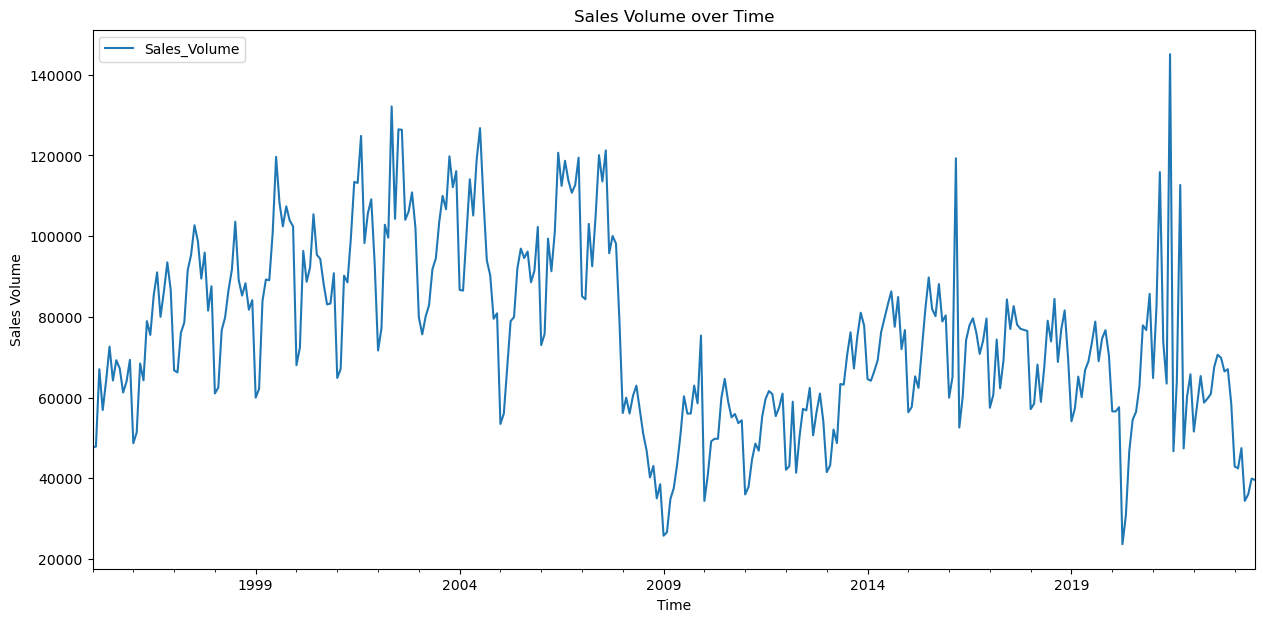

In [240]:
# Plotting the closing prices
fig, ax = plt.subplots(figsize=(15, 7))
england_data.plot(ax=ax, title='Sales Volume over Time')
plt.xlabel('Time')
plt.ylabel('Sales Volume')
plt.show()


The UK housing market exhibits a clear seasonal pattern in sales numbers, fluctuating significantly throughout the year. Sales volume ranges from just above 20,000 to almost 140,000 in the period covered, with the seasonal variation (judging just from the picture) adding about 20,000-40,000 at peak times of year compared to the troughs. This cyclical trend sees sales increase from the beginning of the year, peaking around mid-year before gradually decreasing towards the end of the year. This pattern repeats itself year after year, highlighting the influence of seasonal factors on the housing market, such as weather conditions, holiday seasons, and the timing of major life events that often drive the buying and selling of houses. Aside from this pattern, the market is stable for most of the time period, except for a few large events making themselves felt, such as around the housing market crash in 2008, and the effects of the Covid-19 pandemic in 2020-21.

## 5 GBP stock

In [223]:
gbp = pd.read_csv("/Users/ellienccook/Documents/financial modelling dsm120 /GBP.csv")
gbp.head()

Date      Time           Bar#  Bar Index  Tick Range    Open    High  \
0  07/04/2014  13:11:00  886842/886842          0           6  1.6589  1.6591   
1  07/04/2014  13:10:00  886841/886842         -1           4  1.6591  1.6591   
2  07/04/2014  13:09:00  886840/886842         -2           5  1.6591  1.6591   
3  07/04/2014  13:08:00  886839/886842         -3           3  1.6589  1.6591   
4  07/04/2014  13:07:00  886838/886842         -4           3  1.6590  1.6591   

      Low   Close  
0  1.6585  1.6590  
1  1.6587  1.6589  
2  1.6586  1.6591  
3  1.6588  1.6591  
4  1.6588  1.6589

In [224]:
# Reverse the order to go forwards in time
gbp=gbp.iloc[::-1]
gbp.reset_index(inplace=True, drop=True)
gbp.head()

Date      Time      Bar#  Bar Index  Tick Range    Open    High  \
0  13/12/2011  02:05:00  1/886842    -886841           2  1.5590  1.5591   
1  13/12/2011  02:06:00  2/886842    -886840           3  1.5589  1.5591   
2  13/12/2011  02:07:00  3/886842    -886839           2  1.5589  1.5590   
3  13/12/2011  02:08:00  4/886842    -886838           5  1.5590  1.5590   
4  13/12/2011  02:09:00  5/886842    -886837           5  1.5586  1.5591   

      Low   Close  
0  1.5589  1.5590  
1  1.5588  1.5590  
2  1.5588  1.5590  
3  1.5585  1.5586  
4  1.5586  1.5588

In [225]:
# Combine 'Date' and 'Time' into one datetime column and set as index
gbp['Date'] = pd.to_datetime(gbp['Date'] + ' ' + gbp['Time'], dayfirst=True)
gbp.set_index('Date', inplace=True)
gbp.drop(columns=['Time', 'Bar#', 'Bar Index', 'Tick Range','Open','High','Low'], inplace=True)
gbp.head()


Close
Date                       
2011-12-13 02:05:00  1.5590
2011-12-13 02:06:00  1.5590
2011-12-13 02:07:00  1.5590
2011-12-13 02:08:00  1.5586
2011-12-13 02:09:00  1.5588

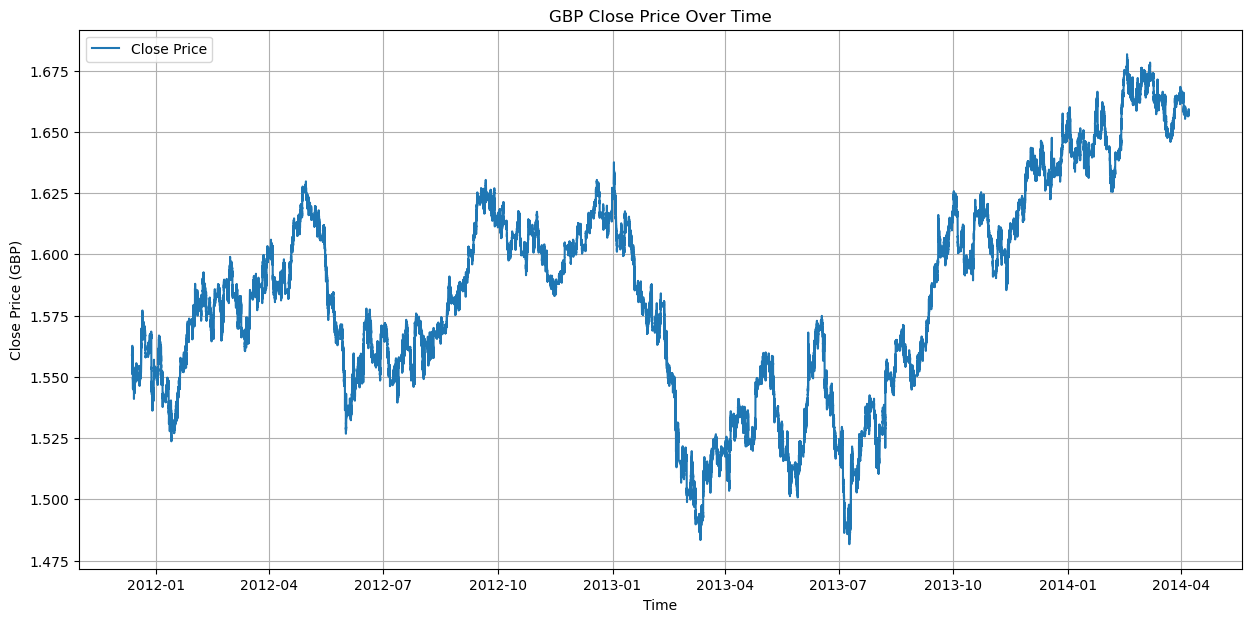

In [16]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(gbp.index, gbp['Close'], label='Close Price')
plt.title('GBP Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price (GBP)')
plt.legend()
plt.grid(True)
plt.show()

The stock price shows some volatility, but no overall trend, until about July 2013. From there to April 2014 it follows a strong upward trend from about 1.48 to about 1.68.

## 6 Gold stock

In [226]:
gold = pd.read_csv("/Users/ellienccook/Documents/financial modelling dsm120 /Gold.csv")
gold.head()

Date      Time           Bar#  Bar Index  Tick Range     Open  \
0  07/04/2014  13:54:00  886801/886801          0          80  1298.60   
1  07/04/2014  13:53:00  886800/886801         -1          69  1299.04   
2  07/04/2014  13:52:00  886799/886801         -2          39  1299.07   
3  07/04/2014  13:51:00  886798/886801         -3          31  1299.00   
4  07/04/2014  13:50:00  886797/886801         -4          52  1298.80   

      High     Low    Close  
0  1299.00  1298.2  1298.50  
1  1299.29  1298.6  1298.60  
2  1299.29  1298.9  1298.90  
3  1299.21  1298.9  1299.09  
4  1299.22  1298.7  1299.17

In [227]:
# Reverse the order to go forwards in time
gold=gold.iloc[::-1]
gold.reset_index(inplace=True, drop=True)

In [228]:
# Combine 'Date' and 'Time' into one datetime column and set as index
gold['Date'] = pd.to_datetime(gold['Date'] + ' ' + gold['Time'], dayfirst=True)
gold.set_index('Date', inplace=True)
gold.drop(columns=['Time', 'Bar#', 'Bar Index', 'Tick Range','Open','High','Low'], inplace=True)
gold.head()

Close
Date                        
2011-10-26 15:50:00  1711.27
2011-10-26 15:51:00  1712.07
2011-10-26 15:52:00  1712.13
2011-10-26 15:53:00  1712.83
2011-10-26 15:54:00  1713.87

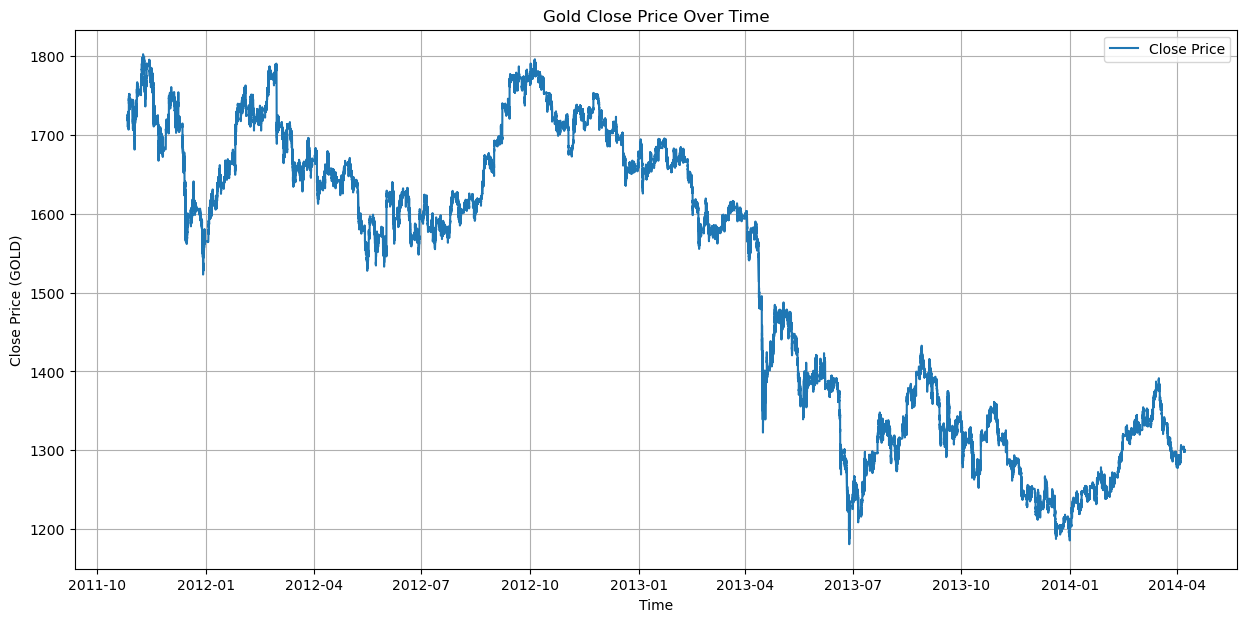

In [21]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(gold.index, gold['Close'], label='Close Price')
plt.title('Gold Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price (GOLD)')
plt.legend()
plt.grid(True)
plt.show()

Between 2011 and 2012, the gold market experienced notable fluctuations, with prices fluctuating between 1,500 and 1,800. In October 2012, the price of gold nearly touched 1,800, then gradually decreased, falling below 1,200 in July 2013. From mid-2013 to 2014, gold prices fluctuated in a narrower range, typically from 1,200 to 1,400, indicating a period of relative stability.

# Topic 2

## Overview of the Analysis
In this topic, we analyzed various financial and economic datasets to understand their characteristics and transformations. The key steps included:

Determining the stationarity, multiplicativity, and seasonality of specific datasets based on their graphical appearances.
Conducting differencing, second differencing, and relative differencing for GBP stock and Gold stock.
Applying logarithmic transformation to Amazon stock data.
Performing seasonal adjustment on UK House Sales Volume data.

******
Based on the appearance of their graphs from Topic 1, I believe that Amazon stock appears multiplicative since the beginning of 2023, and Uk house sales volume is seasonal. I have taken (and graphed) the differences, second differences and relative differences of GBP stock and Gold stock. Finally, I have taken logs of Amazon stock and drawn the resulting graph, and done a seasonal adjustment of the UK House Sales Volume data and plotted that too.

## 1. Apple stock with differences calculated 

I want to transform a non-stationary time series into a stationary one. This is a technique commonly used in time series analysis. This is a useful tool because it makes it easier to analyse and interpret data, which is simpler because the patterns and relationships are consistent over time. This consistency helps understand the underlying dynamics of the time series.

Differencing is a method of converting a non-stationary series into a stationary series by subtracting the previous observation from the current observation. This will remove the trend component in the data, which is an important contribution to making the data stationary.

In [231]:
aapl_prices['Differences'] = aapl_prices['Close'] - aapl_prices['Close'].shift()

<Axes: xlabel='Date'>

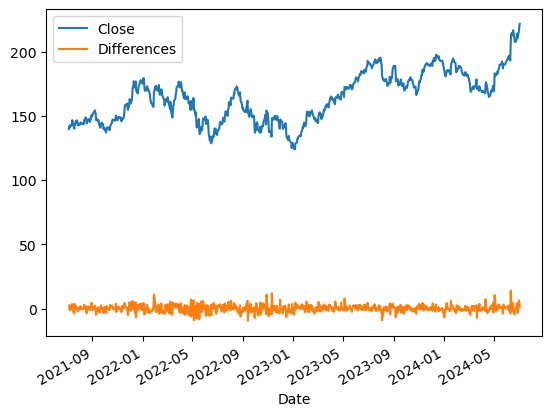

In [232]:
aapl_prices.plot()

In [233]:
aapl_prices.head()

Close  Differences
Date                                              
2021-07-06 00:00:00-04:00  139.633438          NaN
2021-07-07 00:00:00-04:00  142.140625     2.507187
2021-07-08 00:00:00-04:00  140.832947    -1.307678
2021-07-09 00:00:00-04:00  142.671524     1.838577
2021-07-12 00:00:00-04:00  142.071777    -0.599747

Since the differences here are small relative to the overall stock price, it may be hard to see patterns in the differences on this graph as the whole series will be scaled to look close to 0. So I have plotted a second graph showing the price and differences overlaid on different axes.

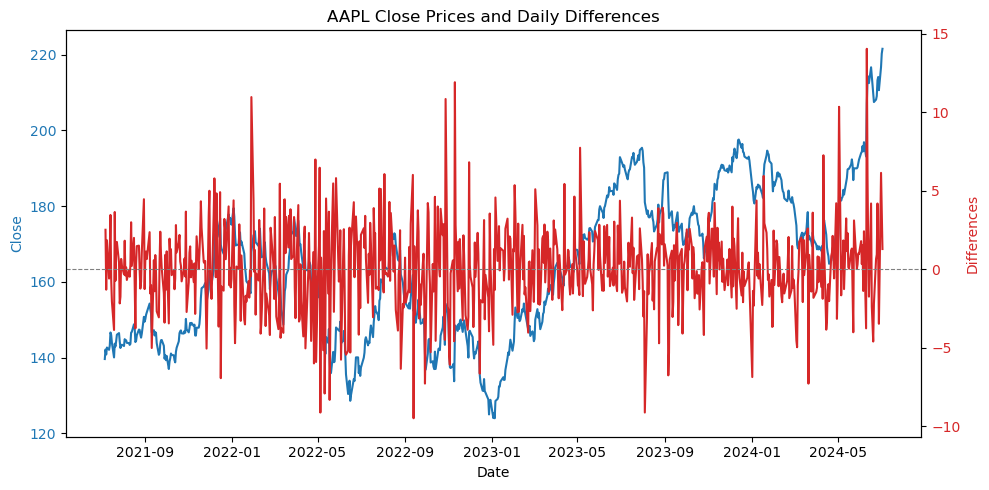

In [234]:
# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot 'Close' on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color=color)
ax1.plot(aapl_prices.index, aapl_prices['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the 'Differences'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Differences', color=color)  # we already handled the x-label with ax1
ax2.plot(aapl_prices.index, aapl_prices['Differences'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Draw a horizontal line at zero on the secondary y-axis
ax2.axhline(0, color='grey', linewidth=0.8, linestyle='--')

# Title and layout
plt.title('AAPL Close Prices and Daily Differences')
fig.tight_layout()  # to make sure there's no overlap in the layout

# Show the plot
plt.show()


The data here are too noisy to clearly see visually when the differences are non-zero. For example, in early 2023 when the stock price is clearly rising, the differences are still jumping around near 0. So this technique may be less useful for such noisy data, if we are hoping to come to conclusions about the data by inspecting the graph. A possible modification of this approach might be to smooth the stock price data first, perhaps using a rolling average.

On the other hand, these differences can still be useful for further analysis using the more numerical approaches of some later topics.

## 2. Amazon stock (Multiplicativity Analysis)

Since the beginning of 2023, based on the graph from Topic 1, I believe that the stock may be behaving multiplicatively, so I will apply logarithms to investigate this.

When a time series exhibits multiplicative behavior, such as when changes in the data are proportional to the level of the data, the relationship can be transformed into an additive one by taking the logarithm of the data. We can write this algebraically: if $f$ is a (differentiable) function of time with $\frac{df}{dt}(t) = kf(t)$, for some constant $k$, then by the chain rule we have $\frac{d}{dt}(\log(f))(t) = \frac{1}{f(t)} \cdot \frac{df}{dt} = k$.

In a multiplicative model, the variance tends to increase with the level of the series. Applying the logarithm stabilizes the variance, theoretically making it constant over time. This is crucial for many statistical models that assume homoscedasticity (constant variance).

In [26]:
# Apply a log transformation to the 'Close' price
amzn_prices['Log_Close'] = np.log(amzn_prices['Close'])
amzn_prices.head()

Close  Log_Close
Date                                            
2021-07-06 00:00:00-04:00  183.787003   5.213777
2021-07-07 00:00:00-04:00  184.828995   5.219431
2021-07-08 00:00:00-04:00  186.570496   5.228809
2021-07-09 00:00:00-04:00  185.966995   5.225569
2021-07-12 00:00:00-04:00  185.927505   5.225357

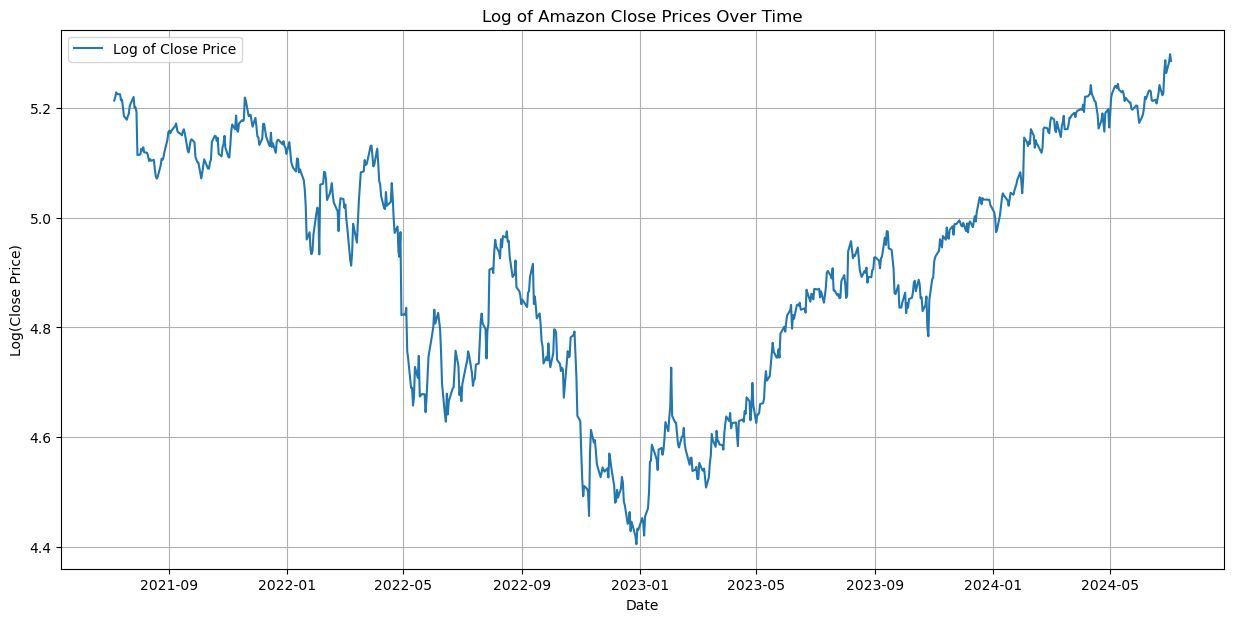

In [27]:
# Plotting the log-transformed Close prices
plt.figure(figsize=(15, 7))
plt.plot(amzn_prices.index, amzn_prices['Log_Close'], label='Log of Close Price')  
plt.title('Log of Amazon Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Log(Close Price)')
plt.legend()
plt.grid(True)
plt.show()

On this new graph, the behaviour of the log of Amazon's stock price since the beginning of 2023 looks linear, which is what we would expect from the stock price behaving multiplicatively. This linear behaviour should be useful for various types of analysis.

## 3. UK House Sales Volume (Seasonality Analysis)

We would like to have a better understanding of the underlying trends and cyclical components of the data without the noise of seasonal effects. By adjusting for seasonality, the data allow more accurate comparisons across different time periods, forecast future values more reliably, and identify other non-seasonal patterns that might influence the data.

First I have to extract the month/year from the Date index, to ensure that sales volumes are correctly grouped by month. Then we are ready to calculate the sum of sales volumes for each month across all years in the dataset. 


In [248]:
england_data['Year'] = england_data.index.year
england_data['Month'] = england_data.index.month

england_data.head()

Sales_Volume  Year  Month
Date                                 
1995-01-01       47639.0  1995      1
1995-02-01       47880.0  1995      2
1995-03-01       67025.0  1995      3
1995-04-01       56925.0  1995      4
1995-05-01       64192.0  1995      5

In [254]:
season_sum = [0]*12
season_count = [0]*12
for row in england_data.itertuples():
    season_sum[row.Month -1] += row.Sales_Volume
    season_count[row.Month-1] += 1

In [256]:
print(season_sum)
print(season_count)

[1668642.0, 1740162.0, 2152852.0, 1948500.0, 2136369.0, 2409924.0, 2410808.0, 2403159.0, 2246752.0, 2256727.0, 2232972.0, 2239333.0]
[29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28]


By summing the values for each month, we can observe the total contribution of each month to the time series. This helps in identifying the overall level of sales for that month.

The season count keeps track of the number of observations for each month across all years. Knowing the count of observations is essential for calculating the mean for each month.

In [257]:
season_mean = [0]*12

for i in range(12):
    season_mean[i] = season_sum[i] / season_count[i]
print(season_mean)

[57539.379310344826, 60005.58620689655, 74236.27586206897, 67189.6551724138, 73667.89655172414, 83100.8275862069, 83131.31034482758, 85827.10714285714, 80241.14285714286, 80597.39285714286, 79749.0, 79976.17857142857]


The season mean is the average value for each month across all years. We use this to understand the typical value for each month, for seasonal adjustment. It allows us to identify the expected level of sales for each month, making it possible to adjust the data by removing the seasonal effect. After the season means are used to normalise the data, it can then be analysed for trends and other patterns without the influence of seasonality.

In [258]:
mean = np.mean(england_data['Sales_Volume'])

print(mean)

75353.3527696793


In [259]:
season_offsets = [0]*12

for i in range(12):
    season_offsets[i] = season_mean[i] - mean
print(season_offsets)

[-17813.973459334477, -15347.766562782752, -1117.0769076103315, -8163.6975972655055, -1685.4562179551576, 7747.474816527596, 7777.957575148277, 10473.754373177842, 4887.7900874635525, 5244.0400874635525, 4395.647230320697, 4622.825801749263]


The season offset represents the typical value or expected level of the time series for each month, relative to the overall mean.

Then we apply the seasonally offset to each monthly value to deseasonalise the data. Forecasting models tend to perform better on seasonally adjusted data because they are not influenced by regular seasonal variations. This leads to more accurate predictions.

In [260]:
seasonally_adjusted = []
for index, value in enumerate(england_data['Sales_Volume']):
    seasonally_adjusted.append(value - season_offsets[england_data['Month'].iloc[index]-1])
    
#print(seasonally_adjusted)
england_data['Seasonally_Adjusted'] = seasonally_adjusted
england_data.head()

Sales_Volume  Year  Month  Seasonally_Adjusted
Date                                                      
1995-01-01       47639.0  1995      1         65452.973459
1995-02-01       47880.0  1995      2         63227.766563
1995-03-01       67025.0  1995      3         68142.076908
1995-04-01       56925.0  1995      4         65088.697597
1995-05-01       64192.0  1995      5         65877.456218

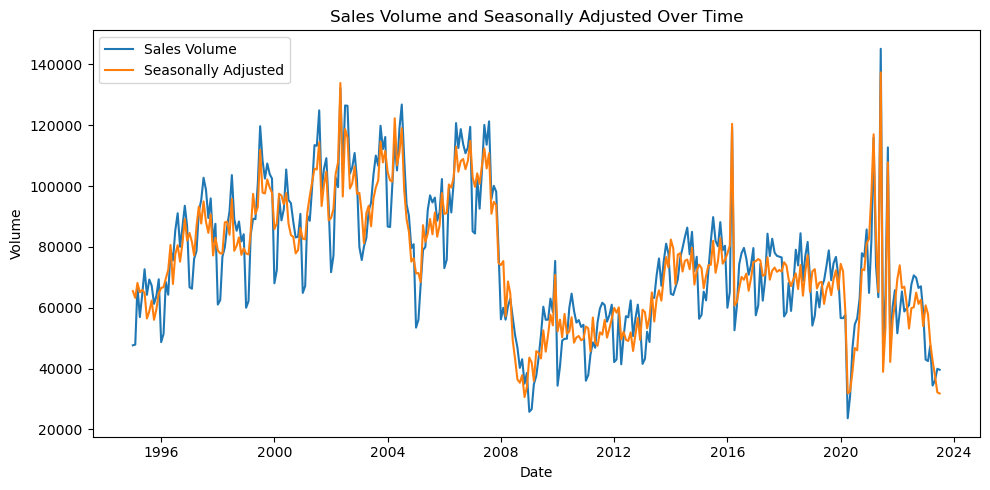

In [265]:
import matplotlib.pyplot as plt
# Plot setup
plt.figure(figsize=(10, 5))  

# Plotting the Sales_Volume
plt.plot(england_data.index, england_data['Sales_Volume'], label='Sales Volume')

# Plotting the Seasonally_Adjusted
plt.plot(england_data.index, england_data['Seasonally_Adjusted'], label='Seasonally Adjusted')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Sales Volume and Seasonally Adjusted Over Time')
plt.legend()

# Enhance layout
plt.tight_layout()

# Show the plot
plt.show()


With the seasonality removed, the remaining changes in sales volume which are not caused by seasonal variation stand out much more clearly. Looking at the period from 2010 to 2019, it is now clear that the underlying sales volume (without seasonality) is largely very stable, except for the sudden spike in 2016. The same is true in the stable period before 2007.

## 4. GBP Stock and Gold Stock Differencing

Based on the graphs from topic 1, I think the GBP stock and Gold stock are trending datasets. As requested in topic 2, I will apply the differences, second differences and relative differences to these two datasets. 

The aim of differencing is to remove trends and achieve stationarity. It can be thought of as a discrete form of differentiation. For a trivial example, in a linear dataset $f(t) = kt$, with $k$ constant, the differences will be constant.

Second differencing corresponds to a form of double differentiation. By the same argument as above, we can see that it should help stationarise quadratic terms in the underlying distribution of the data.

Relative differencing calculates percentage change, and can help to stabilise the variance, much as differencing or second differencing can stabilise the mean. The corresponding algebraic analogy in this case is differentiating the logarithm of a function, which stationarises an exponential function (i.e., one with constant percentage change): $\frac{d}{dt}\log(e^{kt}) = k$.

### 4.1. GBP applying first differences, second differences and relative differences
To understand trends, detect patterns, and make data stationary I will apply first differences, second differences, and relative differences.

In [37]:
# Calculate first differences - Change in price from the previous day
# Calculate first differences
gbp['First Differences'] = gbp['Close'].diff().dropna()


# Calculate second differences - Change in first differences
gbp['Second Differences'] = gbp['First Differences'].diff()

# Calculate relative differences - Percentage change from the previous day
gbp['Relative Differences'] = gbp['Close'].pct_change() * 100 

# Display the head of the DataFrame to verify calculations
gbp.head()

Close  First Differences  Second Differences  \
Date                                                                 
2011-12-13 02:05:00  1.5590                NaN                 NaN   
2011-12-13 02:06:00  1.5590             0.0000                 NaN   
2011-12-13 02:07:00  1.5590             0.0000              0.0000   
2011-12-13 02:08:00  1.5586            -0.0004             -0.0004   
2011-12-13 02:09:00  1.5588             0.0002              0.0006   

                     Relative Differences  
Date                                       
2011-12-13 02:05:00                   NaN  
2011-12-13 02:06:00              0.000000  
2011-12-13 02:07:00              0.000000  
2011-12-13 02:08:00             -0.025657  
2011-12-13 02:09:00              0.012832

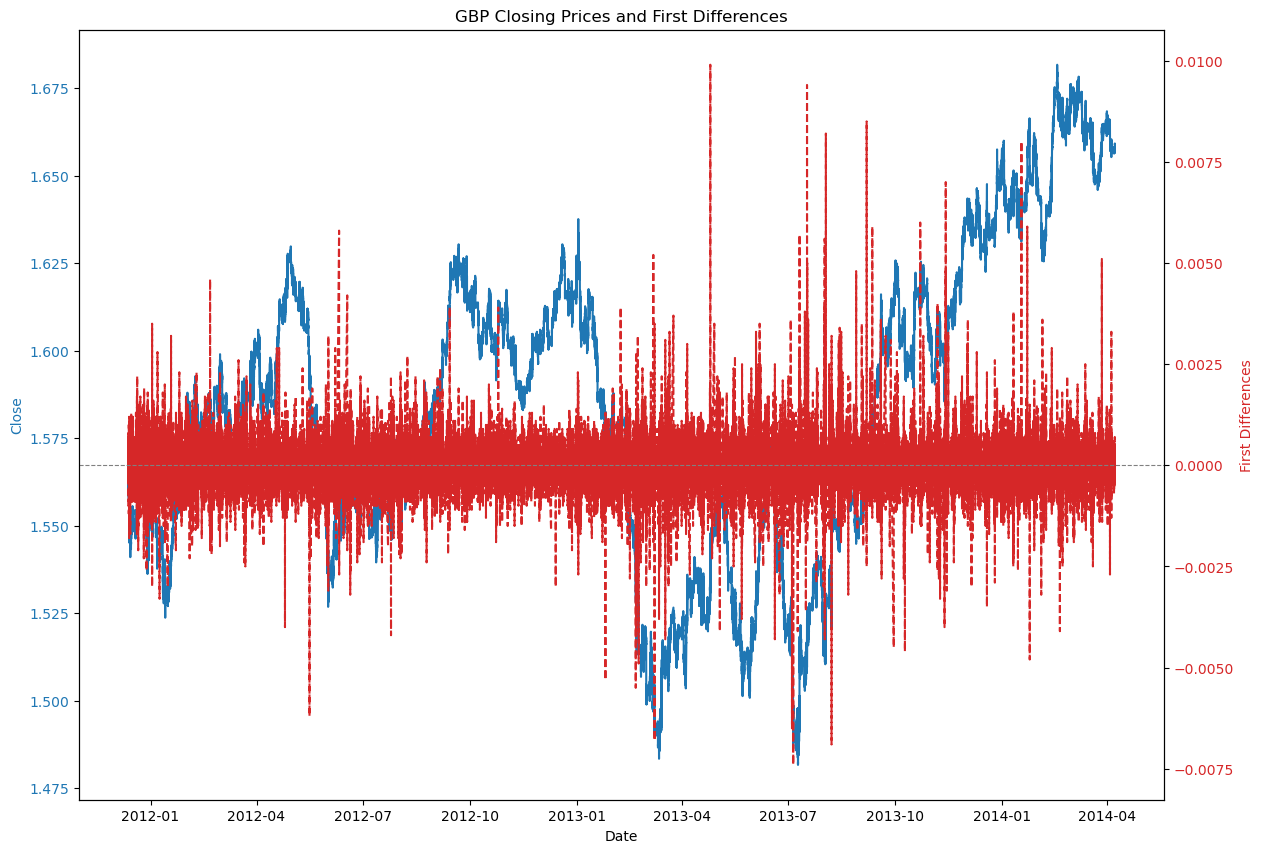

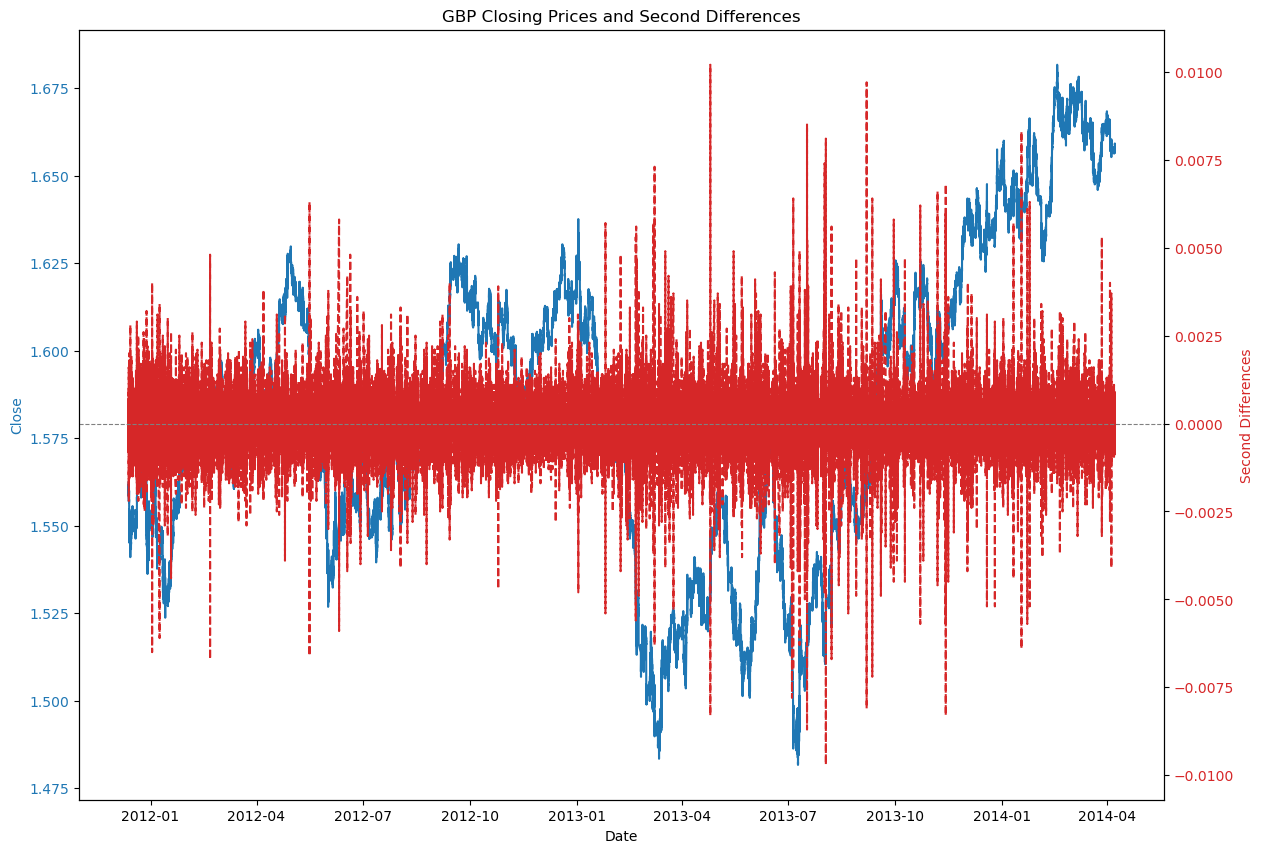

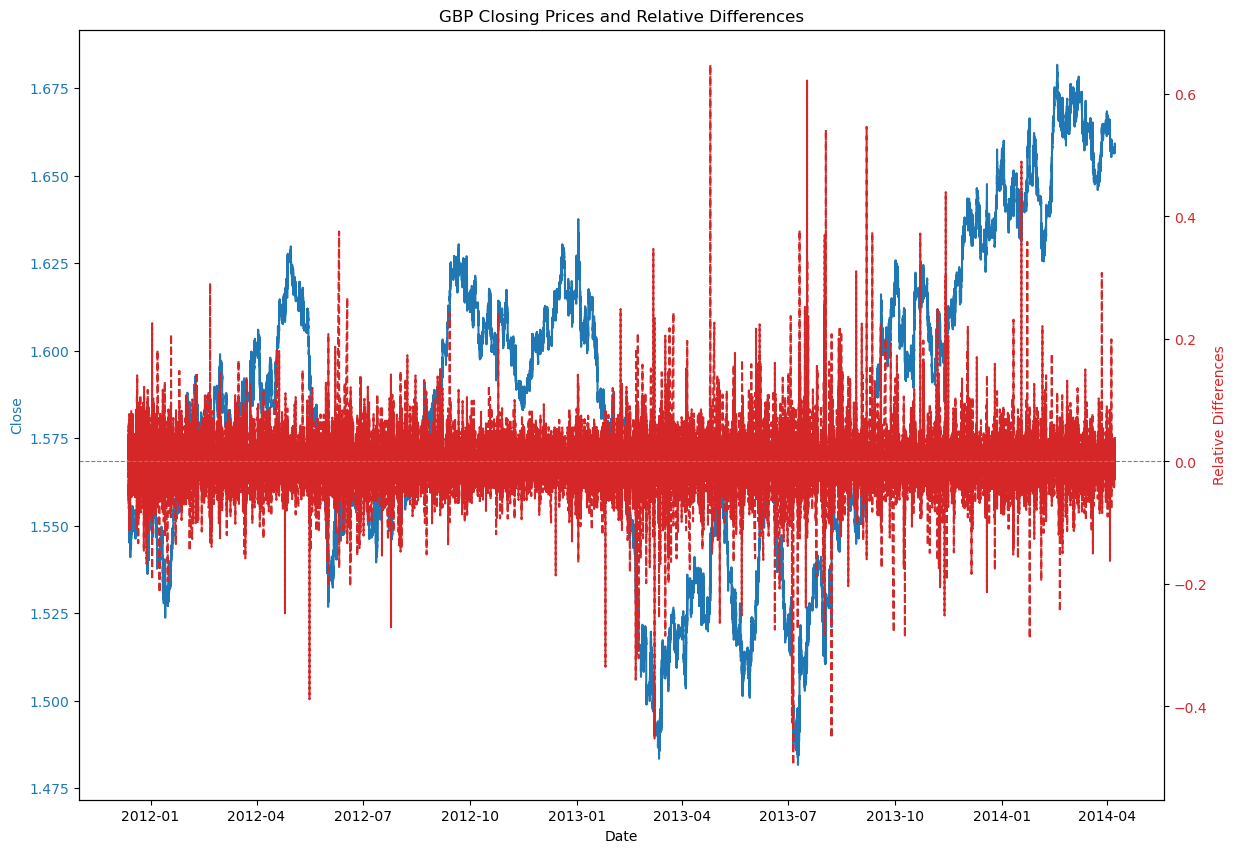

In [38]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 10))

# Plotting the Close prices
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color=color)
ax1.plot(gbp.index, gbp['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis to plot the First Differences
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('First Differences', color=color)
ax2.plot(gbp.index, gbp['First Differences'], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Draw a horizontal line at zero on the secondary y-axis
ax2.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.title('GBP Closing Prices and First Differences')
plt.show()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 10))

# Plotting the Close prices
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color=color)
ax1.plot(gbp.index, gbp['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis to plot the First Differences
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Second Differences', color=color)
ax2.plot(gbp.index, gbp['Second Differences'], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Draw a horizontal line at zero on the secondary y-axis
ax2.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.title('GBP Closing Prices and Second Differences')
plt.show()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 10))

# Plotting the Close prices
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color=color)
ax1.plot(gbp.index, gbp['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis to plot the First Differences
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Relative Differences', color=color)
ax2.plot(gbp.index, gbp['Relative Differences'], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Draw a horizontal line at zero on the secondary y-axis
ax2.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.title('GBP Closing Prices and Relative Differences')
plt.show()


The data is quite noisy so it is not immediately clear to see patterns in the graphs of the various differences. Applying the first and second differences focuses on reducing (linear and higher order) trends in the data. However, if the original data contains a lot of random fluctuations (noise), these differences may amplify the noise, especially the second difference. The relative differences can also exaggerate the variability in periods of low values, which contributes to the appearance of noise.

That being said, all three difference graphs look clearly closer to being stationary than the original data, so they may be more amenable to certain techniques of data analysis. Statistical tests, rather than visual inspection, are necessary to check for stationarity, especially the stationarity of higher order properties like the variance.

### 4.2. Gold stock applying first differences, second differences and relative differences

In [39]:
# Calculate first differences - Change in price from the previous day
gold['First Differences'] = gold['Close'].diff()

# Calculate second differences - Change in first differences
gold['Second Differences'] = gold['First Differences'].diff()

# Calculate relative differences - Percentage change from the previous day
gold['Relative Differences'] = gold['Close'].pct_change() * 100 

# Display the head of the DataFrame to verify calculations
gold.head()

Close  First Differences  Second Differences  \
Date                                                                  
2011-10-26 15:50:00  1711.27                NaN                 NaN   
2011-10-26 15:51:00  1712.07               0.80                 NaN   
2011-10-26 15:52:00  1712.13               0.06               -0.74   
2011-10-26 15:53:00  1712.83               0.70                0.64   
2011-10-26 15:54:00  1713.87               1.04                0.34   

                     Relative Differences  
Date                                       
2011-10-26 15:50:00                   NaN  
2011-10-26 15:51:00              0.046749  
2011-10-26 15:52:00              0.003505  
2011-10-26 15:53:00              0.040885  
2011-10-26 15:54:00              0.060718

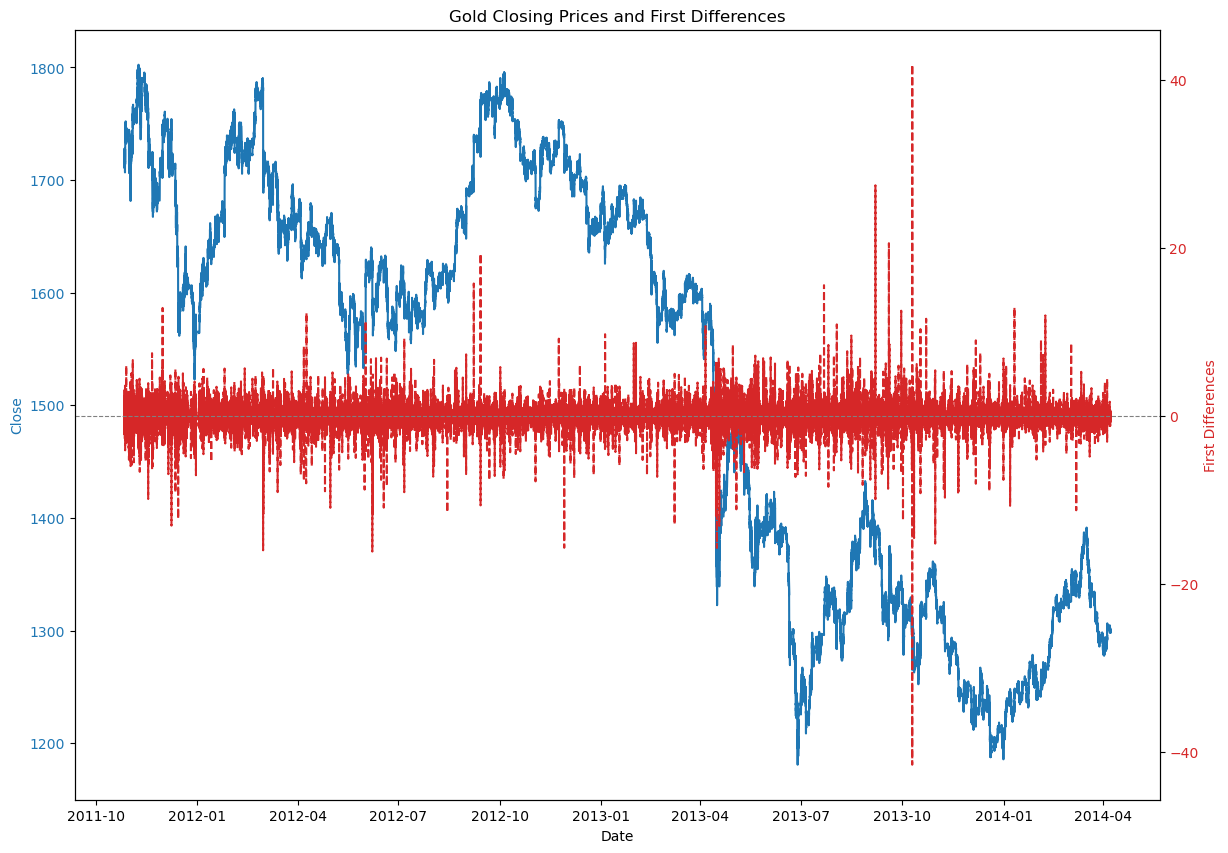

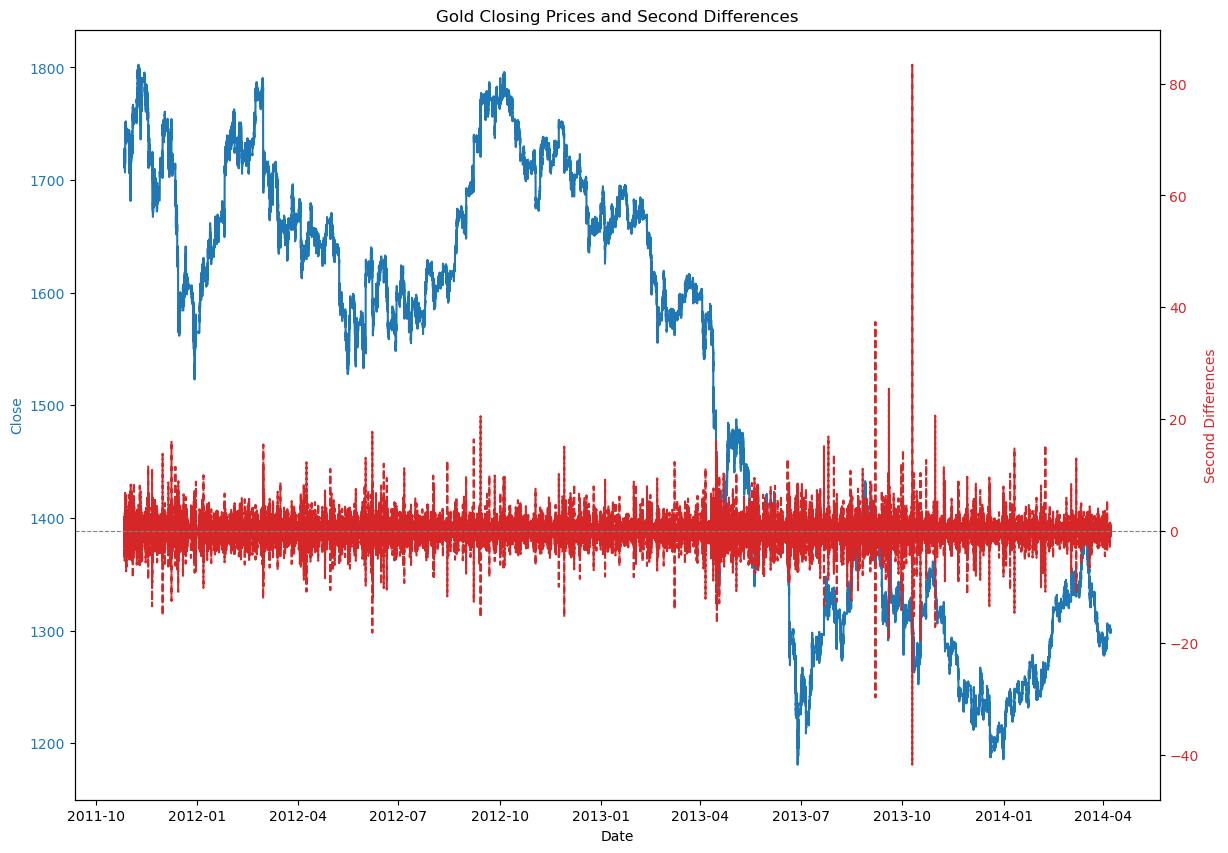

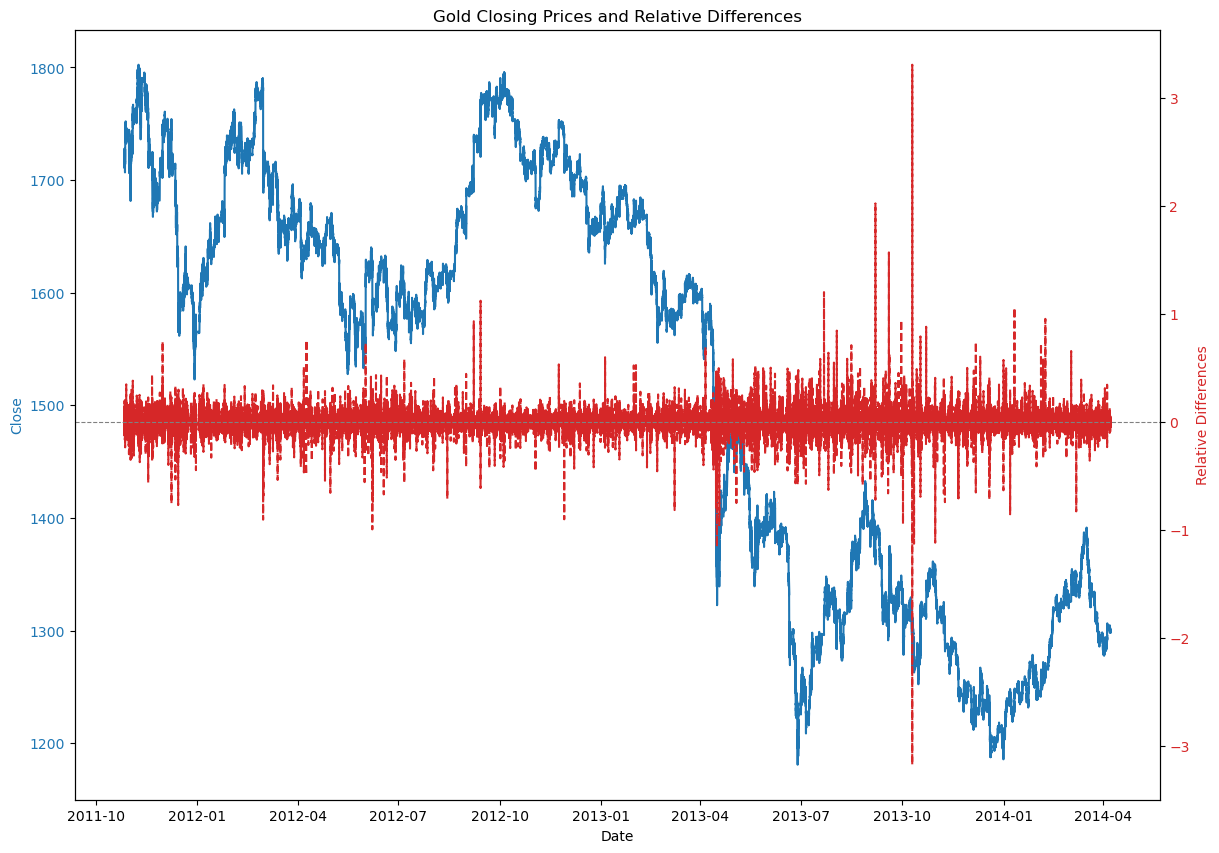

In [40]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 10))

# Plotting the Close prices
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color=color)
ax1.plot(gold.index, gold['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis to plot the First Differences
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('First Differences', color=color)
ax2.plot(gold.index, gold['First Differences'], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Draw a horizontal line at zero on the secondary y-axis
ax2.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.title('Gold Closing Prices and First Differences')
plt.show()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 10))

# Plotting the Close prices
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color=color)
ax1.plot(gold.index, gold['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis to plot the First Differences
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Second Differences', color=color)
ax2.plot(gold.index, gold['Second Differences'], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Draw a horizontal line at zero on the secondary y-axis
ax2.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.title('Gold Closing Prices and Second Differences')
plt.show()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 10))

# Plotting the Close prices
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color=color)
ax1.plot(gold.index, gold['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis to plot the First Differences
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Relative Differences', color=color)
ax2.plot(gold.index, gold['Relative Differences'], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Draw a horizontal line at zero on the secondary y-axis
ax2.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.title('Gold Closing Prices and Relative Differences')
plt.show()


We see similar results here to the GBP case: while these difference calculations may be useful analytically, they make the data much harder to interpret visually, leaving us to rely more on the statistics. On the other hand, all three difference graphs mark out October 2013 as an unusually volatile period with sudden price changes much larger than seen elsewhere - and this is not clear from the original price graph. So a more positive description would be to say that different features of the data become visually obvious here.

# Topic 3

## Overview of the Analysis
In this topic, we implemented and evaluated three basic forecasting methods: Naive Forecast, Seasonal Naive Forecast, and Average Forecast. These methods were applied to six datasets: Apple, Amazon, Tesla, GBP, Gold, and UK House Sales. The steps included:

Implementing each forecasting method for the datasets.
Calculating error estimates to evaluate the performance of each method.
Visualizing the forecast results and comparing them with actual data.

### Naive forecast

The Naive Forecast for a time series, as the name suggests, is quite straightforward: at each step, we assume the time series will take the same value as the previous step. This may suffice for some purposes for extremely stable datasets. The Naive forecast serves as a valuable benchmark, but it should be supplemented with more sophisticated models for comprehensive analysis and forecasting, such as ARIMA, exponential smoothing, or machine learning models.

In [266]:
england_data.rename(columns={'Sales_Volume': 'Close'}, inplace=True)


In [44]:
england_data.head()

Close  Year  Month  Seasonally_Adjusted
Date                                                 
1995-01-01  47639.0  1995      1         65452.973459
1995-02-01  47880.0  1995      2         63227.766563
1995-03-01  67025.0  1995      3         68142.076908
1995-04-01  56925.0  1995      4         65088.697597
1995-05-01  64192.0  1995      5         65877.456218

In [45]:
gbp.head()

Close  First Differences  Second Differences  \
Date                                                                 
2011-12-13 02:05:00  1.5590                NaN                 NaN   
2011-12-13 02:06:00  1.5590             0.0000                 NaN   
2011-12-13 02:07:00  1.5590             0.0000              0.0000   
2011-12-13 02:08:00  1.5586            -0.0004             -0.0004   
2011-12-13 02:09:00  1.5588             0.0002              0.0006   

                     Relative Differences  
Date                                       
2011-12-13 02:05:00                   NaN  
2011-12-13 02:06:00              0.000000  
2011-12-13 02:07:00              0.000000  
2011-12-13 02:08:00             -0.025657  
2011-12-13 02:09:00              0.012832

In [46]:
gold.head()

Close  First Differences  Second Differences  \
Date                                                                  
2011-10-26 15:50:00  1711.27                NaN                 NaN   
2011-10-26 15:51:00  1712.07               0.80                 NaN   
2011-10-26 15:52:00  1712.13               0.06               -0.74   
2011-10-26 15:53:00  1712.83               0.70                0.64   
2011-10-26 15:54:00  1713.87               1.04                0.34   

                     Relative Differences  
Date                                       
2011-10-26 15:50:00                   NaN  
2011-10-26 15:51:00              0.046749  
2011-10-26 15:52:00              0.003505  
2011-10-26 15:53:00              0.040885  
2011-10-26 15:54:00              0.060718

In [47]:
aapl_prices.head()

Close  Differences
Date                                              
2021-07-06 00:00:00-04:00  139.633423          NaN
2021-07-07 00:00:00-04:00  142.140625     2.507202
2021-07-08 00:00:00-04:00  140.832962    -1.307663
2021-07-09 00:00:00-04:00  142.671509     1.838547
2021-07-12 00:00:00-04:00  142.071762    -0.599747

In [48]:
amzn_prices.head()

Close  Log_Close
Date                                            
2021-07-06 00:00:00-04:00  183.787003   5.213777
2021-07-07 00:00:00-04:00  184.828995   5.219431
2021-07-08 00:00:00-04:00  186.570496   5.228809
2021-07-09 00:00:00-04:00  185.966995   5.225569
2021-07-12 00:00:00-04:00  185.927505   5.225357

In [49]:
tsla_prices.head()

Close
Date                                 
2021-07-06 00:00:00-04:00  219.860001
2021-07-07 00:00:00-04:00  214.883331
2021-07-08 00:00:00-04:00  217.603333
2021-07-09 00:00:00-04:00  218.983337
2021-07-12 00:00:00-04:00  228.566666

In [278]:
# Datasets dictionary
datasets = {
    'Apple': aapl_prices,
    'Amazon': amzn_prices,
    'Tesla': tsla_prices,
    'GBP': gbp,
    'Gold': gold,
    'UK House Sales': england_data
}

In [279]:
# Define Naive forecast function
def naive_forecast(series):
    return series.shift(1)

# Error calculation function
def calculate_errors(actual, forecast):
    errors = actual - forecast
    mae = errors.abs().mean()
    mse = (errors**2).mean()
    return mae, mse


In [280]:
# Define plotting function
def plot_naive_forecast(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Actual Closing Prices')
    plt.plot(data.index, data['Naive_Forecast'], label='Naive Forecast', linestyle='--')
    plt.title(f'{title}: Actual vs Naive Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


Apple Naive Forecast MAE: 2.05
Apple Naive Forecast MSE: 7.54


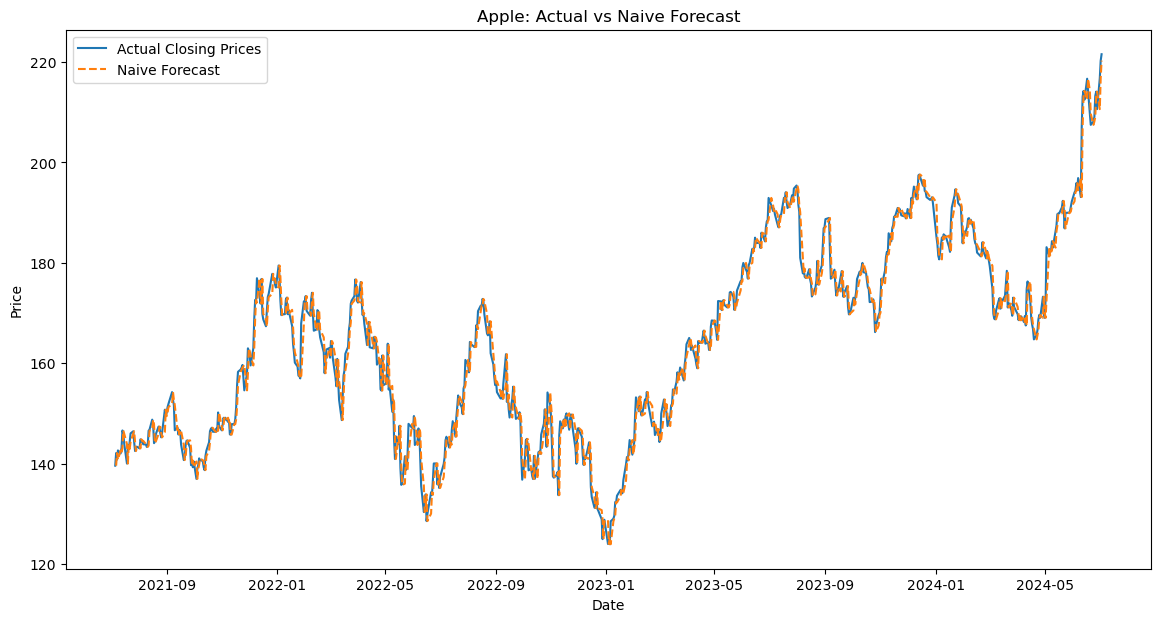

Amazon Naive Forecast MAE: 2.25
Amazon Naive Forecast MSE: 9.66


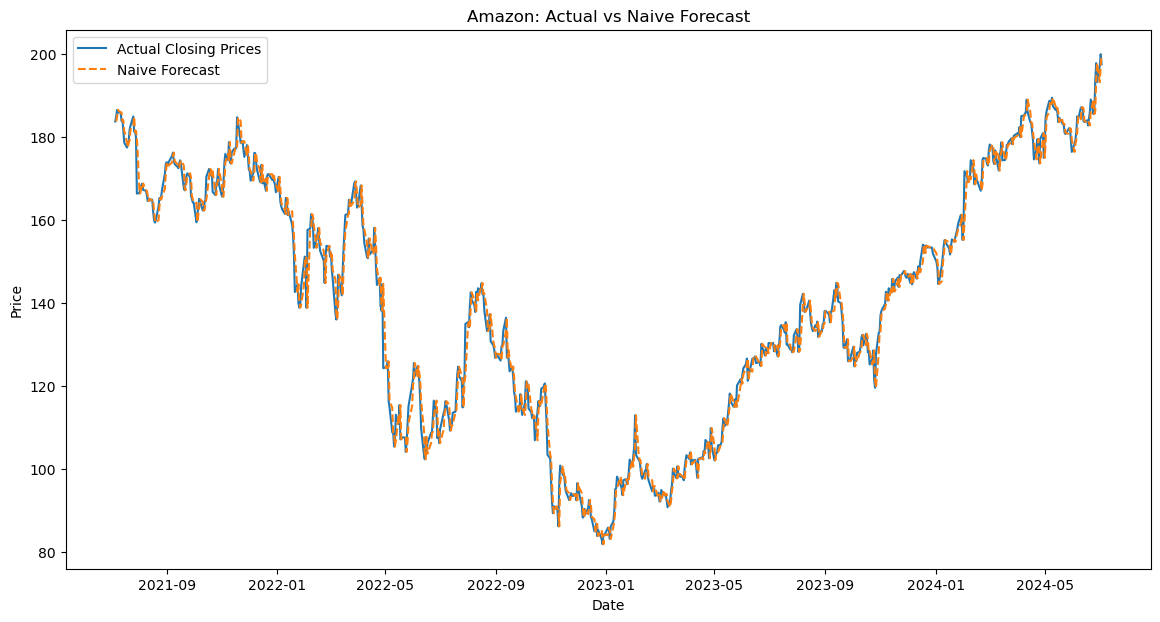

Tesla Naive Forecast MAE: 6.43
Tesla Naive Forecast MSE: 81.97


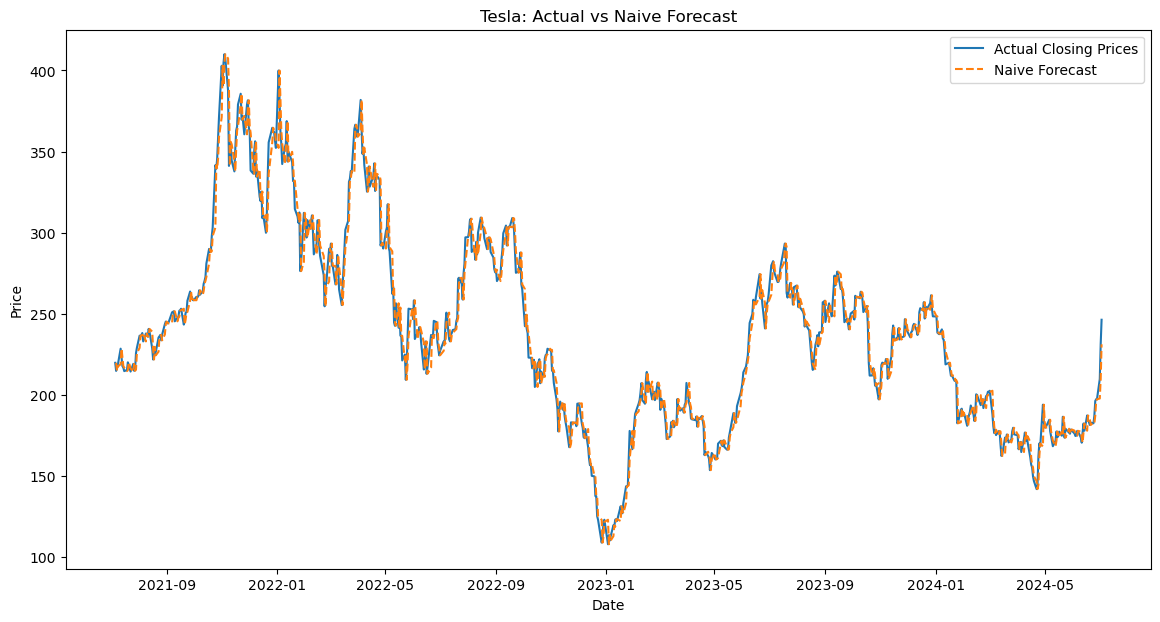

GBP Naive Forecast MAE: 0.00
GBP Naive Forecast MSE: 0.00


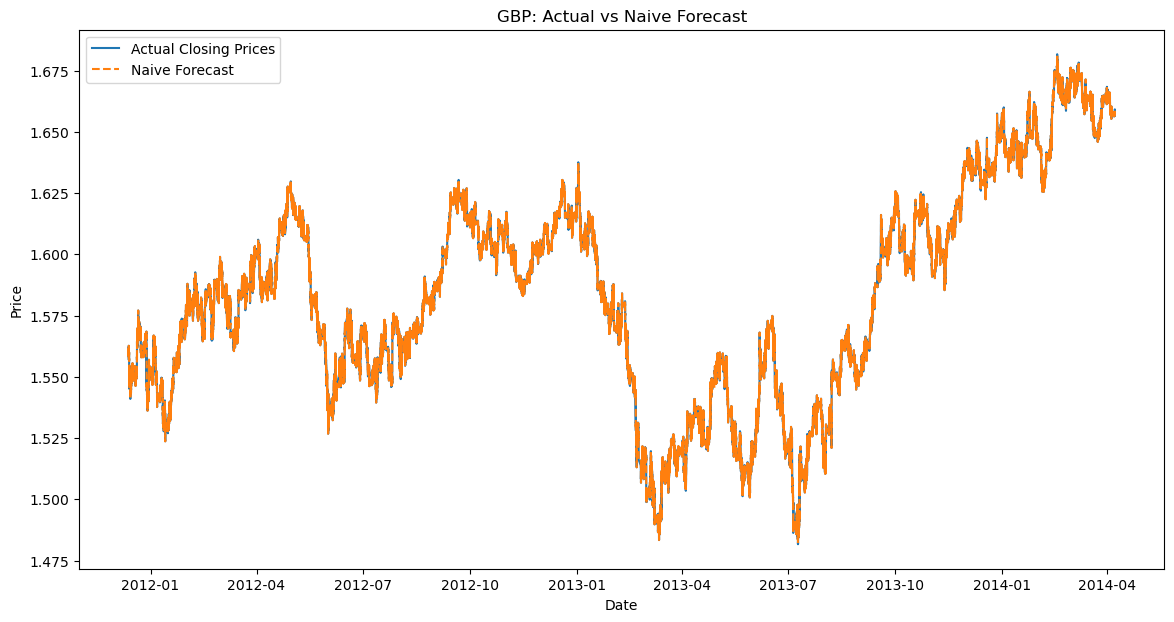

Gold Naive Forecast MAE: 0.31
Gold Naive Forecast MSE: 0.24


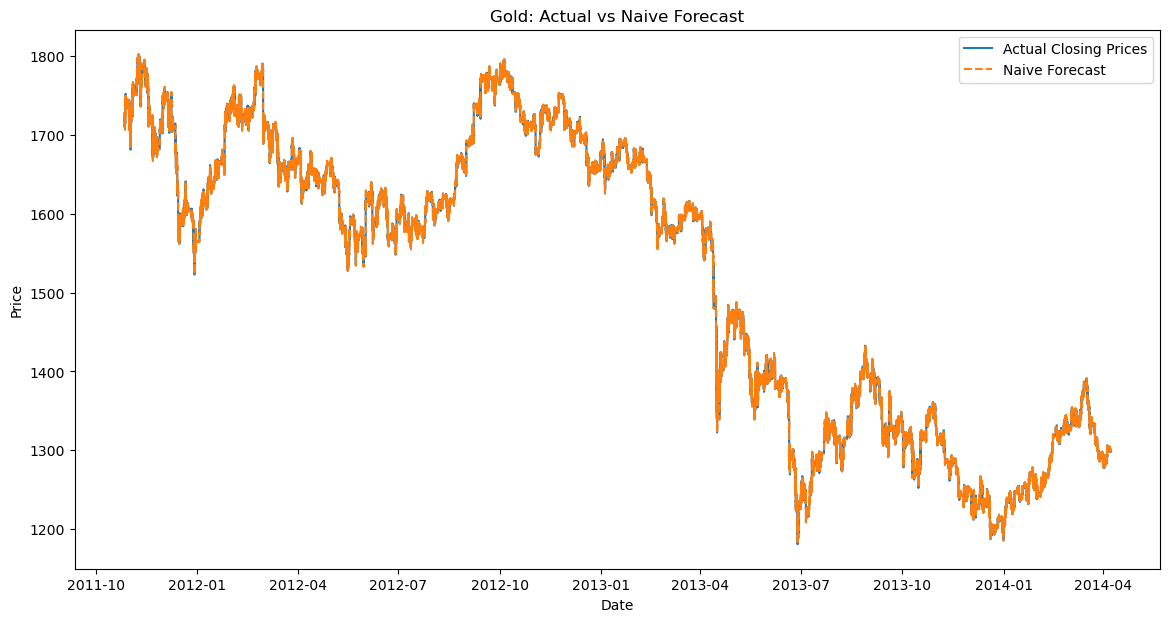

UK House Sales Naive Forecast MAE: 9680.76
UK House Sales Naive Forecast MSE: 218413808.44


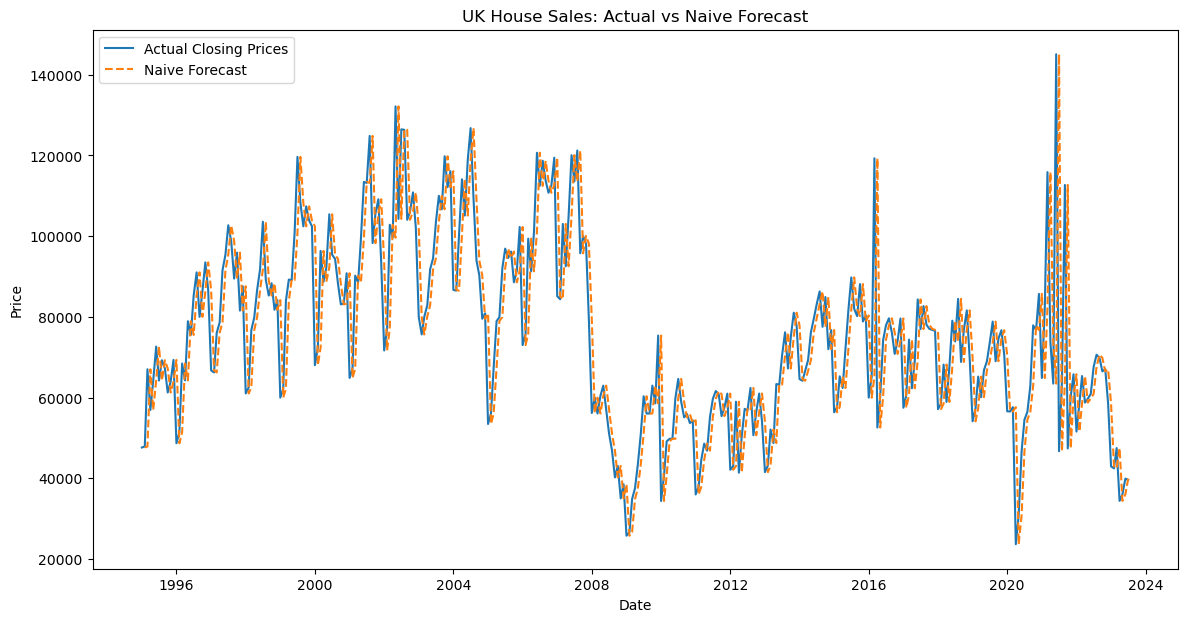

In [281]:
# Apply forecasts, plot results, and display errors with the plot
for name, data in datasets.items():
    data['Naive_Forecast'] = naive_forecast(data['Close'])
    valid_data = data.dropna(subset=['Naive_Forecast'])
    
    # Calculate errors
    mae, mse = calculate_errors(valid_data['Close'], valid_data['Naive_Forecast'])
    
    # Print error metrics
    print(f"{name} Naive Forecast MAE: {mae:.2f}")
    print(f"{name} Naive Forecast MSE: {mse:.2f}")
    
    # Plot results
    plot_naive_forecast(data, name)


Apple stock:
MAE (Mean Absolute Error): 2.05
This means that, on average, the Naive forecast differs from the actual closing price by about \$2.05. This is a relatively small error given the price range of Apple stock, indicating that the Naive forecast is reasonably accurate for short-term predictions.

MSE (Mean Squared Error): 7.54
The MSE value of 7.35 indicates that the squared average deviation from the actual values is 7.35. Since MSE penalizes larger errors more significantly than MAE, this metric helps to highlight any larger deviations. The value here suggests that while most predictions are close, there are some instances with larger errors.

Similar comments could be made about the other datasets here, but to compare the accuracy of the three different forecasting methods, I will analyse all these results (and forecasting methods) at the end.

### Seasonal Naive Forecast

A seasonal naive forecast is a modification of the naive forecast which fixes a time period over which the data is expected to repeat, and guesses a time series at each step will take the same value as it did exactly one period ago.

For this section, I have used a seasonal naive forecast which assumes a period of one year, though of course other periods (like a day or week) are possible for many of these datasets. Further analysis may be needed to check for seasonality at different scales. I have chosen a year here because it can apply to all the datasets considered here, and because the only clearly seasonal dataset (by visual inspection), the UK house sales data, has a one year period. The number of data points per year varies by dataset, and this is stored as the period.

I expect the errors here to be much larger than the naive forecast, because all the datasets vary much more from one year to the next than they do over the (much shorter) time from one data point to the next.

In [282]:
# Calculate periods

aapl_period = aapl_prices.index.get_loc(pd.Timestamp('2022-07-06 00:00:00-04:00'))
print(aapl_period)
#The periods for amazon and tesla are the same

gbp_period = gbp.index.get_loc(pd.Timestamp('2012-12-13 02:05:00'))
print(gbp_period)
#The period for gold is the same

252
385064


Apple Seasonal Naive Forecast MAE: 23.84
Apple Seasonal Naive Forecast MSE: 852.34


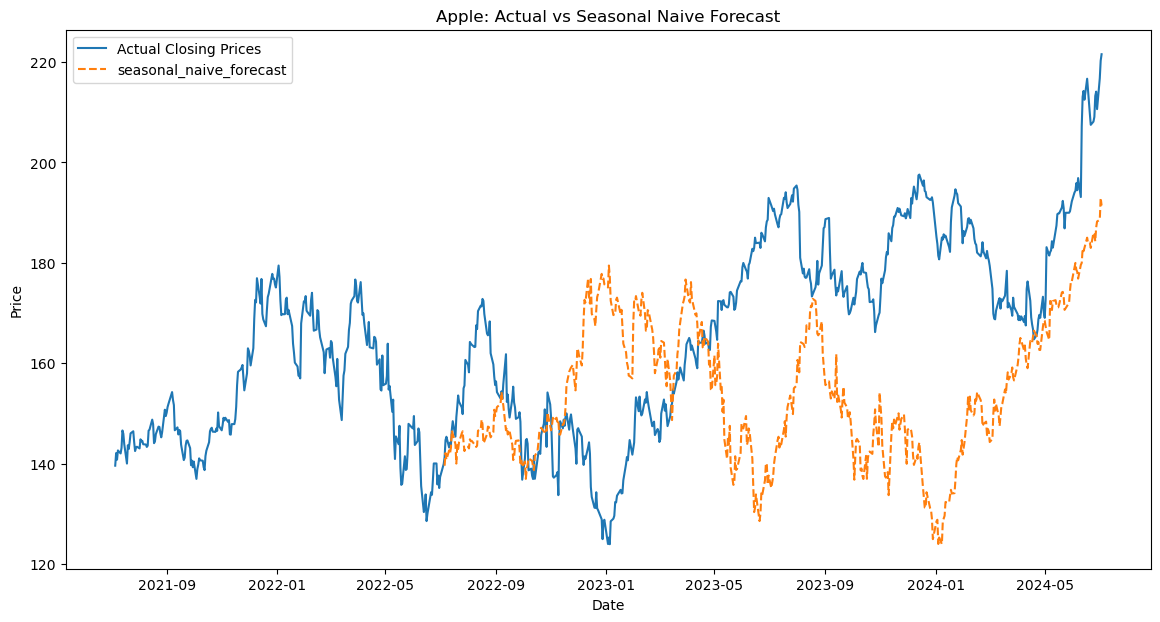

Amazon Seasonal Naive Forecast MAE: 49.03
Amazon Seasonal Naive Forecast MSE: 3095.91


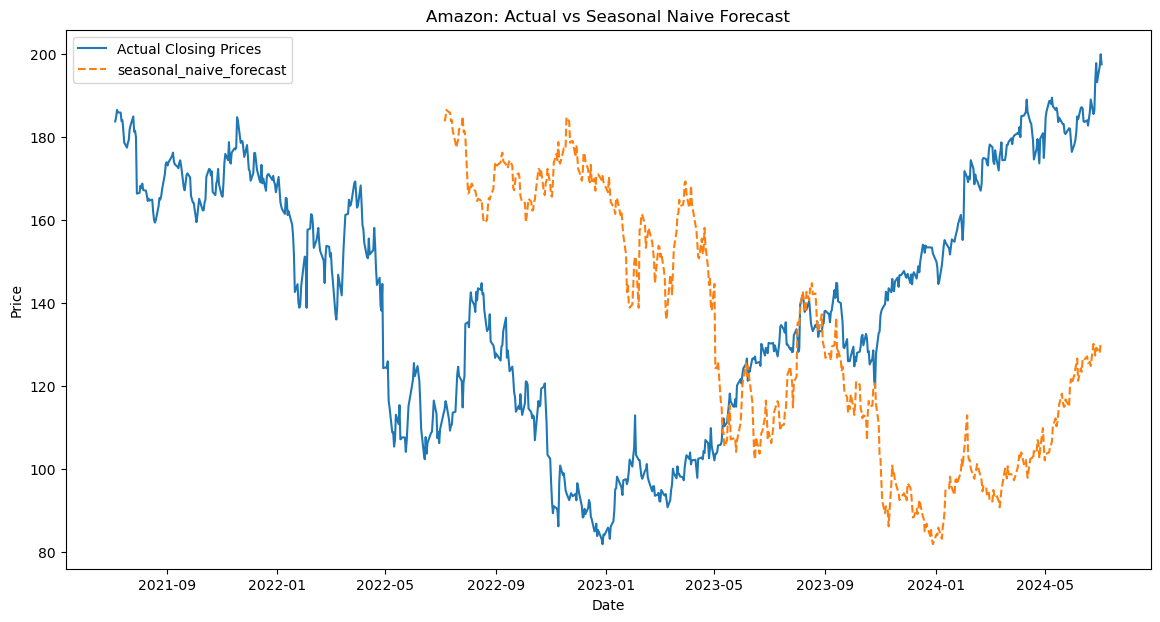

Tesla Seasonal Naive Forecast MAE: 70.98
Tesla Seasonal Naive Forecast MSE: 8892.45


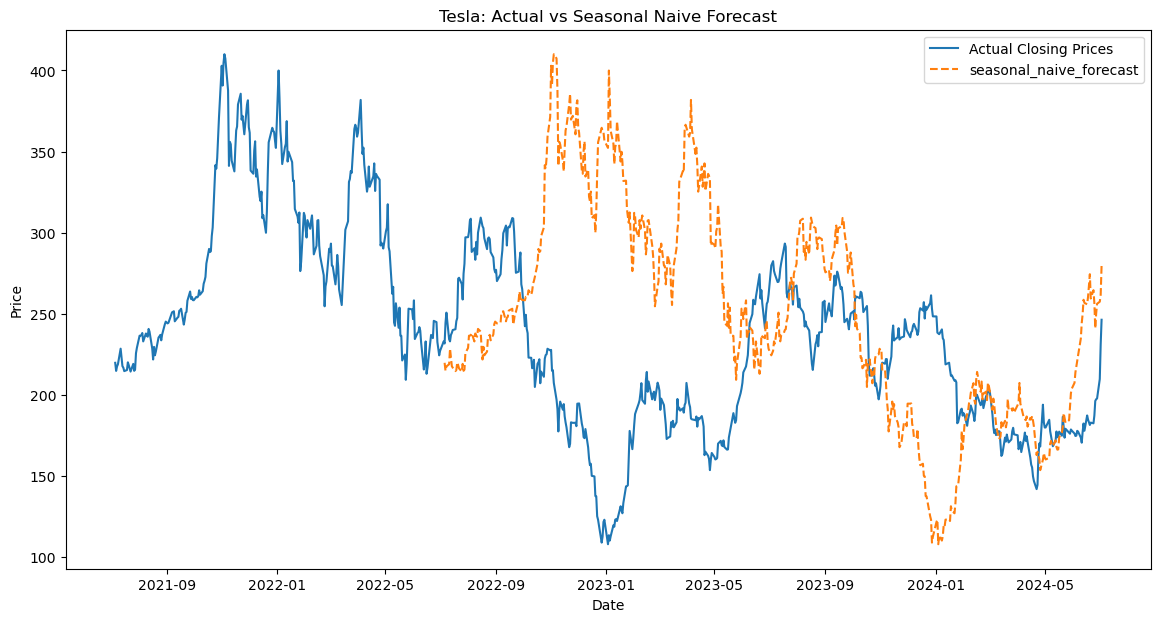

GBP Seasonal Naive Forecast MAE: 0.05
GBP Seasonal Naive Forecast MSE: 0.00


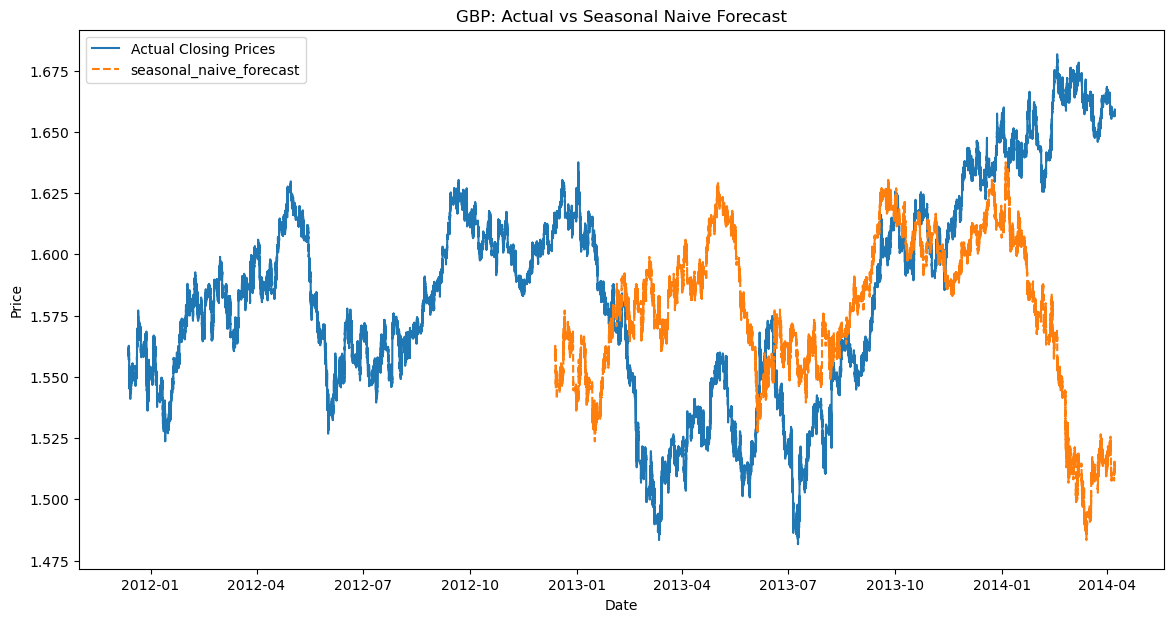

Gold Seasonal Naive Forecast MAE: 261.38
Gold Seasonal Naive Forecast MSE: 90944.87


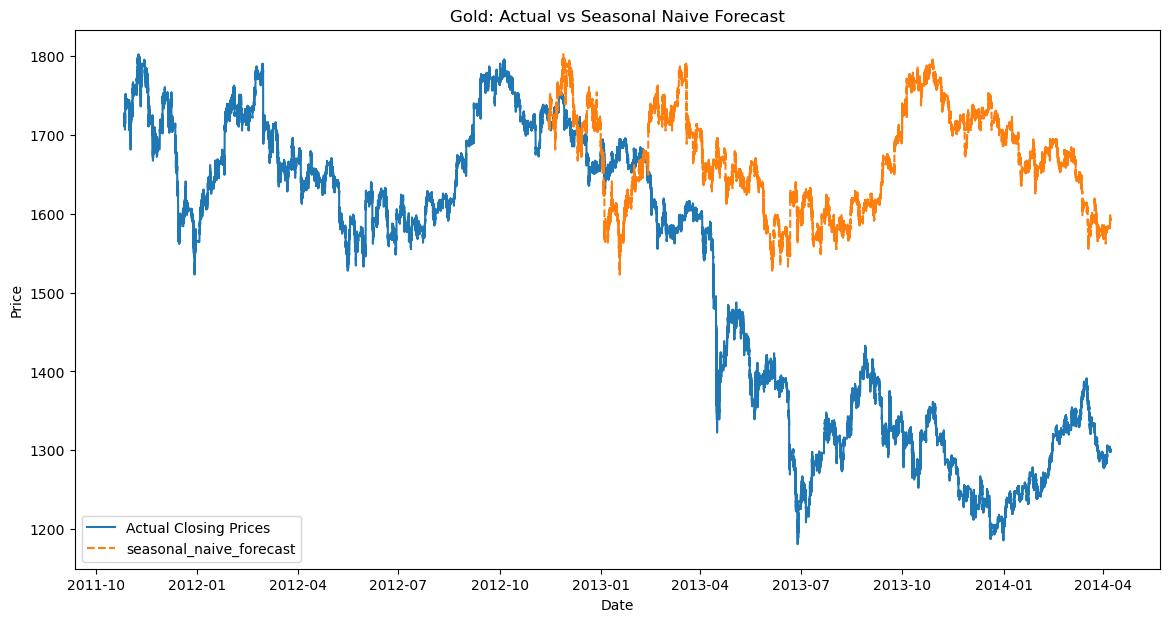

UK House Sales Seasonal Naive Forecast MAE: 14100.84
UK House Sales Seasonal Naive Forecast MSE: 406346857.21


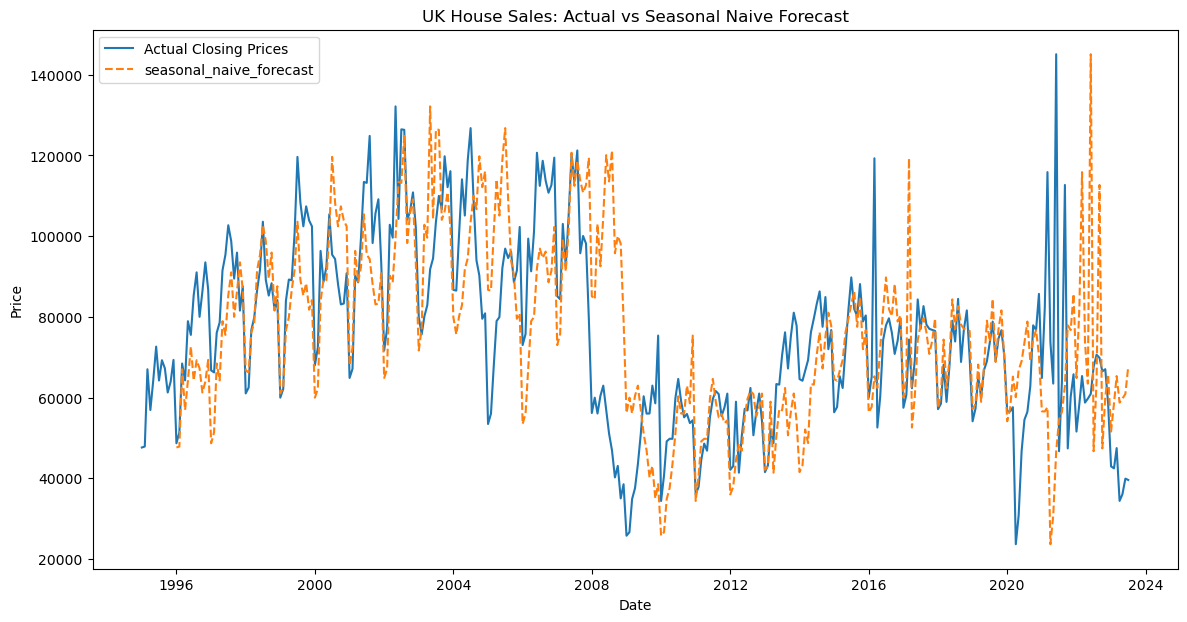

In [283]:
periods = {
    'Apple': 252,
    'Amazon': 252,
    'Tesla': 252,
    'GBP': 385064,
    'Gold': 385064,
    'UK House Sales': 12
}

# Define Seasonal Naive forecast function
def seasonal_naive_forecast(series, season_length=12):
    return series.shift(season_length)

# Define plotting function
def plot_Seasonal_Naive_forecast(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Actual Closing Prices')
    plt.plot(data.index, data['Seasonal_Naive_Forecast'], label='seasonal_naive_forecast', linestyle='--')
    plt.title(f'{title}: Actual vs Seasonal Naive Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Apply forecasts, plot results, and display errors
for name, data in datasets.items():
    # Apply Seasonal Naive Forecast
    data['Seasonal_Naive_Forecast'] = seasonal_naive_forecast(data['Close'],periods[name])
    valid_data = data.dropna(subset=['Seasonal_Naive_Forecast'])
    mae, mse = calculate_errors(valid_data['Close'], valid_data['Seasonal_Naive_Forecast'])
    
    # Print error metrics
    print(f"{name} Seasonal Naive Forecast MAE: {mae:.2f}")
    print(f"{name} Seasonal Naive Forecast MSE: {mse:.2f}")
    
    # Plot results
    plot_Seasonal_Naive_forecast(data, name)

Apple Stock: The high MAE and MSE values indicate that the Seasonal Naive method does not perform well for Apple stock. This suggests that Apple stock prices do not exhibit strong seasonal patterns, making this method less effective. It is also quite clear from the graph that the forecast is not an effective method here. The same is true for all the other non-seasonal datasets.

UK House Sales: The overlaid graphs of actual vs predicted sales volumes make it very clear that the data is seasonal with a period of one year: for most of the graph, the real peaks and troughs line up well with the offset (predicted) ones. In certain parts of the time period, where the market was especially stable, the sizes of these peaks and troughs are similar too. On the other hand, this forecasting method still clearly performs much less well here than the naive forecast, either by visual inspection or by comparing the errors.

As above, I save further analysis comparing the forecasting methods for the bottom of the section.

### Average forecast

In the average forecast, we modify the naive forecast: rather than assuming a value will be the same as the one before, we assume it will change by the average difference of the last p values - a 'rolling average' of differences. This p is a variable which will depend on the specific case; here we have set it to 10 for all the datasets to maintain some comparability between them, but in practice, the optimal value for each will be different.

For datasets with stable trends and low volatility, the Average forecast provides a useful and efficient method for short-term predictions. Here 'stable trends' means that trends last for some reasonable length of time relative to p, so the effectiveness of this forecast will depend on the stability of our datasets and our choice of p.

Apple Average Forecast MAE: 2.16
Apple Average Forecast MSE: 8.33


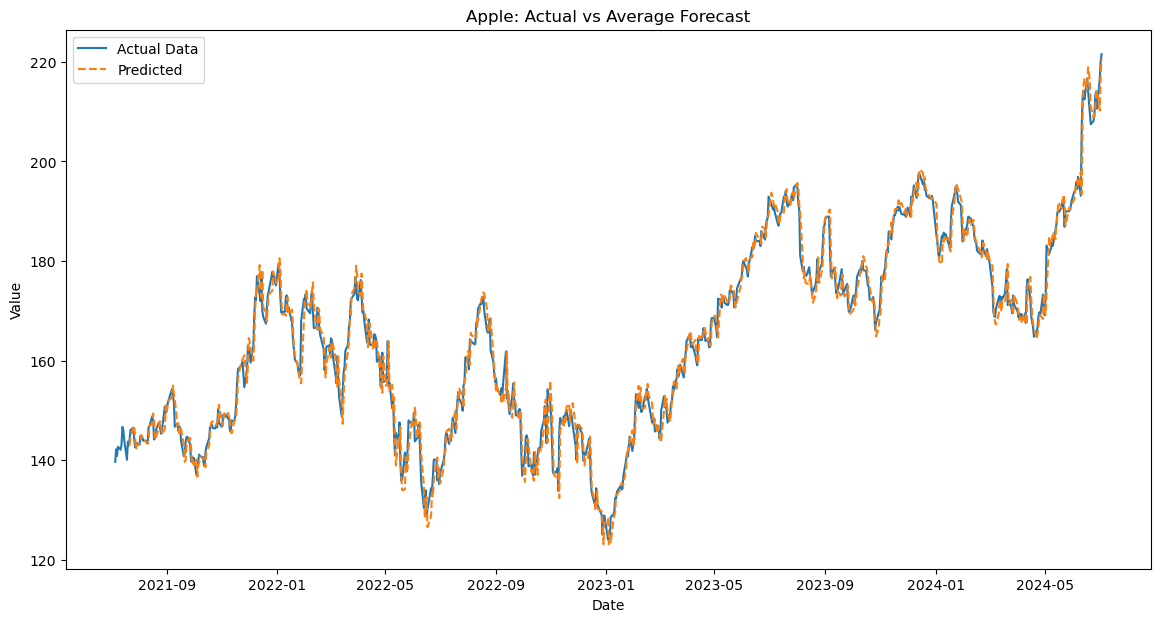

Amazon Average Forecast MAE: 2.43
Amazon Average Forecast MSE: 10.82


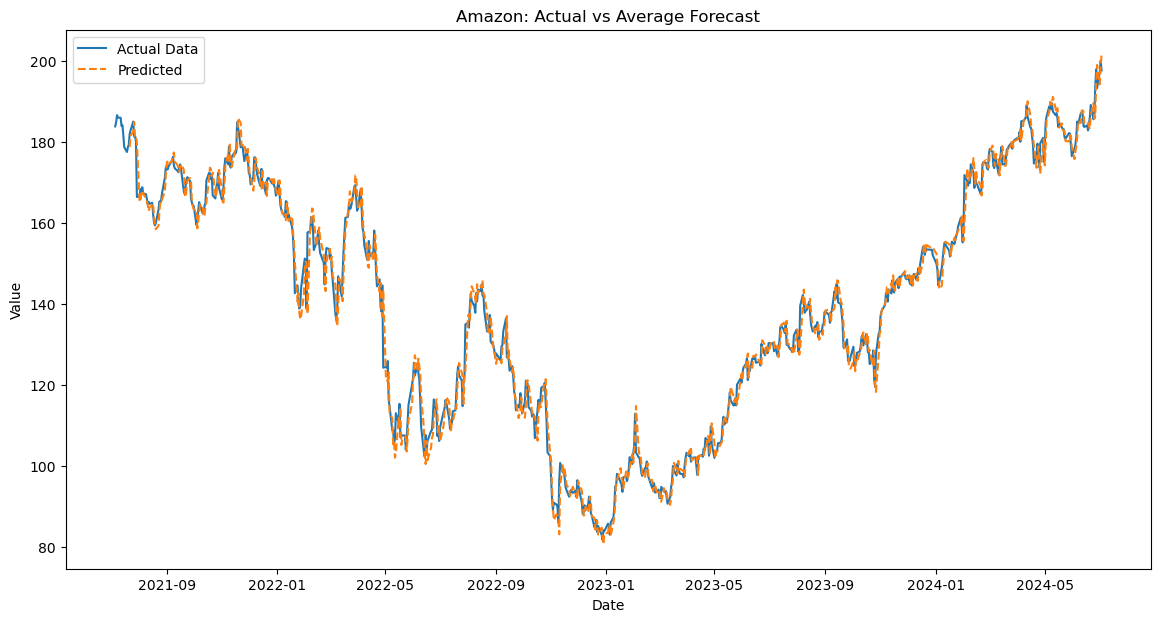

Tesla Average Forecast MAE: 6.83
Tesla Average Forecast MSE: 90.25


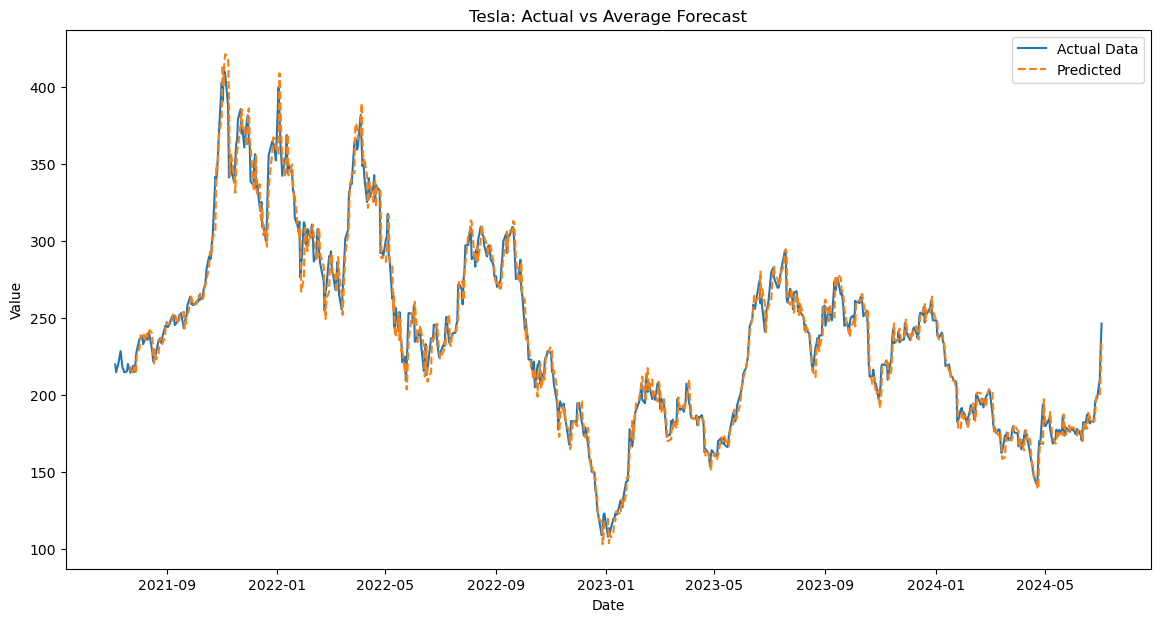

GBP Average Forecast MAE: 0.00
GBP Average Forecast MSE: 0.00


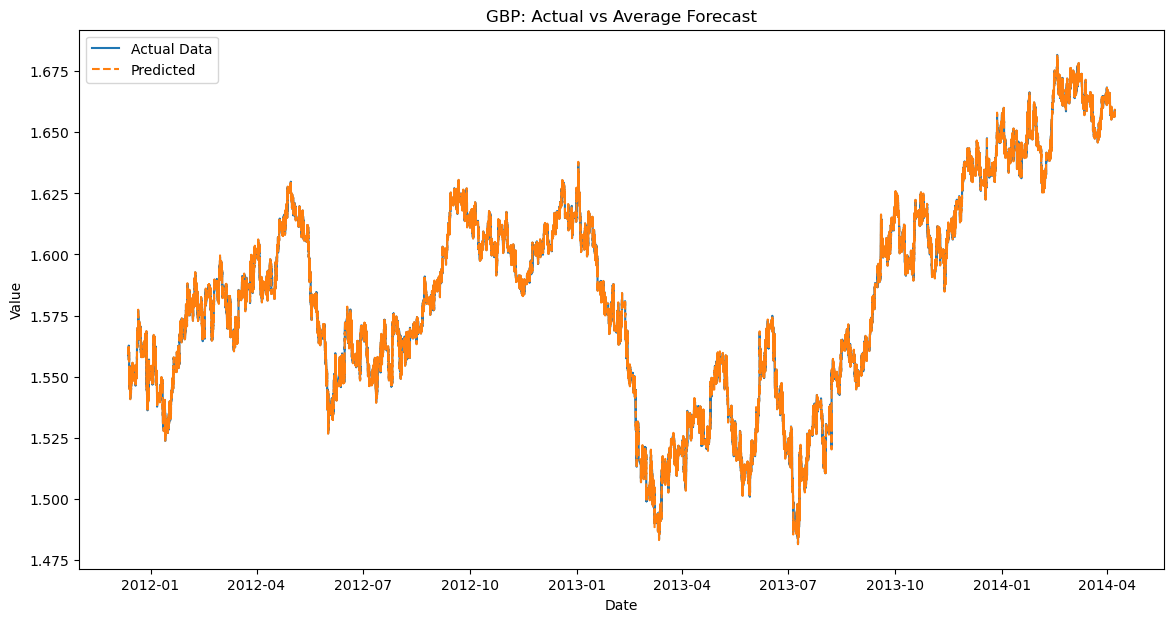

Gold Average Forecast MAE: 0.33
Gold Average Forecast MSE: 0.26


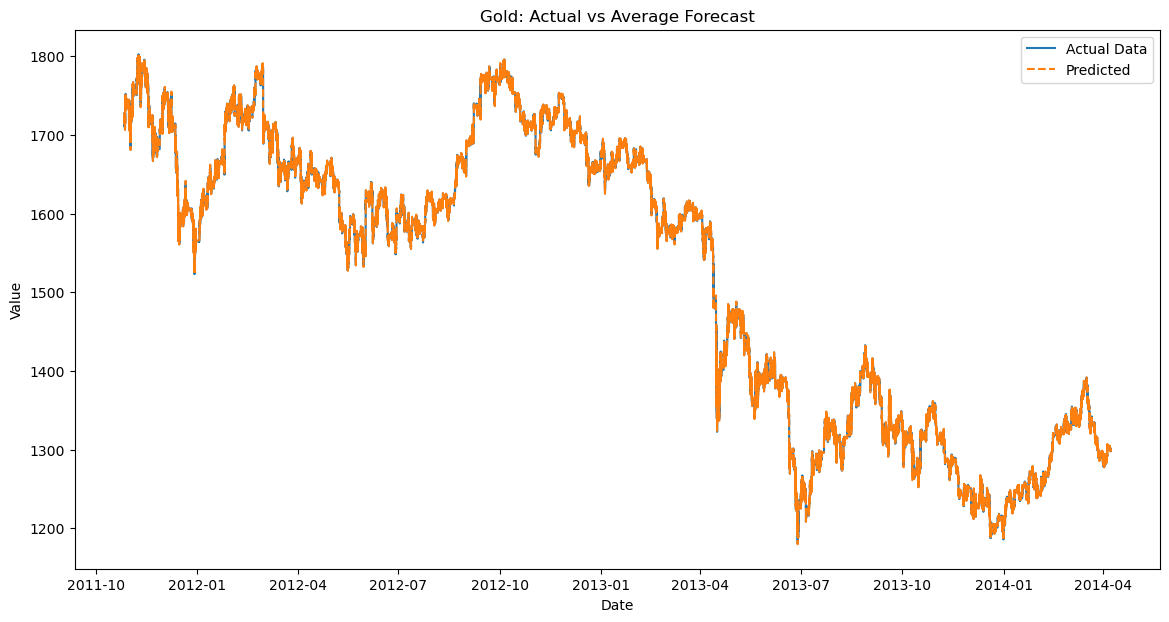

UK House Sales Average Forecast MAE: 10680.27
UK House Sales Average Forecast MSE: 257286232.69


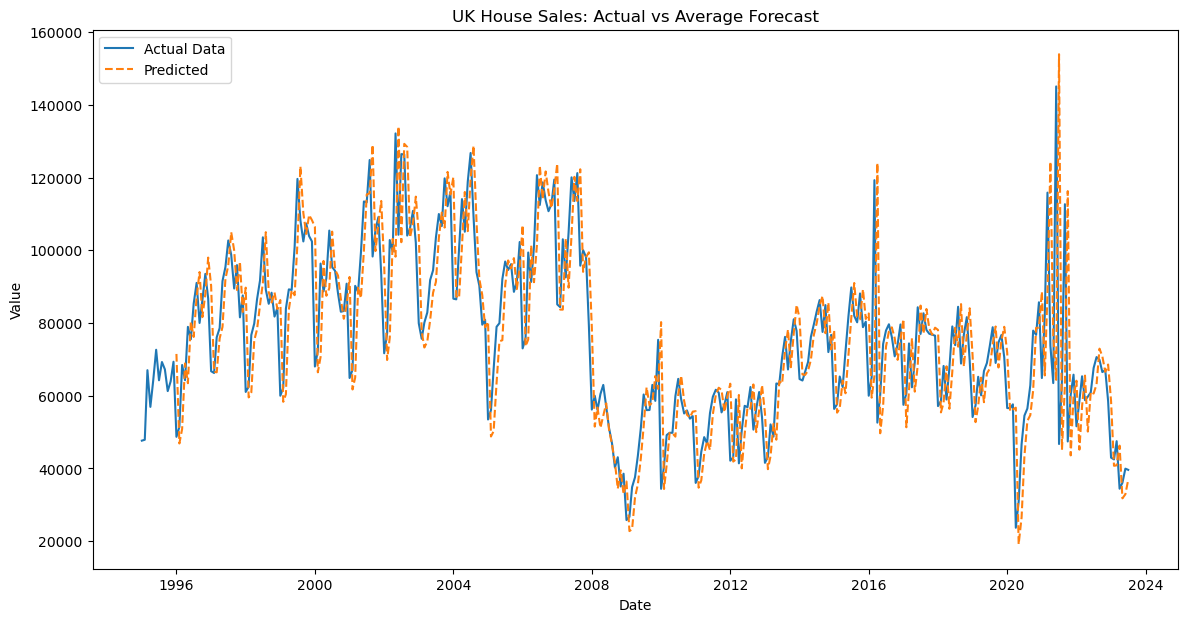

In [295]:
def difference_average (df,p):
    differences = df['Close'] - df['Close'].shift()
    predictions_of_differences = 1/p * (differences.cumsum().shift(1) - differences.cumsum().shift(p+1))
    df['Average_forecast'] = predictions_of_differences + df['Close'].shift()
    return df

# Define plotting function for Average forecast
def plot_average_forecast(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Actual Data')
    plt.plot(data.index, data['Average_forecast'], label='Predicted', linestyle='--')
    plt.title(f'{title}: Actual vs Average Forecast')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Apply forecasts and calculate errors
for name, data in datasets.items():
    # Apply Average Forecast
    data = difference_average(data,10)
    valid_data = data.dropna(subset=['Average_forecast'])
    mae, mse = calculate_errors(valid_data['Close'], valid_data['Average_forecast'])
    
    # Print error metrics
    print(f"{name} Average Forecast MAE: {mae:.2f}")
    print(f"{name} Average Forecast MSE: {mse:.2f}")
    
    # Plot the forecast
    plot_average_forecast(data, name)


Like the naive forecast, the average forecast graphs show close adherence to the actual values, and for the same reason: in all these datasets, the value does not change much from one point to the next. This means the performance of this forecast should be quite good. Which of these two forecasts performs better for each dataset will depend on whether short term trends in the data tend to last for about 10 data points, in which case the 10-point rolling average of differences will be likely to helpfully predict the next change. As I said earlier, the best value of p will depend on the dataset, as it will depend on how long such short term trends in the data tend to last. Further analysis should be able to suggest good values for p on this basis, but I have not done this here.


### Comparison of Forecasting Methods

In [296]:
# Initialize result table
results = []

# Apply forecasts and calculate errors
for name, data in datasets.items():
    row = {'Dataset': name}
    
    # Apply Naive Forecast
    valid_data = data.dropna(subset=['Naive_Forecast'])
    mae, mse = calculate_errors(valid_data['Close'], valid_data['Naive_Forecast'])
    row['Naive_MAE'] = mae
    row['Naive_MSE'] = mse
    
    valid_data = data.dropna(subset=['Seasonal_Naive_Forecast'])
    mae, mse = calculate_errors(valid_data['Close'], valid_data['Seasonal_Naive_Forecast'])
    row['Seasonal_Naive_MAE'] = mae
    row['Seasonal_Naive_MSE'] = mse
    
    valid_data = data.dropna(subset=['Average_forecast'])
    mae, mse = calculate_errors(valid_data['Close'], valid_data['Average_forecast'])
    row['Average_MAE'] = mae
    row['Average_MSE'] = mse

    # Append results
    results.append(row)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results table
print("Forecasting Errors Table")
print(results_df)

Forecasting Errors Table
          Dataset    Naive_MAE     Naive_MSE  Seasonal_Naive_MAE  \
0           Apple     2.051027  7.537525e+00           23.843089   
1          Amazon     2.253609  9.662463e+00           49.026298   
2           Tesla     6.428026  8.197331e+01           70.981314   
3             GBP     0.000138  4.578331e-08            0.050727   
4            Gold     0.312450  2.372890e-01          261.380862   
5  UK House Sales  9680.763158  2.184138e+08        14100.842900   

   Seasonal_Naive_MSE   Average_MAE   Average_MSE  
0        8.523430e+02      2.162184  8.330200e+00  
1        3.095908e+03      2.432862  1.081513e+01  
2        8.892452e+03      6.828457  9.024868e+01  
3        4.291585e-03      0.000152  5.061927e-08  
4        9.094487e+04      0.333917  2.616758e-01  
5        4.063469e+08  10680.269789  2.572862e+08  


Overall, we see that, for every dataset tested, the naive and average forecasts produce good results, performing very similarly by predicting the next point in a time series based primarily on the most recent value. The primacy of this most recent value is probably the most important insight here: while other factors may have some predictive power, it is far smaller. Predictably, because of this, the seasonal naive forecast performed catastrophically worse than the other two. In real-world datasets of the type considered here, the seasonal naive forecast is unlikely to find any applications; it would require exceptionally strong seasonality and almost no other source of variation for this to be a helpful method.

Somewhat surprisingly, the naive forecast consistently outperformed the average forecast across these datasets, and it did this for a range of values of p I experimented with (from p=1 to p=20). As I described earlier, this must mean that changes in these datasets have little to no dependence on previous short-term trends. A Markov chain model might be useful here, as it assumes no dependence on the past behaviour of the data except its most recent value.

One possible further forecast to try could be a seasonally adjusted naive forecast, in which the predicted value is given by the most recent value plus a seasonal adjustment given by the average difference at that season. This might give better results for strongly seasonal datasets like the UK house sales data. Due to time constraints, I have not performed this analysis here.

# Topic 4

In this analysis, I will apply the AR (Auto-Regressive) model using PACF (Partial Autocorrelation Function) analysis to Apple stock and GBP/USD exchange rate data.

In simple terms, a PACF analysis works by looking, at each natural number n, for correlations between the data and a version of the data time-shifted by n steps. It is 'partial' because the value given for n is calculated after the first n-1 correlations are taken into account (this is the difference between a PACF and an ACF). A strong correlation at n indicates that knowledge of how the data looked n steps ago gives us information about how the data looks now, and we aim to use that to make predictions.

After this analysis has found some q such that only the most recent q steps give useful information, we build an AR(q) model which uses the most recent q values to make predictions; how those q values affect the next value is calculated from the data up to that point. This may be thought of as a generalisation of the average forecast which, instead of calculating the mean of recent differences, calculates a weighted average instead, with weightings calculated to be optimal. This is clearly a much more powerful tool than the average forecast, so we can hope that it will provide more accurate predictions.

### Apple

In [522]:
data = aapl_prices['Close']

# The AR model requires data in the right format, with time steps of constant size
def process_data(data,freq=None):
    data.dropna(inplace=True)

    # Set the frequency of the date index
    data.index = pd.to_datetime(data.index)
    if freq==None:
            freq = pd.infer_freq(data.index)
    data = data.asfreq(freq)
    
    # Forward-fill missing values after setting frequency
    data.ffill(inplace=True)
    
    return data

data = process_data(data)

# Confirm no NaN values after filling
print(data.isnull().sum())  # Confirm no NaN values
print(data.head())

0
Date
2021-07-06 00:00:00-04:00    139.633438
2021-07-07 00:00:00-04:00    142.140625
2021-07-08 00:00:00-04:00    140.832947
2021-07-09 00:00:00-04:00    142.671524
2021-07-12 00:00:00-04:00    142.071777
Freq: B, Name: Close, dtype: float64


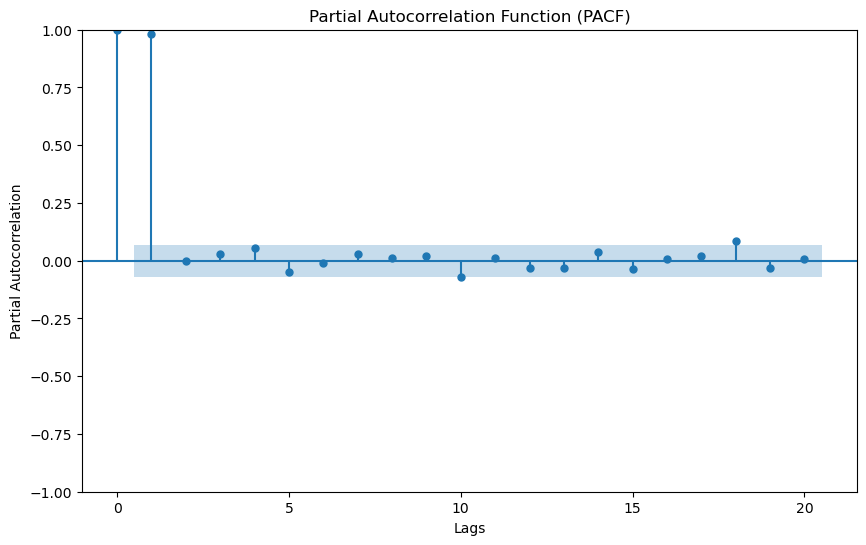

In [523]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg


# Perform PACF analysis
def perform_pacf_analysis(data, lags=20, title='Partial Autocorrelation Function (PACF)'):
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_pacf(data, lags=lags, ax=ax)
    plt.title(title)
    plt.xlabel('Lags')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

# Perform PACF analysis for the chosen data
perform_pacf_analysis(data)

The PACF analysis gives a chart with a shaded rectangle; points outside that rectangle indicate a statistically significant correlation (at p=0.05), meaning we should choose q at least as big at the corresponding lag. Here we find a very strong (positive) correlation with lag 1, and the only other statistically significant correlation is a negative one at lag 14. So we choose q=14.

The highly significant lag-1 correlation suggests a strong persistence in stock prices, meaning today's price is closely related to yesterday's price. Meanwhile, it is intriguing to wonder whether the lag-14 correlation could correspond to some biweekly process, and indeed the lag-7 correlation is the strongest one between 1 and 14. But without more information, it is hard to know. Further analysis could consider a refinement of the model with seasonal adjustments with a period of one week.

In [524]:
# Fit the AR model
def fit_ar_model(data, lags):
    model = AutoReg(data, lags=lags).fit()
    return model

# Determine the lag from PACF plot
p = 14
ar_model = fit_ar_model(data, lags=p)
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  782
Model:                    AutoReg(14)   Log Likelihood               -1844.908
Method:               Conditional MLE   S.D. of innovations              2.673
Date:                Sun, 07 Jul 2024   AIC                           3721.815
Time:                        23:59:20   BIC                           3796.116
Sample:                    07-26-2021   HQIC                          3750.413
                         - 07-03-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8719      0.882      0.989      0.323      -0.856       2.600
Close.L1       1.0237      0.036     28.383      0.000       0.953       1.094
Close.L2      -0.0573      0.052     -1.111      0.2

Apple AR Model MAE: 1.983117
Apple AR Model MSE: 7.146121


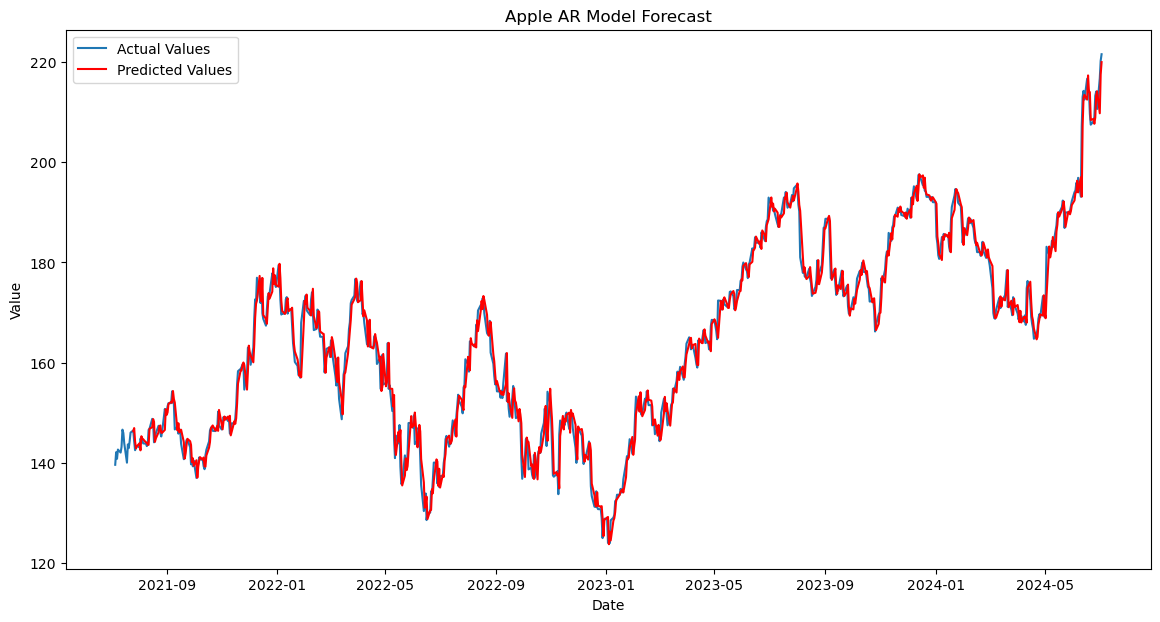

In [525]:
# Error calculation function for AR model
def calculate_ar_errors(model, data, lags):
    predictions = model.predict(start=lags, end=len(data)-1, dynamic=False)
    actual = data[lags:]
    errors = actual - predictions
    mae = errors.abs().mean()
    mse = (errors**2).mean()
    return mae, mse

# Calculate errors for AR model for Apple stock
mae_ar, mse_ar = calculate_ar_errors(ar_model, data, lags=p)
print(f"Apple AR Model MAE: {mae_ar:f}")
print(f"Apple AR Model MSE: {mse_ar:f}")

# Plot the actual vs predicted values
def plot_ar_forecast(data, model, lags, title='AR Model Forecast'):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data, label='Actual Values')
    predictions = model.predict(start=lags, end=len(data)-1, dynamic=False)
    plt.plot(data.index[lags:], predictions, color='red', label='Predicted Values')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_ar_forecast(data, ar_model, lags=p, title='Apple AR Model Forecast')

Recall that the naive forecast for Apple gave MAE=2.05 and MSE=7.54, so the AR(14) model's errors of MAE=1.47 and MSE=5.13 represent a significant improvement, and an excellent result. This shows that more advanced predictive models can do much better than simple ones in forecasting the type of complex datasets we are considering here.

### Check with Tesla

I want to repeat the same process using the Tesla dataset, to see if we can outperform the naive forecast's predictions once again.

In [317]:
data = tsla_prices['Close']
data = process_data(data)

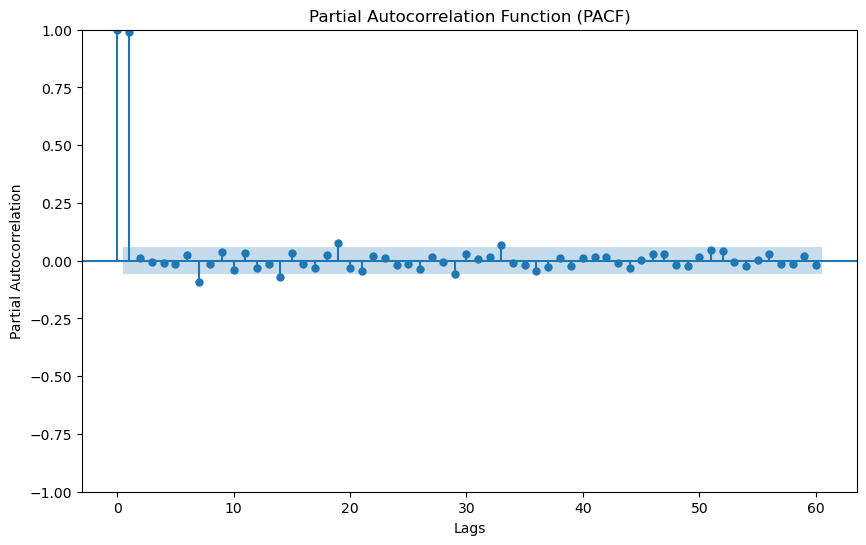

In [322]:
# Perform PACF analysis
perform_pacf_analysis(data,lags=60)

The PACF plot shows multiple statistically significant correlations here (at p=0.05) at a variety of lags, including 7 and 14 (suggesting a weekly and biweekly influence). The last one occurs with lag 33; subsequent correlations all seem to be smaller. Therefore, I will fit an AR(q) model with q=33.

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1094
Model:                    AutoReg(33)   Log Likelihood               -3630.124
Method:               Conditional MLE   S.D. of innovations              7.407
Date:                Fri, 05 Jul 2024   AIC                           7330.248
Time:                        17:26:11   BIC                           7504.092
Sample:                    08-08-2021   HQIC                          7396.131
                         - 07-03-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      1.007      2.174      0.030       0.215       4.163
Close.L1       0.9889      0.031     32.228      0.000       0.929       1.049
Close.L2       0.0226      0.043      0.525      0.6

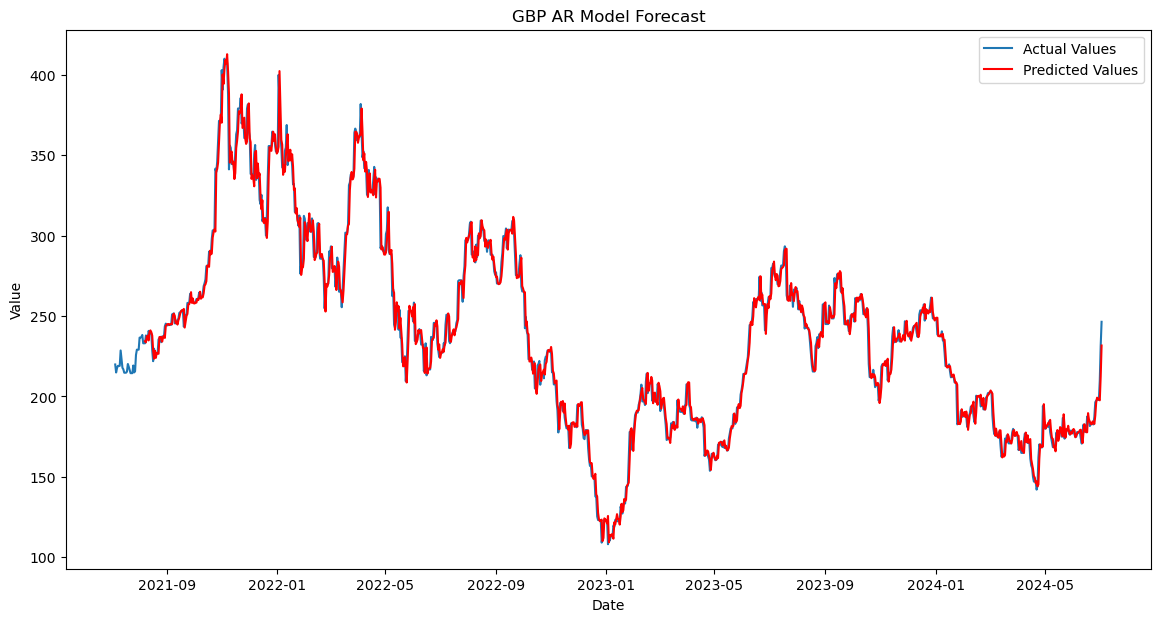

In [321]:
# Determine the lag from PACF plot
p = 33
ar_model = fit_ar_model(data, lags=p)
print(ar_model.summary())

# Calculate errors for AR model for GBP dataset
mae_ar, mse_ar = calculate_ar_errors(ar_model, data, lags=p)
print(f"GBP AR Model MAE: {mae_ar:f}")
print(f"GBP AR Model MSE: {mse_ar:f}")

plot_ar_forecast(data, ar_model, lags=p, title='GBP AR Model Forecast')

Recall that the naive forecast for Tesla gave MAE=6.42 and MSE=82.0, so the AR(33) model's errors of MAE=4.73 and MSE=54.9 represent a significant improvement once again.

Overall, AR models can effectively capture the autocorrelation in time series data, making them useful for financial forecasting. The insights from this analysis suggest that while the most recent price is the strongest predictor, periodic patterns also play a role in Apple and Tesla stock prices.

Here we give a table of all the MAE and MSE values calculated for the forecasting methods considered in Topics 3 and 4.

In [526]:
# Add in the new results
ARq_MAE = [1.98,float('nan'),4.73,float('nan'),float('nan'),float('nan')]
ARq_MSE = [7.15,float('nan'),54.9,float('nan'),float('nan'),float('nan')]

results_df['ARq_MAE'] = ARq_MAE
results_df['ARq_MSE'] = ARq_MSE

# Display the results table
print("Forecasting Errors Table")
print(results_df)

Forecasting Errors Table
          Dataset    Naive_MAE     Naive_MSE  Seasonal_Naive_MAE  \
0           Apple     2.051027  7.537525e+00           23.843089   
1          Amazon     2.253609  9.662463e+00           49.026298   
2           Tesla     6.428026  8.197331e+01           70.981314   
3             GBP     0.000138  4.578331e-08            0.050727   
4            Gold     0.312450  2.372890e-01          261.380862   
5  UK House Sales  9680.763158  2.184138e+08        14100.842900   

   Seasonal_Naive_MSE   Average_MAE   Average_MSE  ARq_MAE  ARq_MSE  
0        8.523430e+02      2.162184  8.330200e+00     1.98     7.15  
1        3.095908e+03      2.432862  1.081513e+01      NaN      NaN  
2        8.892452e+03      6.828457  9.024868e+01     4.73    54.90  
3        4.291585e-03      0.000152  5.061927e-08      NaN      NaN  
4        9.094487e+04      0.333917  2.616758e-01      NaN      NaN  
5        4.063469e+08  10680.269789  2.572862e+08      NaN      NaN  


# Topic 5

In this section, we will use Monte Carlo simulations to forecast some possible future paths for some of my datasets. I will use the same datasets as in Topic 4, Apple and Tesla stock prices, in order to build on the analysis presented there.

My Monte Carlo simulations first train an AR(q) model for the data (where we choose q using a PACF analysis as before), and then use this model to predict a possible future for the data. Doing this many times gives an idea of the future distribution, which can be used to answer questions about the future value of these stocks; the financial applications of this are clear.

### Apple

Using my PACF analysis in Topic 4, I use q=14 for the AR(q) model. I generate 1000 possible future paths for the stock price using this model, looking one year into the future to try to predict the likely stock price at that point.

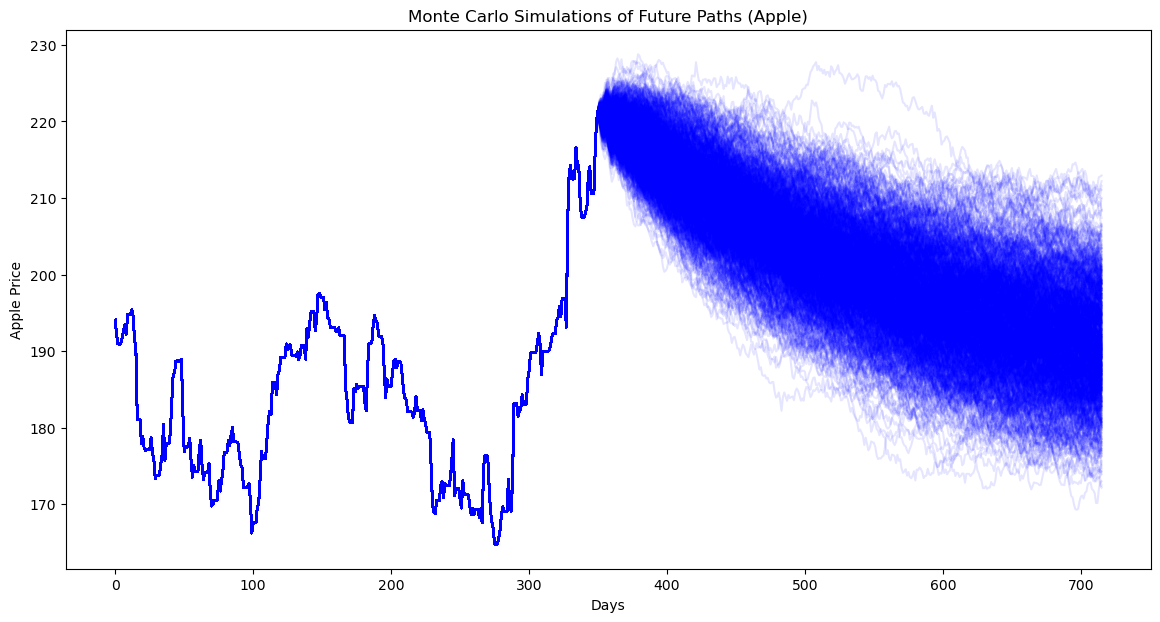

In [475]:
# Monte Carlo simulation function
def monte_carlo_simulation(data, lags, num_simulations, num_steps):
    ar_model = AutoReg(data, lags=lags).fit()
    last_observed_value = data.iloc[-num_steps:].tolist() # So half the data returned will be past, and half future
    # So we can see both in the graphs
    future_paths = []

    for _ in range(num_simulations):
        future_path = last_observed_value.copy()
        for _ in range(num_steps):
            lagged_values = future_path[-lags:]
            prediction = ar_model.params.iloc[0] + np.dot(ar_model.params.iloc[1:], lagged_values[::-1])
            future_path.append(prediction + np.random.normal(scale=ar_model.bse.iloc[0]))
        future_paths.append(future_path[lags:])
    
    return np.array(future_paths)

def monte_carlo_plot(future_paths,title='Monte Carlo Simulations of Future Paths',xlabel='Steps',ylabel='Value'):
    plt.figure(figsize=(14, 7))
    for path in future_paths:
        plt.plot(path, color='blue', alpha=0.1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

data = aapl_prices['Close']
data = process_data(data)
lags = 14 # As suggested by the earlier PACF analysis

# Perform Monte Carlo simulation
num_simulations = 1000
num_steps = 365
future_paths = monte_carlo_simulation(data, lags, num_simulations, num_steps)

monte_carlo_plot(future_paths,'Monte Carlo Simulations of Future Paths (Apple)','Days','Apple Price')

These simulations suggest a gradual decline of the Apple stock price, faster at first before gradually slowing down over the course of the year. We can use these simulations, together with the kernel density function, to attempt to answer questions about the future price of this stock.

For example, suppose I agree with the simulations that Apple's price will go down, and I want to take a short position in European style options with a strike price of 200, expiring in one year. What is the probability that the spot price will be above that level on expiry?

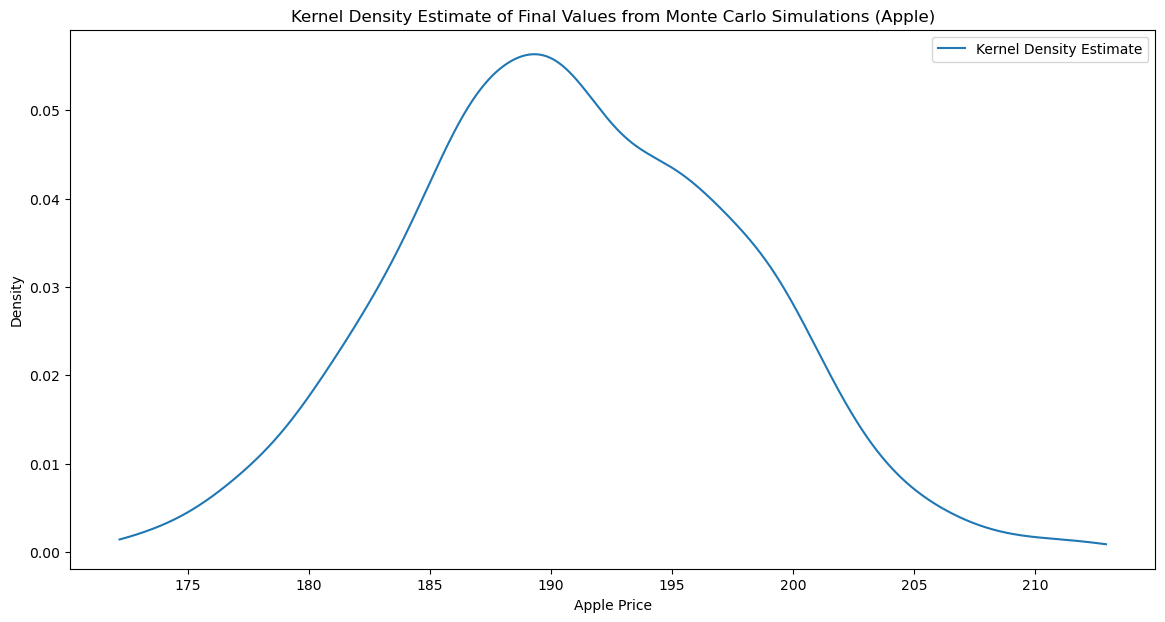

Probability that the future value is higher than 200: 0.10
95% confidence interval for the future values: [177.69161239 204.04367138]


In [476]:
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import gaussian_kde
# Estimate kernel density function
kde = gaussian_kde(future_paths[:, -1])

def kernel_plot(future_paths,title='Kernel Density Estimate of Final Values from Monte Carlo Simulations',
               xlabel='Value',num_simulations=1000):
    x = np.linspace(min(future_paths[:, -1]), max(future_paths[:, -1]), num_simulations)
    plt.figure(figsize=(14, 7))
    plt.plot(x, kde(x), label='Kernel Density Estimate')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Plot the kernel density function
kernel_plot(future_paths,'Kernel Density Estimate of Final Values from Monte Carlo Simulations (Apple)','Apple Price')

# Probability that the future value is higher than a certain threshold
threshold = 200  # Example threshold
probability_above_threshold = np.mean(future_paths[:, -1] > threshold)
print(f"Probability that the future value is higher than {threshold}: {probability_above_threshold:.2f}")

# 95% confidence interval for the future values
confidence_interval = np.percentile(future_paths[:, -1], [2.5, 97.5])
print(f"95% confidence interval for the future values: {confidence_interval}")

My calculations with the kernel density function suggest only a 10% chance of a spot price above 200 in a year's time, and only a 2.5% chance it will be above 204.0. Given these probabilities, I may feel more comfortable betting against Apple in this case.

### Tesla

We perform the same analysis for Tesla. As in Topic 4, our PACF analysis suggests using an AR(q) model with q=33. Once again, I calculate 1000 simulations of the price over the next year.

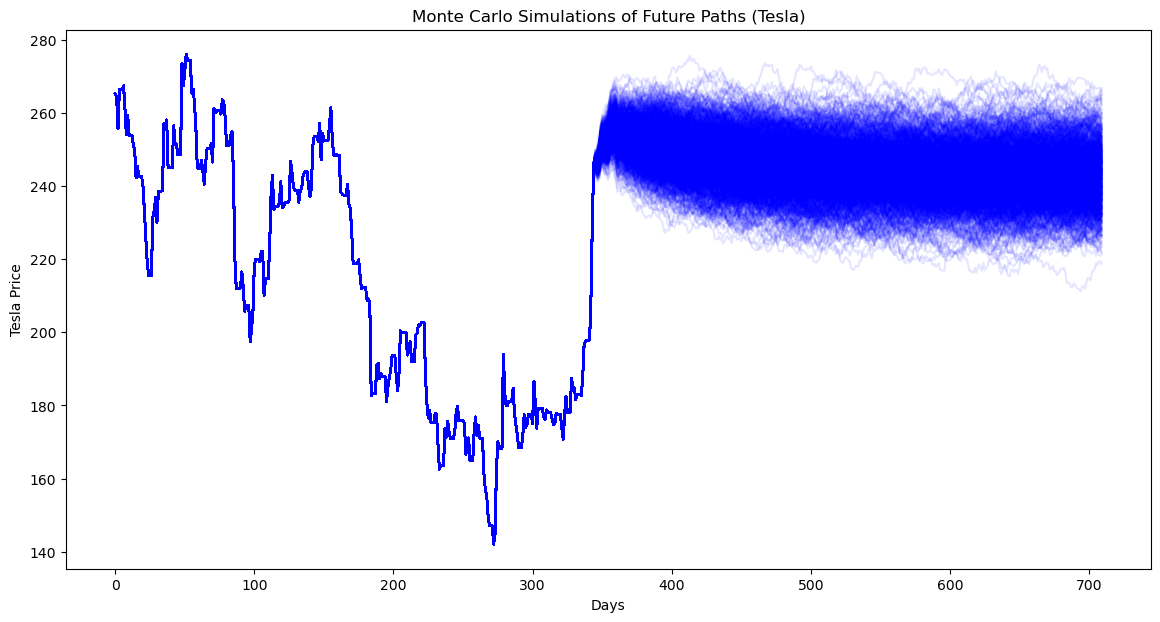

In [334]:
data = tsla_prices['Close']
data = process_data(data)
lags = 20

# Perform Monte Carlo simulation
num_simulations = 1000
num_steps = 365 # Predictions for 1 year
future_paths = monte_carlo_simulation(data, lags, num_simulations, num_steps)

# Plot the Monte Carlo simulations
monte_carlo_plot(future_paths,'Monte Carlo Simulations of Future Paths (Tesla)','Days','Tesla Price')

The simulations show there is considerable uncertainty over whether the price will increase or decrease over the next year, but suggest it will be fairly stable over this time. If I want to hold Tesla shares as a long term investment, I am likely to be interested in the probability that the price will be higher in a year than it is now, and I will calculate this with the kernel density function.

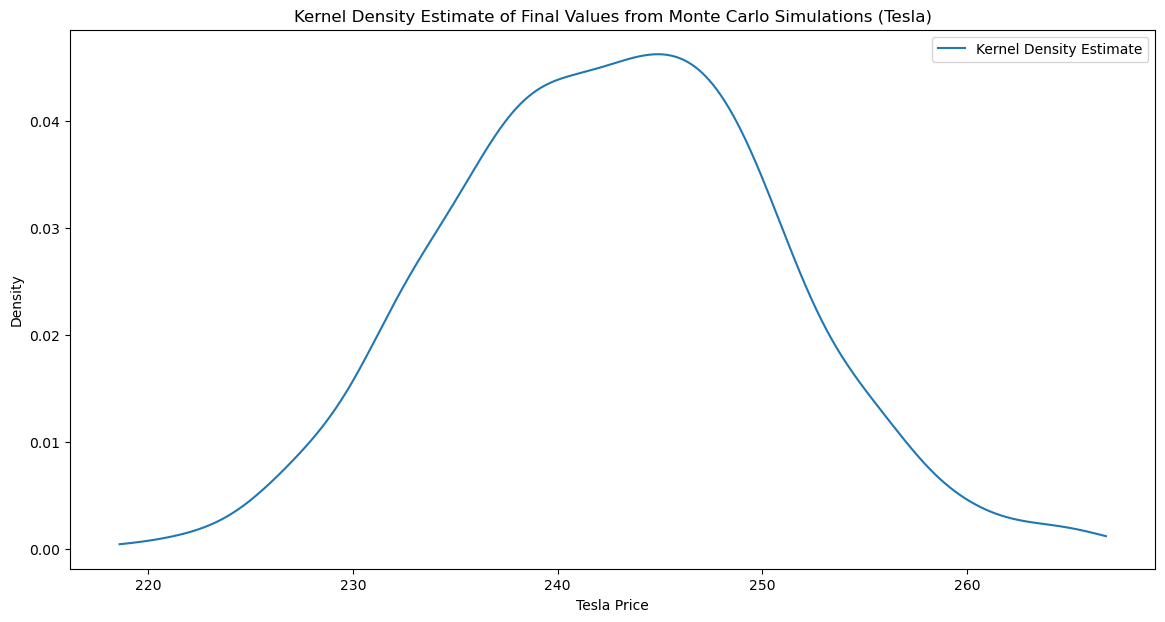

Probability that the future value is higher than 249.09933095688817: 0.21
95% confidence interval for the future values: [227.72572168 258.50608258]


In [335]:
# Estimate kernel density function
kde = gaussian_kde(future_paths[:, -1])

# Plot the kernel density function
kernel_plot(future_paths,'Kernel Density Estimate of Final Values from Monte Carlo Simulations (Tesla)','Tesla Price')

# Probability that the future value is higher than a certain threshold
threshold = future_paths[0][num_steps] # This is the last value in the original data
probability_above_threshold = np.mean(future_paths[:, -1] > threshold)
print(f"Probability that the future value is higher than {threshold}: {probability_above_threshold:.2f}")

# 95% confidence interval for the future values
confidence_interval = np.percentile(future_paths[:, -1], [2.5, 97.5])
print(f"95% confidence interval for the future values: {confidence_interval}")

My analysis suggests only a 21% chance that my investment in Tesla would grow in the next year. Assuming positive inflation, if I intend to hold the shares for a year, I should probably look elsewhere for investment opportunities.

Overall, these tools need to be treated carefully, as the Monte Carlo predictions are only as good as the AR(q) model which produces these predictions. For example, looking at the simulations of Tesla stock prices, every simulation predicts less volatility over the next year than over the previous one. Rather than reflecting a deep truth about the future of the price, it is more likely that this volatility has not been accurately reflected by the model. In that case, the simulations are likely to underestimate the probability of more extreme changes in the stock price at any point over the course of the next year.

On the other hand, when treated with the appropriate care, such tools can be invaluable in helping to quantify our uncertainty about outcomes before we commit to certain investment strategies, and as such they should remain a part of our arsenal.

# Part 2

In this part, we will perform an ACF and PACF analysis, fit an AR(q) model, and calculate Monte Carlo simulations and kernel density functions for the GBP and Gold datasets at 5- and 10-minute intervals. We can then compare the accuracy of the 5- and 10-minute models.

In this part of the coursework, we will use differencing of the GBP and Gold data to obtain stationary datasets for our analyses. Although we did not do this in Part 1, stationarity is necessary to guarantee mathematically that the ACF and PACF results of our data reflect the error terms of the underlying process which has generated the data; therefore, we should expect this technique to yield more accurate results. As well as differencing the data before training an AR(q) model to make predictions, we must also then 'integrate' the results of these predictions to forecast the original data. That this inverts the original process of differencing is a discrete analogue of the fundamental theorem of calculus.

We start by resampling each of the two datasets at each interval; this works by putting the data values for each 5- or 10-minute period into 'buckets', and replacing these values with a single value for the bucket: in this case, we take the mean. In other words, we take the average of the price over the 5- or 10-minute period.

In [125]:
# Show head to verify
print(gbp.head())
print(gold.head())

                      Close  First Differences  Second Differences  \
Date                                                                 
2011-12-13 02:05:00  1.5590                NaN                 NaN   
2011-12-13 02:06:00  1.5590             0.0000                 NaN   
2011-12-13 02:07:00  1.5590             0.0000              0.0000   
2011-12-13 02:08:00  1.5586            -0.0004             -0.0004   
2011-12-13 02:09:00  1.5588             0.0002              0.0006   

                     Relative Differences  Naive_Forecast  \
Date                                                        
2011-12-13 02:05:00                   NaN             NaN   
2011-12-13 02:06:00              0.000000          1.5590   
2011-12-13 02:07:00              0.000000          1.5590   
2011-12-13 02:08:00             -0.025657          1.5590   
2011-12-13 02:09:00              0.012832          1.5586   

                     Seasonal_Naive_Forecast  Predicted  
Date                   

In [336]:
# Resampling prices at 5-minute and 10-minute intervals
gbp5 = gbp['Close'].resample('5T').mean().dropna()
gbp10 = gbp['Close'].resample('10T').mean().dropna()
gold5 = gold['Close'].resample('5T').mean().dropna()
gold10 = gold['Close'].resample('10T').mean().dropna()


### GBP at 5- and 10-minute intervals: ACF, PACF and AR(q)

To check our code is working as expected, we check at various points that the 5-minute GBP data looks as expected, as indeed it does. The same can be done for the other datasets, but I have not printed the other checks here.

In [337]:
# Check the first few entries in the resampled data
print(gbp5.head())
print(gbp5.describe())

# Check for the number of non-NaN entries
print("Non-NaN entries:", gbp5.count())


Date
2011-12-13 02:05:00    1.55888
2011-12-13 02:10:00    1.55892
2011-12-13 02:15:00    1.55916
2011-12-13 02:20:00    1.55946
2011-12-13 02:25:00    1.55930
Name: Close, dtype: float64
count    178236.000000
mean          1.583386
std           0.042688
min           1.481900
25%           1.552320
50%           1.583580
75%           1.612900
max           1.681420
Name: Close, dtype: float64
Non-NaN entries: 178236


In [484]:
data5 = pd.DataFrame()
data5['Close'] = process_data(gbp5,'5T')
data10 = pd.DataFrame()
data10['Close'] = process_data(gbp10,'10T')

To effectively predict the future behaviour of these datasets, it is best to use a stationary time series, as this is what guarantees that the ACF and PACF of the data will be an accurate depiction of the underlying distribution which produced it. We can check for stationarity using the Augmented Dickey-Fuller test with a 5% significance level.

In [403]:
from statsmodels.tsa.stattools import adfuller

print("GBP (5min) Stationarity:",adfuller(data5['Close'])[1] < 0.05) # Check for stationarity at the 5% level
print("GBP (10min) Stationarity:",adfuller(data10['Close'])[1] < 0.05)

GBP (5min) Stationarity: False
GBP (10min) Stationarity: False


Since these datasets are not stationary, we will first calculate their differences, and check for stationarity again.

In [404]:
data5['First Difference'] = data5['Close'].diff().fillna(0)
data10['First Difference'] = data10['Close'].diff().fillna(0)

print("GBP (5min) Differences Stationarity:",adfuller(data5['First Difference'])[1] < 0.05)
print("GBP (10min) Differences Stationarity:",adfuller(data10['First Difference'])[1] < 0.05)

GBP (5min) Differences Stationarity: True
GBP (10min) Differences Stationarity: True


Now we have stationary data to work with, we can analyse their ACF and PACF. I have described the PACF analysis above; the difference with ACF is that, for each q, the correlation between the data and itself with a lag of q is correlated, without the attempt to account for the part of the correlation which is accounted for by smaller values of q.

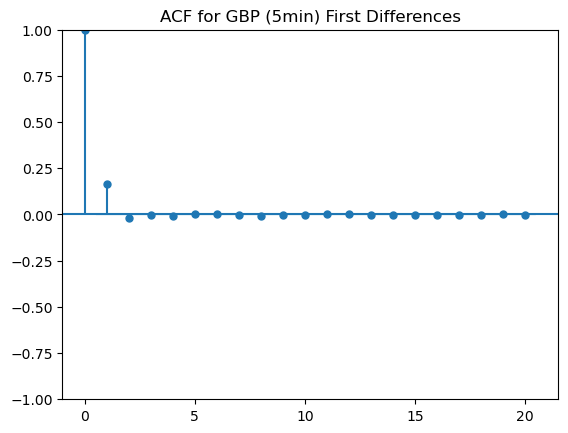

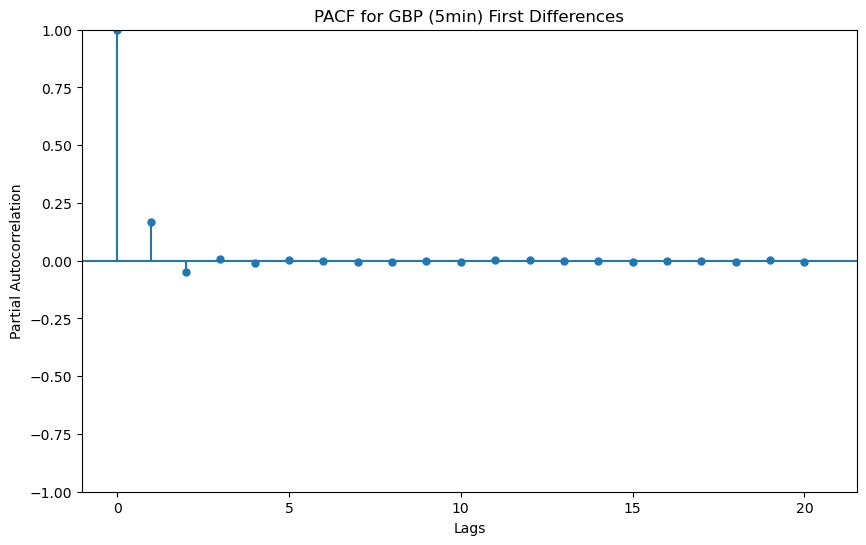

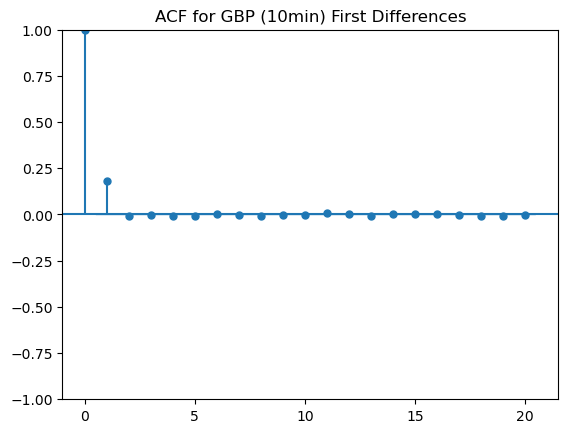

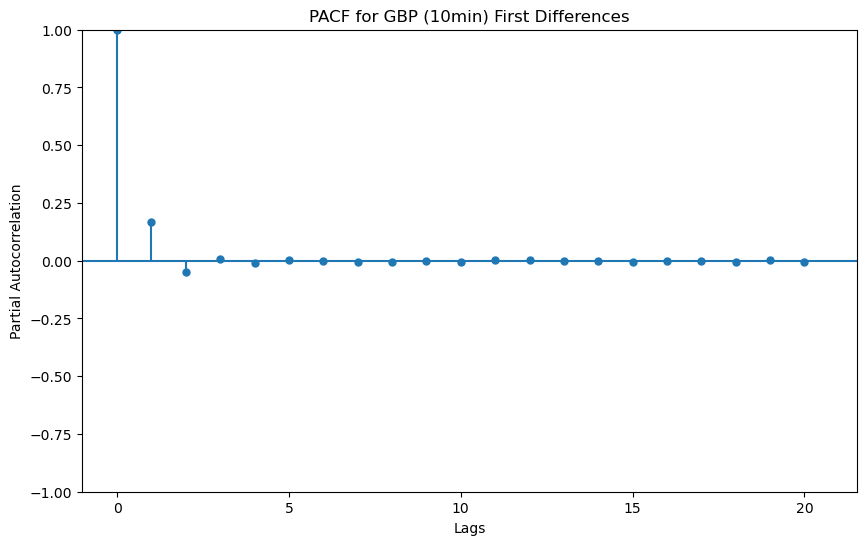

In [434]:
# Using plot_acf
plot_acf(data5['First Difference'], lags=20, alpha=0.05)
plt.title('ACF for GBP (5min) First Differences')
plt.show()

# Perform PACF analysis
perform_pacf_analysis(data5['First Difference'],title='PACF for GBP (5min) First Differences')

# Using plot_acf
plot_acf(data10['First Difference'], lags=20, alpha=0.05)
plt.title('ACF for GBP (10min) First Differences')
plt.show()

# Perform PACF analysis
perform_pacf_analysis(data5['First Difference'],title='PACF for GBP (10min) First Differences')

Here, we find that both the ACF and PACF for both time intervals decay rapidly, with significant contributions only for q=1; all later contributions tend to 0. So in training my AR(q) models, I will use q=1 for both time intervals. Then, to calculate the accuracy of the predictions, I calculate the effect of these first difference terms on the original time series.

In [435]:
# 5 minute:

# Determine the lag from PACF plot
lags = 1 #based on the PACF plot
ar_model = fit_ar_model(data5['First Difference'], lags=lags)
data5['First Difference predictions'] = ar_model.predict(start=lags, end=len(data5)-1, dynamic=False)
data5.fillna(0,inplace=True)
data5['AR predictions'] = data5['First Difference predictions']+data5['Close'].shift(1)

# 10 minute:

lags = 1
ar_model = fit_ar_model(data10['First Difference'], lags=lags)
data10['First Difference predictions'] = ar_model.predict(start=lags, end=len(data5)-1, dynamic=False)
data10.fillna(0,inplace=True)
data10['AR predictions'] = data10['First Difference predictions']+data10['Close'].shift(1)

GBP 5mins interval AR Model MAE: 1.600443E-04
GBP 5mins interval AR Model MSE: 8.510777E-08


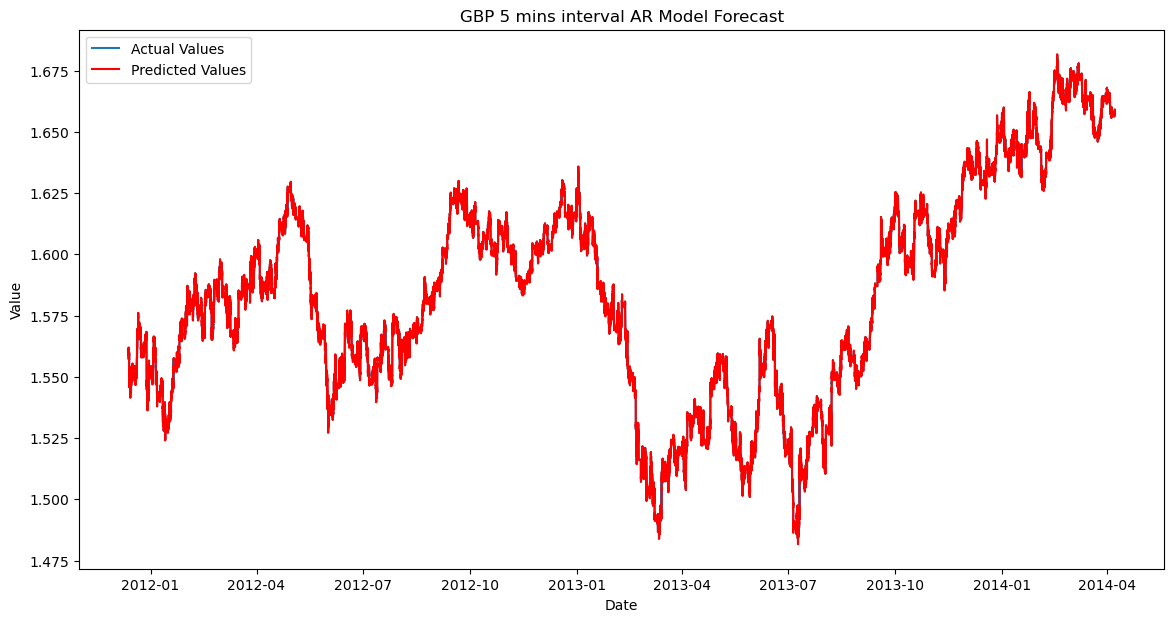

GBP 10mins interval AR Model MAE: 2.198837E-04
GBP 10mins interval AR Model MSE: 1.605110E-07


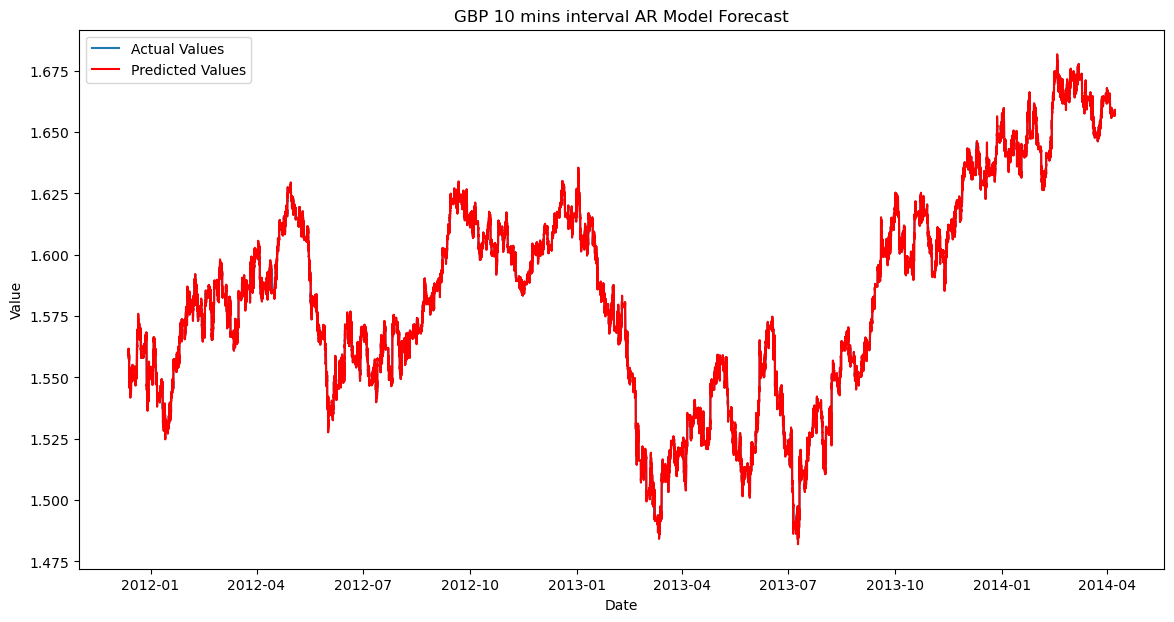

In [436]:
def plot_forecast(data, predictions, title='AR Model Forecast'):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data, label='Actual Values')
    plt.plot(data.index, predictions, color='red', label='Predicted Values')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Calculate errors for AR model for GBP dataset
mae_5, mse_5 = calculate_errors(data5['AR predictions'], data5['Close'])
print(f"GBP 5mins interval AR Model MAE: {mae_5:E}")
print(f"GBP 5mins interval AR Model MSE: {mse_5:E}")

# Plot the actual vs predicted values
plot_forecast(data5['Close'], data5['AR predictions'], title='GBP 5 mins interval AR Model Forecast')

# Calculate errors for AR model for GBP dataset
mae_10, mse_10 = calculate_errors(data10['AR predictions'], data10['Close'])
print(f"GBP 10mins interval AR Model MAE: {mae_10:E}")
print(f"GBP 10mins interval AR Model MSE: {mse_10:E}")

# Plot the actual vs predicted values
plot_forecast(data10['Close'], data10['AR predictions'], title='GBP 10 mins interval AR Model Forecast')

Finally, we can compare the accuracy of the predictions of the datasets with 5- and 10-minute intervals. It is gratifying to see, with MAEs of $1.60 \cdot 10^{-4}$ and $2.20 \cdot 10^{-4}$, that my models perform almost as well as the naive forecast from Topic 4 using the 1-minute interval data, which gets an MAE of $1.38 \cdot 10^{-4}$: this shows that only considering data at longer intervals can still capture most of the information available in the dataset about the behaviour of GBP prices. (The MSEs tell a similar story.)

Unsurprisingly, by either metric, the more frequent data provides better predictions. This is because the 5-minute data contains twice as many data points to train the model on, and because the shorter intervals allow less time for the price to move around unexpectedly. That is, even if we considered the same number of data points in each model, the higher frequency should still give more accurate predictions.

To build this intuition, we can consider a random walk on the integers, starting at the origin (without loss of generality), with 50% chance at each step of going up by 1 and 50% chance of going down by 1. If we measure the position of a random walk after 2 steps, it has probability 1/4 of being at -2, 1/2 of being at 0, and 1/4 of being at 2. On the other hand, if we measure it after 4 steps, it has probability 1/16 of being at each of $\pm 4$, 1/4 of being at each of $\pm 2$, and 3/8 of being at 0. Without doing the calculations, we can immediately see that both have expectation 0 (by symmetry), but the second distribution has greater variance. This makes the once-every-4-steps random walk inherently harder to predict accurately, and the same phenomenon applies to predicting a stationary time series.

I can use the functions written in Topic 5 to quickly plot some Monte Carlo simulations and their kernel density functions. To compare the 5- and 10-minute case, I simulate twice as many steps for the 5-minute data as the 10-minute data, so that we are comparing forecasts the same amount of time into the future (in this case, 12 hours).

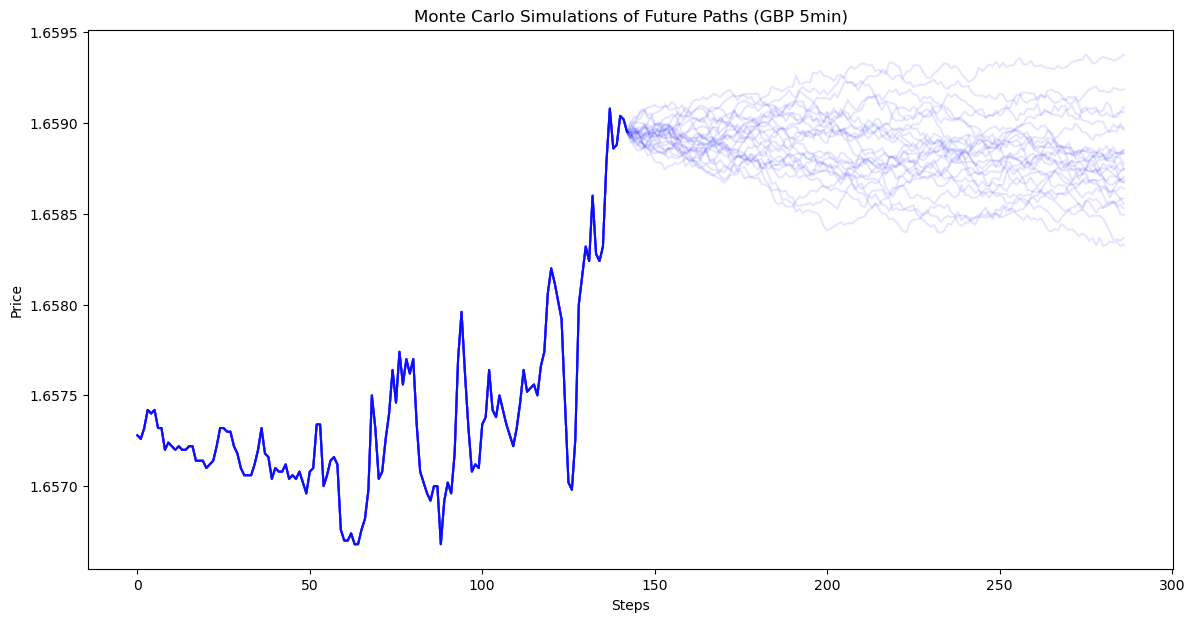

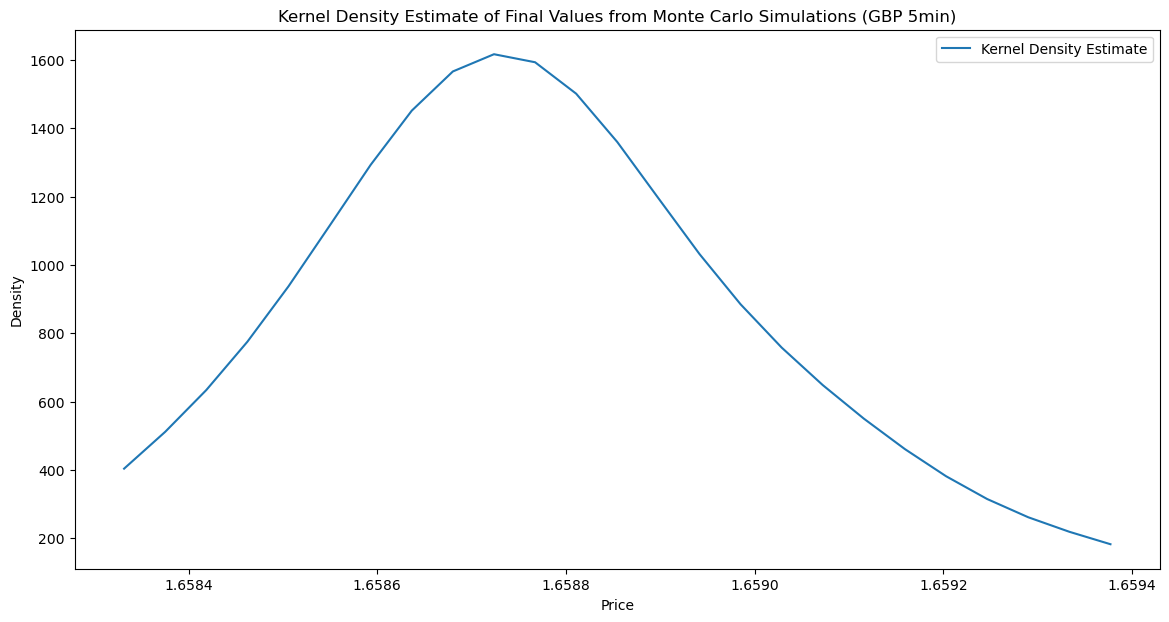

Interquartile range for the future values: [1.65863871 1.65885273]


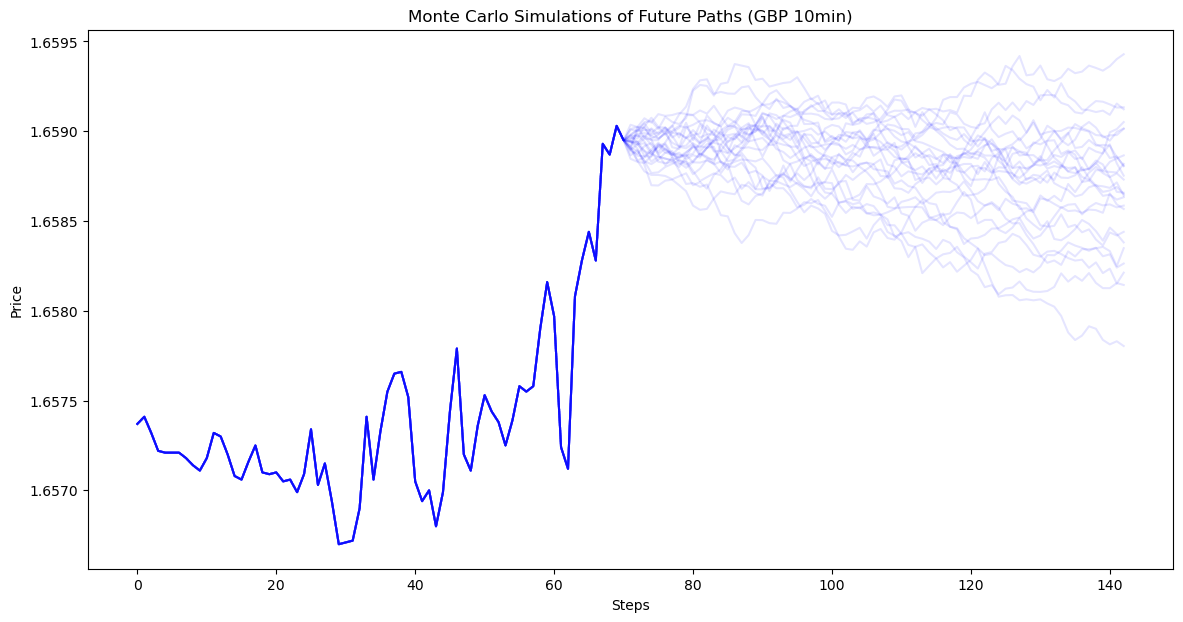

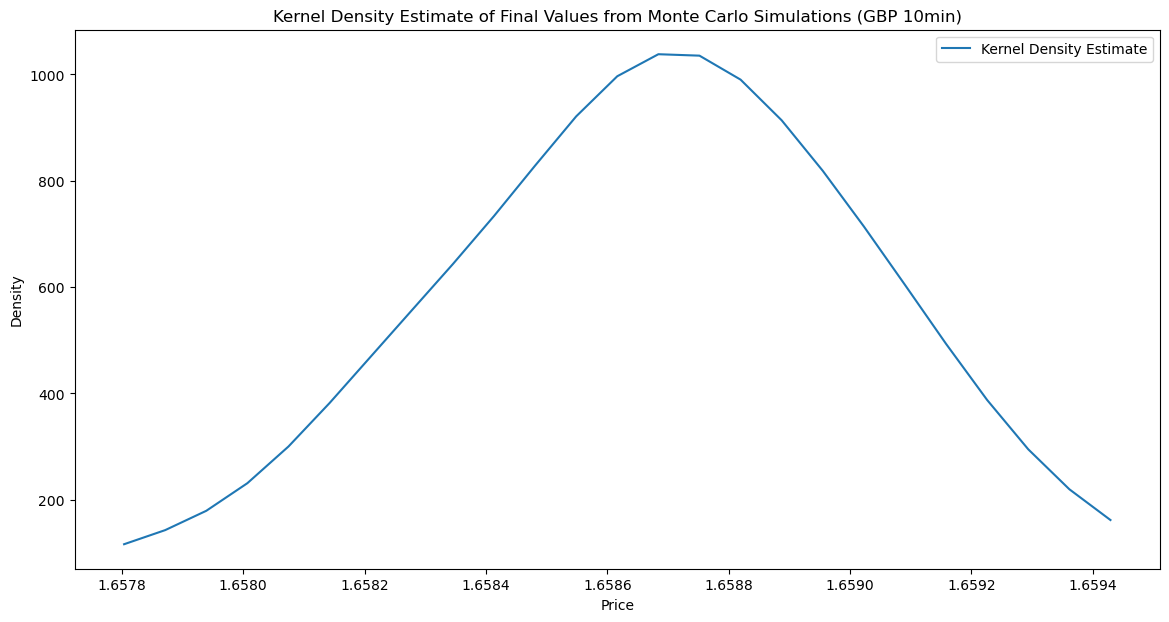

Interquartile range for the future values: [1.65843986 1.65886561]


In [486]:
# 5 minute:

# Perform and plot Monte Carlo simulation
lags=1
num_simulations = 25
num_minutes = 720 # Number of minutes in a 12 hours
future_paths = monte_carlo_simulation(data5['Close'], lags, num_simulations, int(num_minutes/5))
monte_carlo_plot(future_paths,'Monte Carlo Simulations of Future Paths (GBP 5min)','Steps','Price')

# Plot the kernel density function
kde = gaussian_kde(future_paths[:, -1])
kernel_plot(future_paths,'Kernel Density Estimate of Final Values from Monte Carlo Simulations (GBP 5min)','Price',num_simulations)

# Interquartile range for the future values
confidence_interval = np.percentile(future_paths[:, -1], [25, 75])
print(f"Interquartile range for the future values: {confidence_interval}")

# 10 minute:
# Perform and plot Monte Carlo simulation
future_paths = monte_carlo_simulation(data10['Close'], lags, num_simulations, int(num_minutes/10))
monte_carlo_plot(future_paths,'Monte Carlo Simulations of Future Paths (GBP 10min)','Steps','Price')

# Plot the kernel density function
kde = gaussian_kde(future_paths[:, -1])
kernel_plot(future_paths,'Kernel Density Estimate of Final Values from Monte Carlo Simulations (GBP 10min)','Price',num_simulations)

# Interquartile range for the future values
confidence_interval = np.percentile(future_paths[:, -1], [25, 75])
print(f"Interquartile range for the future values: {confidence_interval}")

As expected, given the previous analysis, the Monte Carlo simulation for the 5-minute data produced future paths that were considerably less spread out than the 10-minute data, after simulating 12 hours into the future - even though the former simulation used twice as many steps.

This is confirmed by the interquartile ranges of the two simulations, given by 1.65864-1.65885 for the 5-minute data, and 1.65844-1.65887 for the 10-minute data. In this way, the more frequent sampling allows our estimates of future values to be considerably more precise: in fact, the interquartile range is less than half as wide in the former estimate! This underlines the importance of having good data, and lots of it, in making predictions, with obvious consequences financial markets and any other type of important prediction.

### Gold at 5- and 10-minute intervals: ACF, PACF and AR(q)

We will repeat our analysis and forecasting of GBP prices with gold, to check that we see similar results: that is, a similar quality of prediction to those from 1-minute data using more naive methods, and the 5-minute forecast moderately outperforming the 10-minute one.

In [487]:
data5 = pd.DataFrame()
data5['Close'] = process_data(gold5,'5T')
data10 = pd.DataFrame()
data10['Close'] = process_data(gold10,'10T')

In [439]:
print("Gold (5min) Stationarity:",adfuller(data5['Close'])[1] < 0.05) # Check for stationarity at the 5% level
print("Gold (10min) Stationarity:",adfuller(data10['Close'])[1] < 0.05)

Gold (5min) Stationarity: False
Gold (10min) Stationarity: False


In [489]:
data5['First Difference'] = data5['Close'].diff().fillna(0)
data10['First Difference'] = data10['Close'].diff().fillna(0)

print("Gold (5min) Differences Stationarity:",adfuller(data5['First Difference'])[1] < 0.05)
print("Gold (10min) Differences Stationarity:",adfuller(data10['First Difference'])[1] < 0.05)

Gold (5min) Differences Stationarity: True
Gold (10min) Differences Stationarity: True


Once again, we find that the raw data is not stationary, but its differences are, so we may continue our analysis just as before.

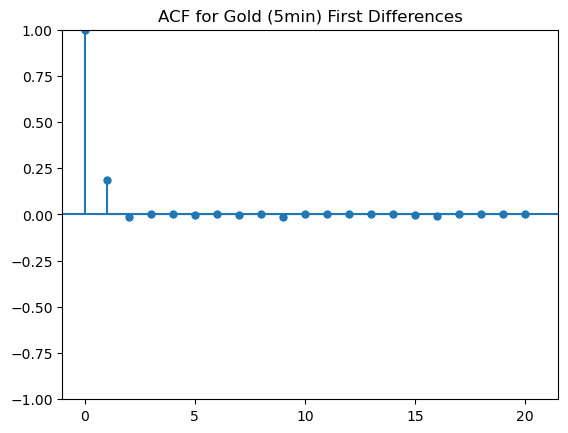

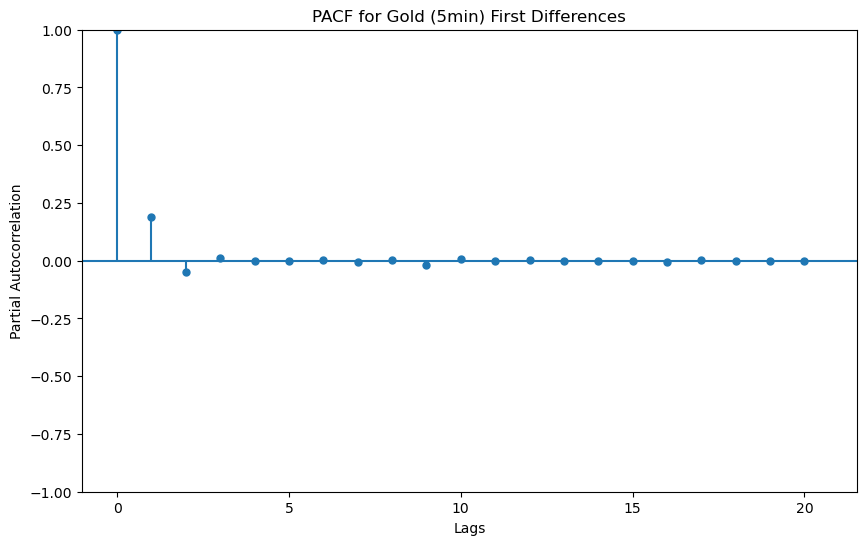

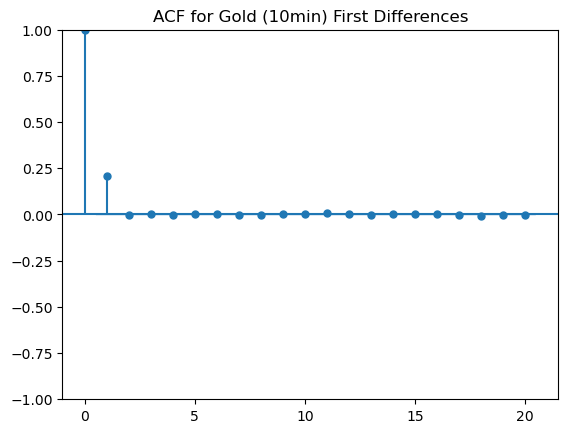

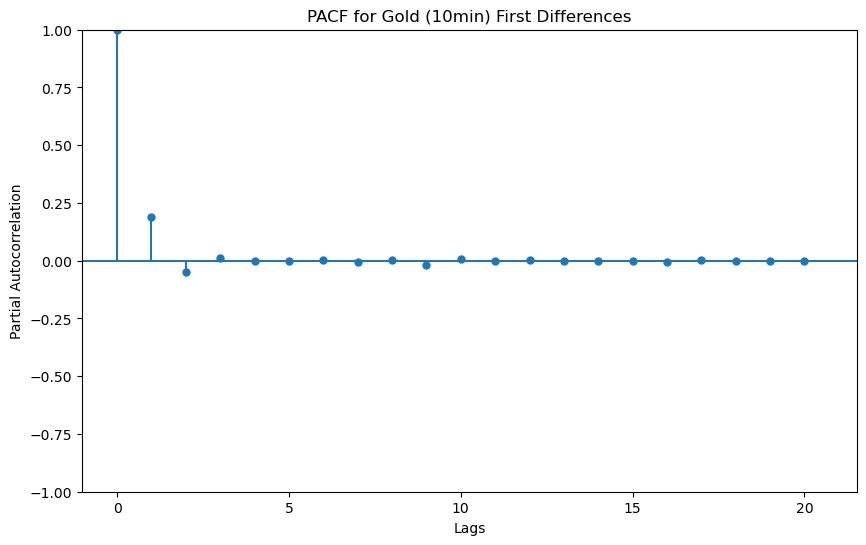

In [490]:
# Using plot_acf
plot_acf(data5['First Difference'], lags=20, alpha=0.05)
plt.title('ACF for Gold (5min) First Differences')
plt.show()

# Perform PACF analysis
perform_pacf_analysis(data5['First Difference'],title='PACF for Gold (5min) First Differences')

# Using plot_acf
plot_acf(data10['First Difference'], lags=20, alpha=0.05)
plt.title('ACF for Gold (10min) First Differences')
plt.show()

# Perform PACF analysis
perform_pacf_analysis(data5['First Difference'],title='PACF for Gold (10min) First Differences')

The ACF and PACF analysis for Gold gives extremely similar results to those for GBP. We find for both ACF and PACF, at both 5- and 10-minute intervals, that the only significant contribution comes from q=1, while all other contributions decay rapidly to 0. So I will train an AR(1) model.

In [493]:
# 5 minute:

# Determine the lag from PACF plot
lags = 1 #based on the PACF plot
ar_model = fit_ar_model(data5['First Difference'], lags=lags)
data5['First Difference predictions'] = ar_model.predict(start=lags, end=len(data5)-1, dynamic=False)
data5.fillna(0,inplace=True)
data5['AR predictions'] = data5['First Difference predictions']+data5['Close'].shift(1)

# 10 minute:

lags = 1
ar_model = fit_ar_model(data10['First Difference'], lags=lags)
data10['First Difference predictions'] = ar_model.predict(start=lags, end=len(data5)-1, dynamic=False)
data10.fillna(0,inplace=True)
data10['AR predictions'] = data10['First Difference predictions']+data10['Close'].shift(1)

Gold 5mins interval AR Model MAE: 0.345363
Gold 5mins interval AR Model MSE: 0.461865


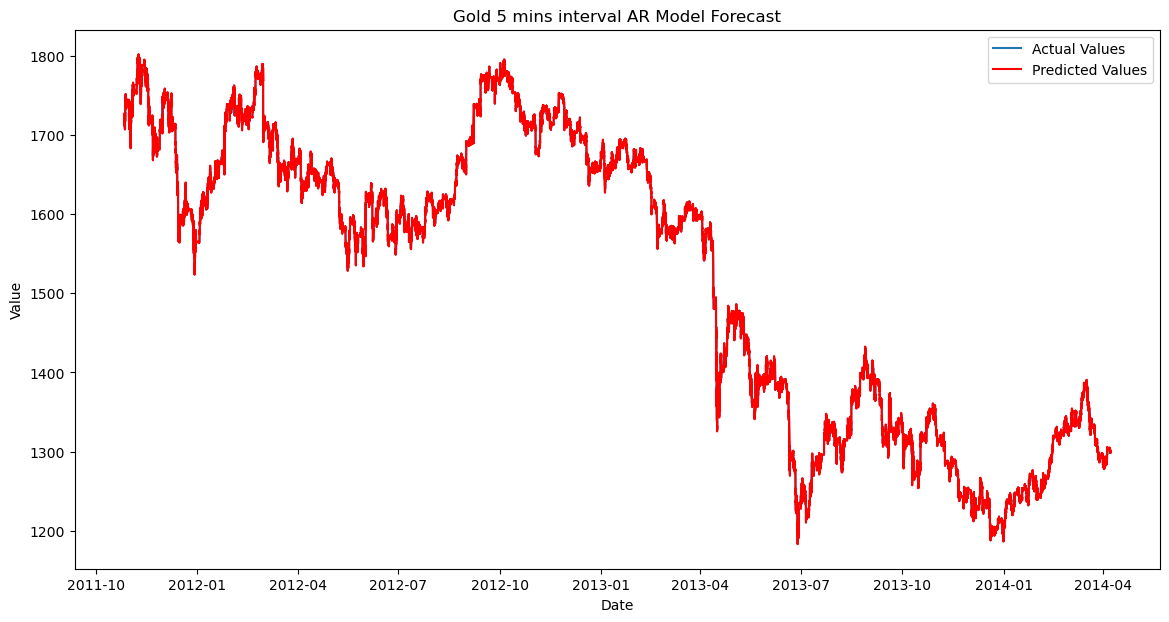

Gold 10mins interval AR Model MAE: 0.478489
Gold 10mins interval AR Model MSE: 0.859212


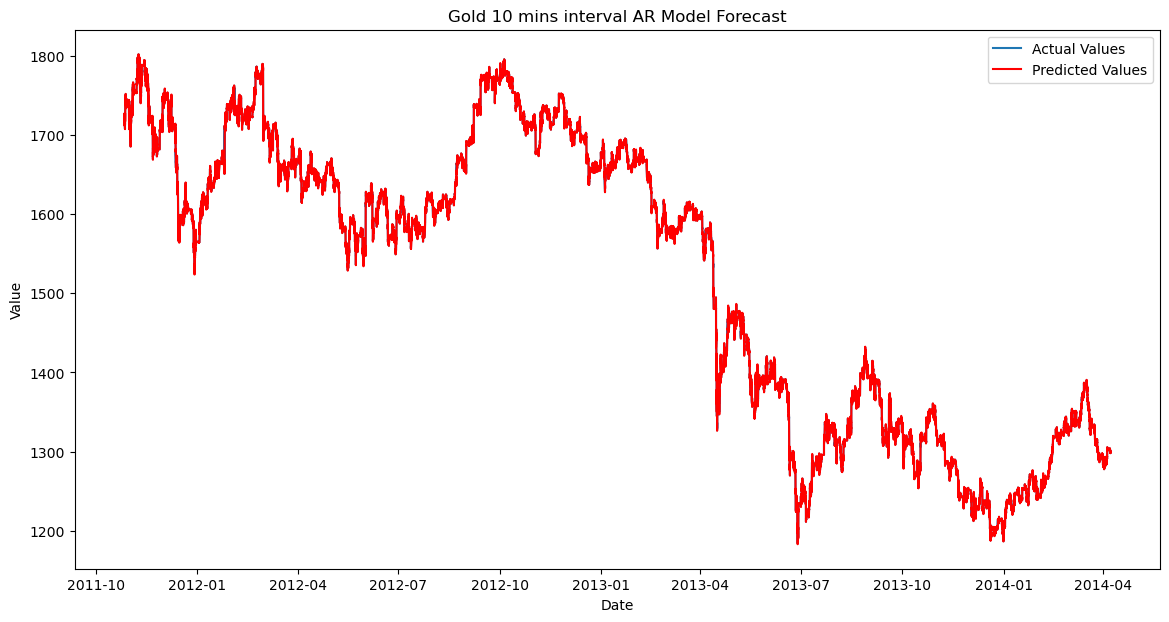

In [494]:
# Calculate errors for AR model for GBP dataset
mae_5, mse_5 = calculate_errors(data5['AR predictions'], data5['Close'])
print(f"Gold 5mins interval AR Model MAE: {mae_5:f}")
print(f"Gold 5mins interval AR Model MSE: {mse_5:f}")

# Plot the actual vs predicted values
plot_forecast(data5['Close'], data5['AR predictions'], title='Gold 5 mins interval AR Model Forecast')

# Calculate errors for AR model for GBP dataset
mae_10, mse_10 = calculate_errors(data10['AR predictions'], data10['Close'])
print(f"Gold 10mins interval AR Model MAE: {mae_10:f}")
print(f"Gold 10mins interval AR Model MSE: {mse_10:f}")

# Plot the actual vs predicted values
plot_forecast(data10['Close'], data10['AR predictions'], title='Gold 10 mins interval AR Model Forecast')

Using a naive forecast for 1-minute data, the MAE and MSE were 0.312 and 0.237, respectively. So just as for GBP, we find that the 5-minute AR(1) predictions, with MAE and MSE of 0.345 and 0.462, are only slightly worse, with the 10-minute predictions slightly worse again, at 0.478 and 0.859, respectively. This reinforces the narrative that higher-frequency data gives better predictions.

Though I have not, in Part 2, directly compared AR(q) predictions to naive predictions at the same frequency, the superiority of the AR(q) model is checked in such a like-for-like comparison for the Apple and Tesla data in Topic 5. So the fact that that a 1-minute naive forecast outperforms an AR(q) 5-minute forecast should be interpreted as saying that, although we can make better predictions by working hard and having clever ideas, in many cases having good (and lots of) data is even more important to accuracy.

Finally, we can check that Monte Carlo simulations of Gold prices behave as expected. We expect, as for the GBP prices, that simulations of the 5-minute data will produce narrower ranges of future estimates, due to the greater amount of accuracy available to the model from its richer data.

Once again, we simulate prices 12 hours into the future.

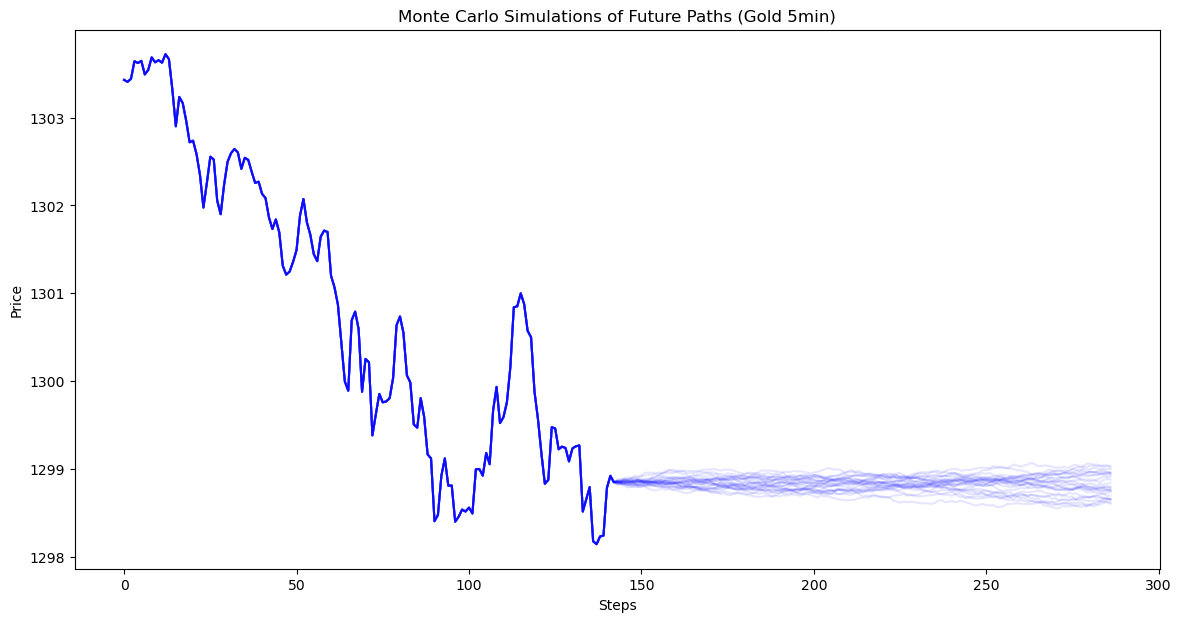

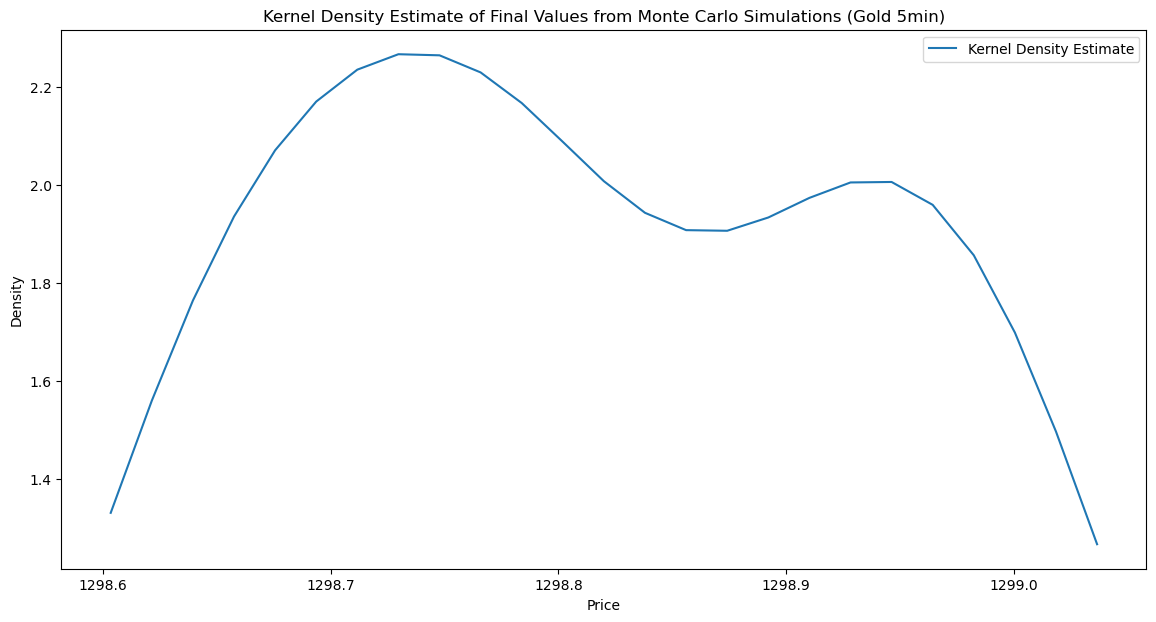

Interquartile range for the future values: [1298.70020276 1298.94473938]


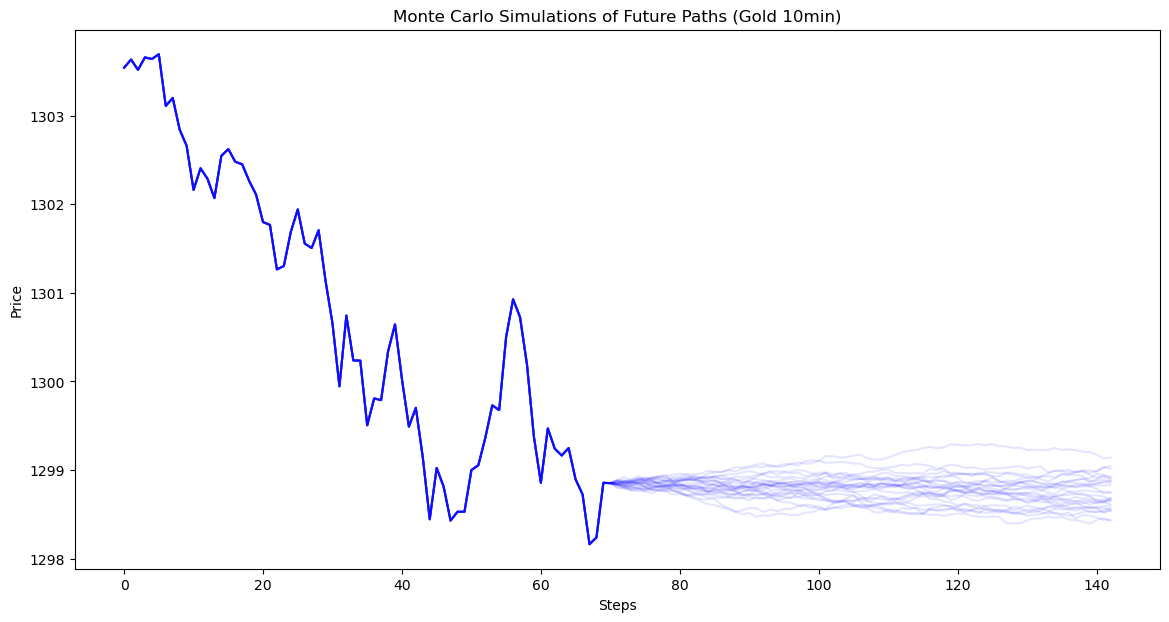

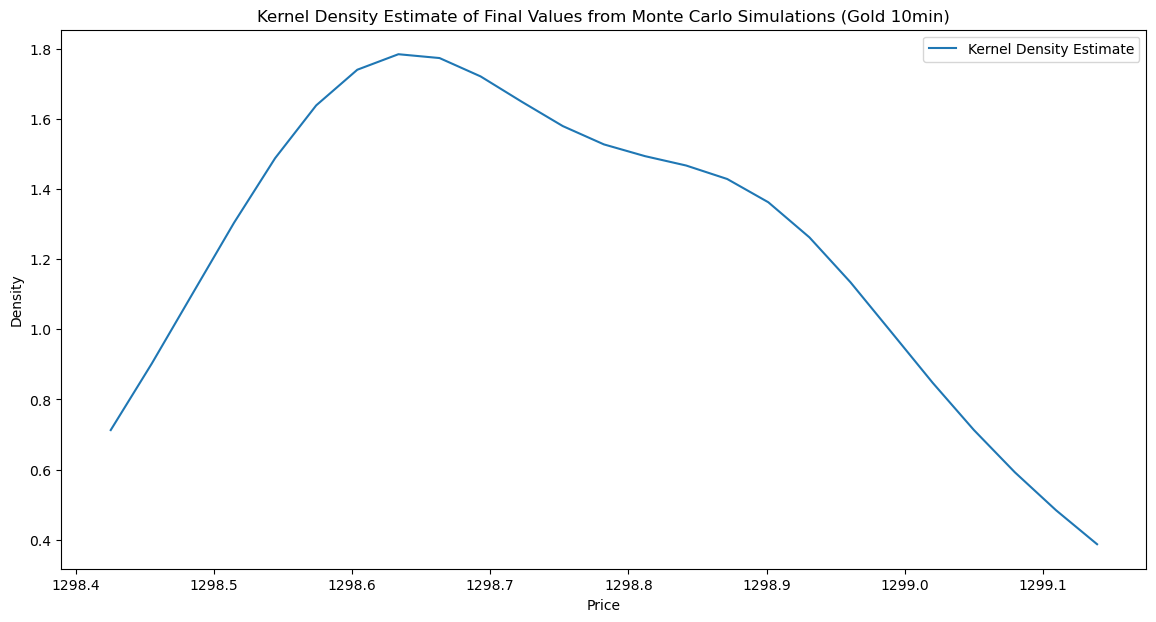

Interquartile range for the future values: [1298.59825402 1298.87599656]


In [495]:
# 5 minute:

# Perform and plot Monte Carlo simulation
lags=1
num_simulations = 25
num_minutes = 720 # Number of minutes in a 12 hours
future_paths = monte_carlo_simulation(data5['Close'], lags, num_simulations, int(num_minutes/5))
monte_carlo_plot(future_paths,'Monte Carlo Simulations of Future Paths (Gold 5min)','Steps','Price')

# Plot the kernel density function
kde = gaussian_kde(future_paths[:, -1])
kernel_plot(future_paths,'Kernel Density Estimate of Final Values from Monte Carlo Simulations (Gold 5min)','Price',num_simulations)

# Interquartile range for the future values
confidence_interval = np.percentile(future_paths[:, -1], [25, 75])
print(f"Interquartile range for the future values: {confidence_interval}")

# 10 minute:
# Perform and plot Monte Carlo simulation
future_paths = monte_carlo_simulation(data10['Close'], lags, num_simulations, int(num_minutes/10))
monte_carlo_plot(future_paths,'Monte Carlo Simulations of Future Paths (Gold 10min)','Steps','Price')

# Plot the kernel density function
kde = gaussian_kde(future_paths[:, -1])
kernel_plot(future_paths,'Kernel Density Estimate of Final Values from Monte Carlo Simulations (Gold 10min)','Price',num_simulations)

# Interquartile range for the future values
confidence_interval = np.percentile(future_paths[:, -1], [25, 75])
print(f"Interquartile range for the future values: {confidence_interval}")

As expected, the interquartile range for the 5-minute data is 1298.700-1298.945, while the interquartile range for the 10-minute data is 1298.598-1298.876. So the 10-minute simulations are considerably more spread out after 12 hours, as we also saw for the GBP data. This is confirmed by a visual inspection of the graphs.

Overall, we have found in this part that clever analytical techniques are able to make very accurate predictions about future movements of seemingly chaotic data series. However, even the best techniques we tried with the 5-minute data were unable to match a naive forecast based on 1-minute data, so given the choice, it may well be better to focus on collecting more data, more often, than on finding ever better ways to analyse it. In practice, when we seek to make accurate predictions, we should be optimising both data collection and data analysis to get the best results.

# Part 3

## Combining ARIMA and LSTM in Time Series Forecasting

In the financial markets, predicting stock prices is attractive to all investors. There are so many way to predict, we can count on traditional statistical models such as ARIMA, STL decomposition, and GARCH have been widely used for time series forecasting. However, deep learning has opened new frontiers for more sophisticated and potentially more accurate models. So in Part 3, I want to explore the application of Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN), with traditional statistical methods like ARIMA (AutoRegressive Integrated Moving Average). For this application, I will use my Apple stock price dataset.

LSTM networks are designed to process sequential data and are suitable for time series prediction tasks because they can be effective at capturing long-term dependencies. Unlike traditional RNNs, LSTMs can mitigate the problem of vanishing gradients through their unique architecture, which includes memory cells and gating mechanisms. This allows LSTM to retain information over long periods of time, which is important for predicting stock prices where historical trends and patterns play an important role.

ARIMA is a common statistical method for time series forecasting. It models the time series based on its own past values and past errors, making it effective for capturing linear patterns in the data. The ARIMA model is characterized by three parameters: $p$ (the number of lag observations in the model, or the lag order), $d$ (the number of times that the raw observations are differenced, or the degree of differencing), $q$ (the size of the moving average window). It works well when the time series data is linear and can remove unnecessary components such as trends and seasonality.

The combination of the two ideas, LSTM and ARIMA, could be a good idea, as ARIMA can handle linear components of time series well. It is capable of modelling simple, linear relationships in data, whereas LSTM can learn and model complex and nonlinear relationships in data, including long-term dependence patterns and non-linearities. On the other hand, they can help each other to handle trends and seasons. ARIMA can process and remove trends and seasonal components in time series. This can help clean the data, minimize noise, and highlight nonlinear patterns that the LSTM can learn from. Then LSTM can leverage data processed by ARIMA to learn the remaining complex patterns and improve forecast accuracy. I think combining ARIMA and LSTM could give us an advantage by utilising the strengths of both models. This hybrid approach involves using ARIMA to model the linear components of the time series and LSTM to capture the non-linear relationships. 


### Dataset and Preprocessing

We already have a dataset from previous part: the Apple stock price dataset. First, I will fit an ARIMA model to this data and obtain the residuals (the differences between the ARIMA predictions and the actual values), then I will perform LSTM on these residuals to capture any remaining non-linear patterns. I will make a simple LSTM model, though this can be improved with techniques like hyperparameter tuning and cross-validation. The final forecast is obtained by adding the ARIMA forecast and the LSTM forecast of the residuals.

One remaining issue in my analysis is that, to give optimal results when training the ARIMA model, the dataset should be stationary. In the interest of simplicity, I have not here used the approach of formally checking for stationarity and taking differences to replace my time series with a stationary one. However, my dataset does visually appear to be close to stationary, and I am happy with the results of my hybrid model.

In [503]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Ensure the index is in DatetimeIndex format with frequency information
aapl_prices.index = pd.to_datetime(aapl_prices.index)
aapl_prices = aapl_prices.asfreq('B') #sets the frequency of the DataFrame to business days. 
aapl_prices = aapl_prices.ffill()

# Use the 'Close' column
aapl_prices_close = aapl_prices['Close']

# ARIMA model
arima_model = ARIMA(aapl_prices_close, order=(5, 1, 0))
arima_fitted = arima_model.fit()

# Get the ARIMA residuals
residuals = arima_fitted.resid
residuals = residuals.dropna()



In [507]:
# Prepare data for LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Create a dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_residuals, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# LSTM model
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=20, batch_size=1, verbose=2)



Epoch 1/20
771/771 - 2s - 2ms/step - loss: 4.1075e-04
Epoch 2/20
771/771 - 1s - 1ms/step - loss: 3.7064e-04
Epoch 3/20
771/771 - 1s - 1ms/step - loss: 3.7625e-04
Epoch 4/20
771/771 - 1s - 1ms/step - loss: 3.5876e-04
Epoch 5/20
771/771 - 1s - 1ms/step - loss: 3.6407e-04
Epoch 6/20
771/771 - 1s - 1ms/step - loss: 3.6238e-04
Epoch 7/20
771/771 - 1s - 1ms/step - loss: 3.4882e-04
Epoch 8/20
771/771 - 1s - 1ms/step - loss: 3.4711e-04
Epoch 9/20
771/771 - 1s - 2ms/step - loss: 3.4855e-04
Epoch 10/20
771/771 - 1s - 1ms/step - loss: 3.4652e-04
Epoch 11/20
771/771 - 1s - 1ms/step - loss: 3.4725e-04
Epoch 12/20
771/771 - 1s - 1ms/step - loss: 3.5170e-04
Epoch 13/20
771/771 - 1s - 1ms/step - loss: 3.4879e-04
Epoch 14/20
771/771 - 1s - 1ms/step - loss: 3.4804e-04
Epoch 15/20
771/771 - 1s - 1ms/step - loss: 3.4815e-04
Epoch 16/20
771/771 - 1s - 1ms/step - loss: 3.3985e-04
Epoch 17/20
771/771 - 1s - 1ms/step - loss: 3.4434e-04
Epoch 18/20
771/771 - 1s - 1ms/step - loss: 3.4665e-04
Epoch 19/20
771/771

In [508]:
# Predict the residuals
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)

# Combine ARIMA predictions with LSTM predictions
arima_pred = arima_fitted.fittedvalues
combined_pred = arima_pred[time_step+1:] + train_predict.flatten()

# Align indices for plotting and calculating MSE
combined_pred_index = aapl_prices_close.index[time_step+1:time_step+1+len(combined_pred)]

# Remove NaNs in the prediction and actual values
combined_pred = combined_pred[~np.isnan(combined_pred)]
actual_values = aapl_prices_close[combined_pred_index][~np.isnan(combined_pred)]



25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


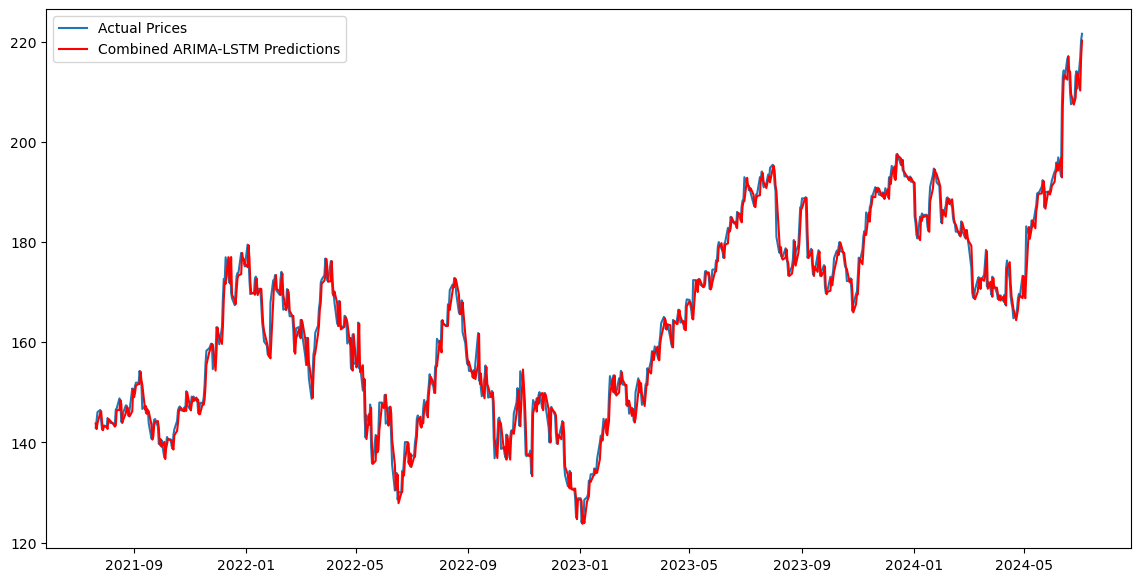

Mean Absolute Error: 2.000657938625255
Mean Squared Error: 7.3426349810797475


In [521]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual_values.index, actual_values, label='Actual Prices')
plt.plot(combined_pred_index, combined_pred, label='Combined ARIMA-LSTM Predictions', color='red')
plt.legend()
plt.show()

# Calculate Mean Absolute Error and Mean Squared Error
mae = mean_absolute_error(actual_values, combined_pred)
mse = mean_squared_error(actual_values, combined_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


We can compare the predictions of this model to some of the other models created during this project, by comparing the MAE and MSE for each of them. In particular, we consider the naive forecast from Topic 4, the AR(q) forecast from Topic 5, and the new hybrid model. Other models considered, including the seasonal naive forecast and the average forecast, were clearly worse, at least for this type of data, so we exclude them from consideration here.

We may think of the naive forecast as a baseline accuracy that a useful, more advanced forecasting technique should be able to beat. The naive forecast for the Apple stock price data had MAE=2.05 and MSE=7.54, while the hybrid ARIMA and LSTM model, with MAE=2.00 and MSE=7.34, gives a slight improvement. On that basis, we may consider the hybrid model a success.

On the other hand, the AR(q) model, with MAE=1.98 and MSE=7.15, gives another incremental improvement over both, and has the best accuracy of any model considered in this project. This may seem hard to reconcile with the idea that ARIMA is a more advanced version of the AR(q) model, and that our new hybrid model is more advanced again, but in fact it is reconcilable. Of course, we cannot discount the possibility that the hybrid model is simply not well fitted to the data, that the hyperparameters need tuning, but it is important to remember that these statistical models are designed to capture complexity in some underlying distribution which has produced the data. If the underlying distribution is simple, we should not be surprised to find that adding extra degrees of freedom to our model gradually decreases accuracy. The aim, therefore, should be to find a model which strikes just the right balance: having enough complexity to capture the dimensions underlying the process which produces the data, and having no more than that.

MAE and MSE are not the only ways of measuring the accuracy of a model's predictions. We also experiment with other ways of measuring errors below.

R-squared: 0.9802087232660928


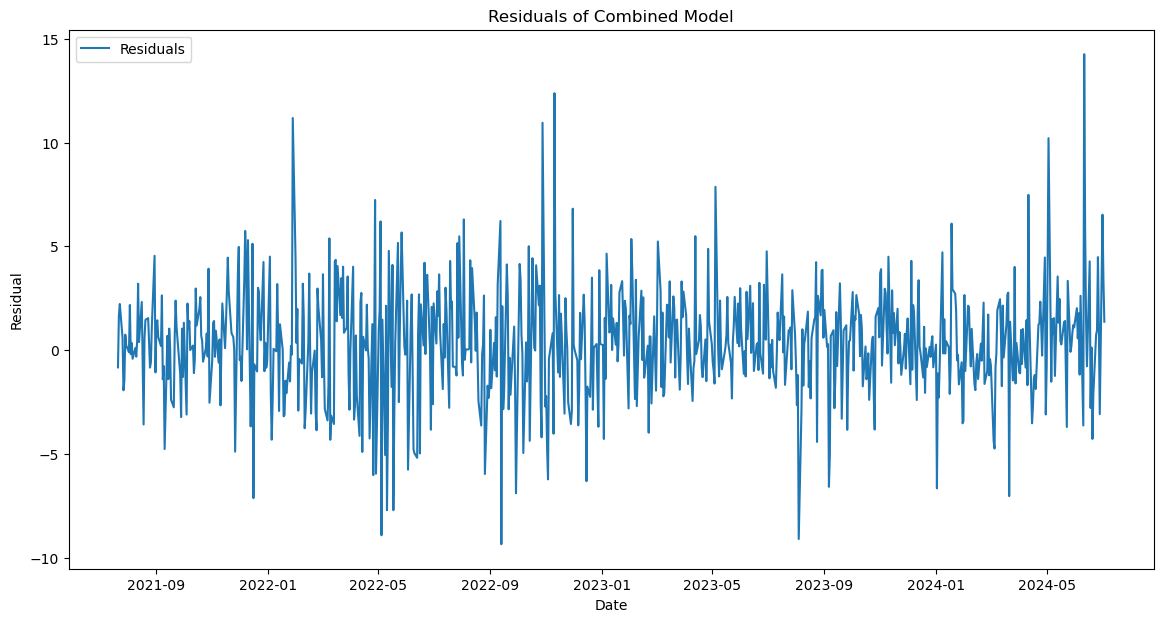

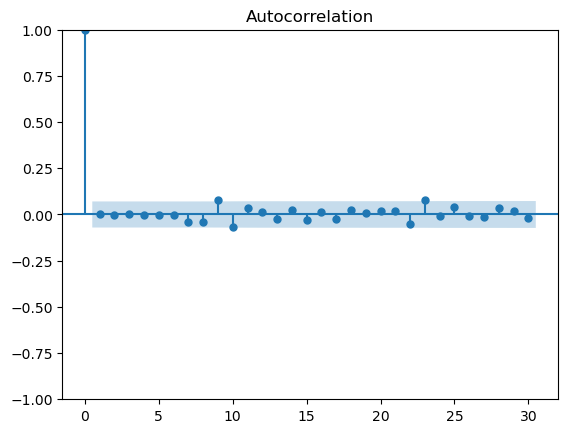

In [527]:
# Additional evaluation metrics
r2 = r2_score(actual_values, combined_pred)
print(f'R-squared: {r2}')

# Residuals analysis
residuals_combined = actual_values - combined_pred

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(combined_pred_index[:len(residuals_combined)], residuals_combined, label='Residuals')
plt.title('Residuals of Combined Model')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

# Plot ACF of residuals
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals_combined, lags=30)
plt.show()


Overall, this project has shown the value of trying different models to predict the behaviour of a given time series. Often the simplest forecasting methods give very good results relative to more complex methods, but with some experimentation, we can do better in cases where accuracy is important enough to justify the extra effort. Since different models will outperform a naive forecast for different datasets, we have to find experimentally the right type of model, with the right hyperparameters, to achieve optimal performance.